In [49]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
from collections import defaultdict

In [50]:
path_raw = os.path.join("..","data","interim", "WikiCFP")
filename = os.path.join(path_raw,"WikiCFP.conferences.pkl")
pd.set_option('display.max_colwidth', -1)

In [51]:
##Load the WikiCFP crawled data
global conferences
conferences = pd.DataFrame()
with open(filename, "rb") as f:
    conferences = pickle.load(f)

In [52]:
conferences.columns

Index(['Conference', 'Name', 'Conference Series', 'Start Date', 'End Date',
       'Location', 'Abstract Deadline', 'Submission Deadline',
       'Notification Due', 'Final Version Deadline', 'Categories', 'Link',
       'Description'],
      dtype='object')

In [53]:
print("Total number of conferences crawled: {}.".format(len(conferences)))

Total number of conferences crawled: 65714.


## Conferences per year

In [6]:
def getConferencesPerYear(year):
    conferences_in_year = pd.DataFrame()
    if conferences['Start Date'].astype(str).str.contains(year).any():
        conferences_in_year = conferences[conferences['Start Date'].astype(str).str.contains(year)]            
    else:
        print("There are no conferences taking place in {}.\n".format(year))

    return conferences_in_year

In [7]:
cols = ['Year', 'No_conferences']
data = []
for year in range(2004,2022):
    no_conf = len(getConferencesPerYear(str(year)))
    data.append([year, no_conf])
yearly_conferences = pd.DataFrame(data, columns=cols)

There are no conferences taking place in 2006.



In [8]:
yearly_conferences

,Year,No_conferences
0,2004,1
1,2005,2
2,2006,0
3,2007,462
4,2008,2173
5,2009,2519
6,2010,3978
7,2011,5332
8,2012,5223
9,2013,5099


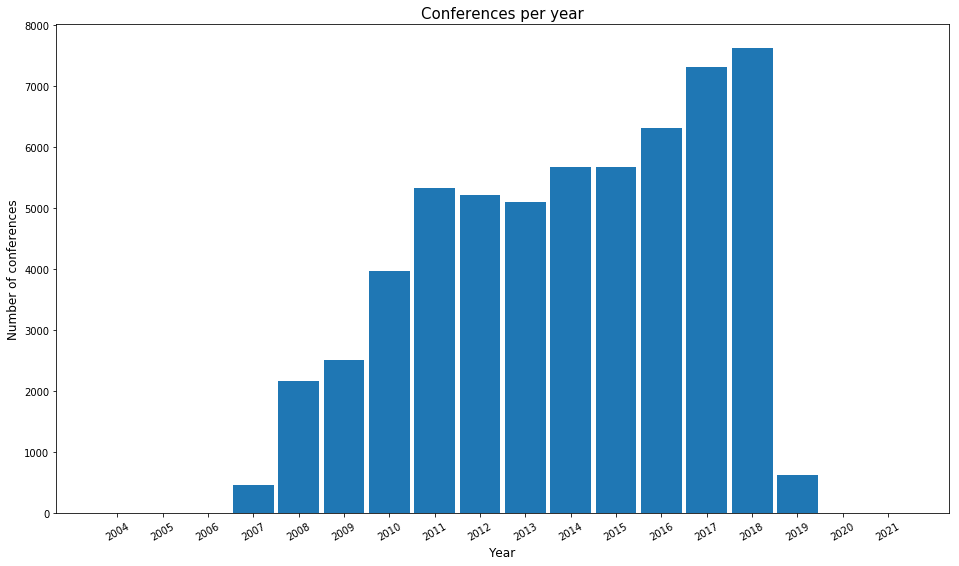

In [12]:
##Plot conferences per year
years = yearly_conferences['Year'].tolist()
index = np.arange(len(years))
no_conf = yearly_conferences['No_conferences'].tolist()
plt.bar(index, no_conf, width = 0.9, align = 'center')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Number of conferences', fontsize = 12)
plt.title('Conferences per year', fontsize = 15)
plt.xticks(index, years, fontsize = 10, rotation=30)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()

In [13]:
print("Mean # of conferences per year: {}".format(round(yearly_conferences.mean()[1],2)))
print("Median # of conferences per year: {}".format(round(yearly_conferences.median()[1], 2)))

Mean # of conferences per year: 3227.11
Median # of conferences per year: 3248.5


## Conferences with incomplete information

In [14]:
no_start_date = set(conferences.index[conferences['Start Date'].isnull()])
no_end_date = set(conferences.index[conferences['End Date'].isnull()])
no_location = set(conferences.index[conferences['Location'].isnull()])
no_submission_deadline = set(conferences.index[conferences['Submission Deadline'].isnull()])

print("Confereneces without start date: {}".format(len(no_start_date)))
print("Confereneces without end date: {}".format(len(no_end_date)))
print("Confereneces without location: {}".format(len(no_location)))
print("Confereneces without submission deadline: {}".format(len(no_submission_deadline)))

no_date_location = no_start_date.union(no_location)
print("Conferences without date or location: {}".format(len(no_date_location)))

no_date_loc_deadline = no_date_location.union(no_submission_deadline)
print("Conferences without date, location, or submission deadline: {}".format(len(no_date_loc_deadline)))

Confereneces without start date: 7602
Confereneces without end date: 7602
Confereneces without location: 7430
Confereneces without submission deadline: 6317
Conferences without date or location: 7870
Conferences without date, location, or submission deadline: 12761


In [15]:
a = no_start_date.intersection(no_location)
len(no_location.intersection(no_submission_deadline))

1076

C:\Users\Andreea\Anaconda3\lib\site-packages\matplotlib_venn\_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


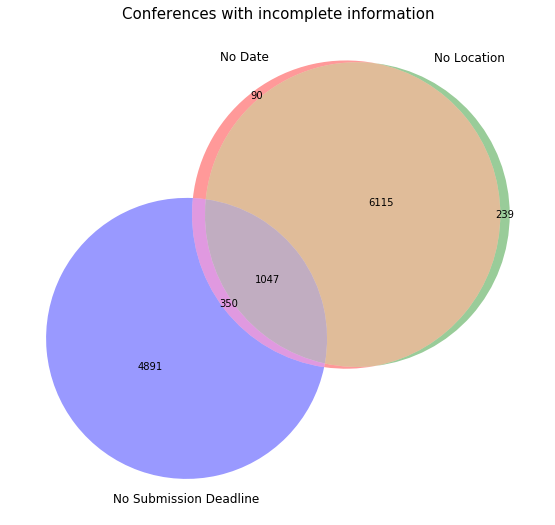

In [16]:
from matplotlib_venn import venn3
v = venn3([no_start_date, no_location, no_submission_deadline], 
      set_labels = ('No Date', 'No Location', 'No Submission Deadline'))
plt.title('Conferences with incomplete information', fontsize = 15)
plt.show()

## Conferences per category

In [10]:
categories = set(category for categories in conferences['Categories'].tolist() for category in categories)

In [11]:
print("Categories: {}".format(len(categories)))

Categories: 25894


In [12]:
conf_list = conferences.index.tolist()
count_categ = list()
for index in conferences.index.tolist():
    count_categ.append(len(conferences['Categories'][index]))
categ_per_conf = pd.DataFrame({"Conference": conf_list, "Number_categories": count_categ})

In [13]:
categ_per_conf.head()

,Conference,Number_categories
0,2,3
1,4,1
2,5,3
3,6,3
4,7,3


In [14]:
count_with_category = len(categ_per_conf[categ_per_conf["Number_categories"]>0])
count_without_category = len(categ_per_conf[categ_per_conf["Number_categories"]==0])

print("Conferences with at least a category: {}".format(count_with_category))
print("Conferences without a category: {}".format(count_without_category))

Conferences with at least a category: 52638
Conferences without a category: 13076


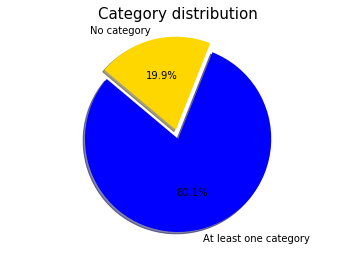

In [15]:
##Plot category distribution
labels = 'At least one category', 'No category'
sizes = [count_with_category, count_without_category]
colors = ['blue', 'gold']
explode = (0, 0.1)
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Category distribution", fontsize = 15)
plt.axis('equal')
plt.show()

In [16]:
##Category distribution per conference
print("Mean # of categories per conferences: {}".format(round(categ_per_conf.mean()[1], 2)))
print("Median # of categories per conferences: {}".format(round(categ_per_conf.median()[1], 2)))

Mean # of categories per conferences: 2.58
Median # of categories per conferences: 3.0


In [22]:
conf_per_categ = defaultdict(int)
for category in categories:
    print("Searching for category: {}".format(category))
    for index in conferences.index.tolist():
        if category in conferences['Categories'][index]:
            conf_per_categ[category] += 1
    print("Finished searching for category: {}\n".format(category))

Searching for category: e-business systems and web
Finished searching for category: e-business systems and web

Searching for category: pragmatics, translation
Finished searching for category: pragmatics, translation

Searching for category: PRIVATE
Finished searching for category: PRIVATE

Searching for category: USENIX ATC
Finished searching for category: USENIX ATC

Searching for category: similarity
Finished searching for category: similarity

Searching for category: granular matter
Finished searching for category: granular matter

Searching for category: combinatorial problems
Finished searching for category: combinatorial problems

Searching for category: conflict of laws
Finished searching for category: conflict of laws

Searching for category: embedded systems
Finished searching for category: embedded systems

Searching for category: inteface, social networking
Finished searching for category: inteface, social networking

Searching for category: spatial temporal data
Finished s

Finished searching for category: advising

Searching for category: femtocell
Finished searching for category: femtocell

Searching for category: electrical machinery
Finished searching for category: electrical machinery

Searching for category: hydraulic and pneumatic parts
Finished searching for category: hydraulic and pneumatic parts

Searching for category: science & innovations
Finished searching for category: science & innovations

Searching for category: ruleml+rr
Finished searching for category: ruleml+rr

Searching for category: data communication and network
Finished searching for category: data communication and network

Searching for category: european philosophy
Finished searching for category: european philosophy

Searching for category: cooperative problem solving
Finished searching for category: cooperative problem solving

Searching for category: degrowth
Finished searching for category: degrowth

Searching for category: algorithms and computation the
Finished searching

Finished searching for category: autonomous

Searching for category: contextuality
Finished searching for category: contextuality

Searching for category: ordinary differential equation
Finished searching for category: ordinary differential equation

Searching for category: embodied
Finished searching for category: embodied

Searching for category: professional
Finished searching for category: professional

Searching for category: society development
Finished searching for category: society development

Searching for category: numerical verification
Finished searching for category: numerical verification

Searching for category: nursing science
Finished searching for category: nursing science

Searching for category: compliance management webinar
Finished searching for category: compliance management webinar

Searching for category: medical bio-chemistry
Finished searching for category: medical bio-chemistry

Searching for category: automated software development
Finished searching for

Finished searching for category: clinical product development

Searching for category: digital engineering
Finished searching for category: digital engineering

Searching for category: à¤£à¥¢à¤«
Finished searching for category: à¤£à¥¢à¤«

Searching for category: panels
Finished searching for category: panels

Searching for category: medical records online
Finished searching for category: medical records online

Searching for category: infectious diseases
Finished searching for category: infectious diseases

Searching for category: nano, bio & green technologies
Finished searching for category: nano, bio & green technologies

Searching for category: education and information tech
Finished searching for category: education and information tech

Searching for category: asean economic community
Finished searching for category: asean economic community

Searching for category: dentist
Finished searching for category: dentist

Searching for category: processing of multimedia infor
Finished s

Finished searching for category: electronic technology

Searching for category: legal
Finished searching for category: legal

Searching for category: healthcare research and qualit
Finished searching for category: healthcare research and qualit

Searching for category: photonics and optoelectronics
Finished searching for category: photonics and optoelectronics

Searching for category: dynamics
Finished searching for category: dynamics

Searching for category: trauma in childhood
Finished searching for category: trauma in childhood

Searching for category: chemical engineering â¢ aerona
Finished searching for category: chemical engineering â¢ aerona

Searching for category: information_retrieval
Finished searching for category: information_retrieval

Searching for category: software defined radio
Finished searching for category: software defined radio

Searching for category: advanced materials and applica
Finished searching for category: advanced materials and applica

Searching for 

Finished searching for category: computer controlled systems

Searching for category: interaction management
Finished searching for category: interaction management

Searching for category: medical clinical healthcare
Finished searching for category: medical clinical healthcare

Searching for category: pharmaceutical research
Finished searching for category: pharmaceutical research

Searching for category: smart city networking
Finished searching for category: smart city networking

Searching for category: nervous system disorders
Finished searching for category: nervous system disorders

Searching for category: unintended consequences
Finished searching for category: unintended consequences

Searching for category: pattern language
Finished searching for category: pattern language

Searching for category: borders and boundaries
Finished searching for category: borders and boundaries

Searching for category: quality and accreditation
Finished searching for category: quality and accredi

Finished searching for category: security, trust, and privacy

Searching for category: free software
Finished searching for category: free software

Searching for category: multimedia studies
Finished searching for category: multimedia studies

Searching for category: -business technology and appli
Finished searching for category: -business technology and appli

Searching for category: cognitive
Finished searching for category: cognitive

Searching for category: bio-chemical technology
Finished searching for category: bio-chemical technology

Searching for category: distributed system & security
Finished searching for category: distributed system & security

Searching for category: pharmacy
Finished searching for category: pharmacy

Searching for category: cad tools and design
Finished searching for category: cad tools and design

Searching for category: multisensor fusion
Finished searching for category: multisensor fusion

Searching for category: is strategy & management
Finished sea

Finished searching for category: positive change

Searching for category: cyberphysical
Finished searching for category: cyberphysical

Searching for category: theoretical performance analys
Finished searching for category: theoretical performance analys

Searching for category: ultimedia and digital converge
Finished searching for category: ultimedia and digital converge

Searching for category: embedded systems education
Finished searching for category: embedded systems education

Searching for category: irc2015
Finished searching for category: irc2015

Searching for category: public health management
Finished searching for category: public health management

Searching for category: international trade
Finished searching for category: international trade

Searching for category: specia session
Finished searching for category: specia session

Searching for category: metropolitan
Finished searching for category: metropolitan

Searching for category: discrete math
Finished searching for

Finished searching for category: variability-intensive systems

Searching for category: incofibs-2015
Finished searching for category: incofibs-2015

Searching for category: decisions
Finished searching for category: decisions

Searching for category: graph models
Finished searching for category: graph models

Searching for category: physics conferences usa
Finished searching for category: physics conferences usa

Searching for category: neural computation
Finished searching for category: neural computation

Searching for category: engineering technologies
Finished searching for category: engineering technologies

Searching for category: eletronic justice
Finished searching for category: eletronic justice

Searching for category: software self-management
Finished searching for category: software self-management

Searching for category: electronic components
Finished searching for category: electronic components

Searching for category: mobile broadband access
Finished searching for cat

Finished searching for category: electronic billing systems

Searching for category: mapping / slam / environment m
Finished searching for category: mapping / slam / environment m

Searching for category: software engg apllications
Finished searching for category: software engg apllications

Searching for category: 727
Finished searching for category: 727

Searching for category: mouth motion analysis
Finished searching for category: mouth motion analysis

Searching for category: extension
Finished searching for category: extension

Searching for category: advanced materials science/con
Finished searching for category: advanced materials science/con

Searching for category: reaction
Finished searching for category: reaction

Searching for category: vision for the real world
Finished searching for category: vision for the real world

Searching for category: trust and reputation
Finished searching for category: trust and reputation

Searching for category: sustainable business
Finished s

Finished searching for category: hw/sw architectures

Searching for category: packaging equipment
Finished searching for category: packaging equipment

Searching for category: polisching
Finished searching for category: polisching

Searching for category: clinical and medical cases
Finished searching for category: clinical and medical cases

Searching for category: water processing
Finished searching for category: water processing

Searching for category: communism
Finished searching for category: communism

Searching for category: stochastic geometry
Finished searching for category: stochastic geometry

Searching for category: applied mathematic
Finished searching for category: applied mathematic

Searching for category: policy making
Finished searching for category: policy making

Searching for category: big data analysis
Finished searching for category: big data analysis

Searching for category: sports technologies
Finished searching for category: sports technologies

Searching for 

Finished searching for category: auditing & marketing

Searching for category: architectures for wireless sen
Finished searching for category: architectures for wireless sen

Searching for category: ubiquitous systems and trust
Finished searching for category: ubiquitous systems and trust

Searching for category: industrial security
Finished searching for category: industrial security

Searching for category: managed languages
Finished searching for category: managed languages

Searching for category: (socio)linguistics
Finished searching for category: (socio)linguistics

Searching for category: gamebased learning
Finished searching for category: gamebased learning

Searching for category: asynchronous applications
Finished searching for category: asynchronous applications

Searching for category: protective relay
Finished searching for category: protective relay

Searching for category: drug safety, genetic epidemio
Finished searching for category: drug safety, genetic epidemio

Searc

Finished searching for category: cyberphysical systems security

Searching for category: staff training
Finished searching for category: staff training

Searching for category: doctoral track
Finished searching for category: doctoral track

Searching for category: UX DESIGN
Finished searching for category: UX DESIGN

Searching for category: intelligent computing
Finished searching for category: intelligent computing

Searching for category: file system
Finished searching for category: file system

Searching for category: decidability
Finished searching for category: decidability

Searching for category: micromechanics
Finished searching for category: micromechanics

Searching for category: hypermedia
Finished searching for category: hypermedia

Searching for category: glaciers
Finished searching for category: glaciers

Searching for category: art criticism
Finished searching for category: art criticism

Searching for category: lean
Finished searching for category: lean

Searching for c

Finished searching for category: empirical studies

Searching for category: criticism
Finished searching for category: criticism

Searching for category: data exploration
Finished searching for category: data exploration

Searching for category: trust managment
Finished searching for category: trust managment

Searching for category: minnesota
Finished searching for category: minnesota

Searching for category: CHI
Finished searching for category: CHI

Searching for category: 3. computer architecture
Finished searching for category: 3. computer architecture

Searching for category: automotive lightweight technol
Finished searching for category: automotive lightweight technol

Searching for category: postcolonial literature
Finished searching for category: postcolonial literature

Searching for category: medicare practice
Finished searching for category: medicare practice

Searching for category: security decay
Finished searching for category: security decay

Searching for category: TEL


Finished searching for category: tactile networks

Searching for category: conference science
Finished searching for category: conference science

Searching for category: EMBS
Finished searching for category: EMBS

Searching for category: security of biometric systems
Finished searching for category: security of biometric systems

Searching for category: QQE 2018
Finished searching for category: QQE 2018

Searching for category: LAPC
Finished searching for category: LAPC

Searching for category: automation, information techno
Finished searching for category: automation, information techno

Searching for category: cost-sensitive learning
Finished searching for category: cost-sensitive learning

Searching for category: geroscience
Finished searching for category: geroscience

Searching for category: nanotechnology technology
Finished searching for category: nanotechnology technology

Searching for category: complex environment
Finished searching for category: complex environment

Searchi

Finished searching for category: on-body sensing

Searching for category: digital signage
Finished searching for category: digital signage

Searching for category: computer newtorks
Finished searching for category: computer newtorks

Searching for category: quality improvement
Finished searching for category: quality improvement

Searching for category: tcm
Finished searching for category: tcm

Searching for category: architecture modeling
Finished searching for category: architecture modeling

Searching for category: traffic modeling
Finished searching for category: traffic modeling

Searching for category: techno-economics
Finished searching for category: techno-economics

Searching for category: e-skills
Finished searching for category: e-skills

Searching for category: approximate reasoning
Finished searching for category: approximate reasoning

Searching for category: agent
Finished searching for category: agent

Searching for category: int'l highered
Finished searching for catego

Finished searching for category: management engineering

Searching for category: start up
Finished searching for category: start up

Searching for category: organisation of firms
Finished searching for category: organisation of firms

Searching for category: design-patterns
Finished searching for category: design-patterns

Searching for category: speech translation
Finished searching for category: speech translation

Searching for category: sentient systems
Finished searching for category: sentient systems

Searching for category: wireless bio-sensors
Finished searching for category: wireless bio-sensors

Searching for category: pharmaceutical nanotechnology
Finished searching for category: pharmaceutical nanotechnology

Searching for category: network architectures
Finished searching for category: network architectures

Searching for category: product safety
Finished searching for category: product safety

Searching for category: algorithms for scheduling and
Finished searching for ca

Finished searching for category: medical device software

Searching for category: pattern discovery
Finished searching for category: pattern discovery

Searching for category: europe and latin america
Finished searching for category: europe and latin america

Searching for category: payments ecosystem
Finished searching for category: payments ecosystem

Searching for category: indigenous
Finished searching for category: indigenous

Searching for category: fungal infections
Finished searching for category: fungal infections

Searching for category: THEOLOGY & PHILOSOPHY,
Finished searching for category: THEOLOGY & PHILOSOPHY,

Searching for category: cooperative database systems a
Finished searching for category: cooperative database systems a

Searching for category: automations & control
Finished searching for category: automations & control

Searching for category: mathematics and spirituality
Finished searching for category: mathematics and spirituality

Searching for category: gene

Finished searching for category: â¢ image processing

Searching for category: dairy production
Finished searching for category: dairy production

Searching for category: configuration management
Finished searching for category: configuration management

Searching for category: neurolinguistics
Finished searching for category: neurolinguistics

Searching for category: lifetime awareness
Finished searching for category: lifetime awareness

Searching for category: remote sensing, gis and applic
Finished searching for category: remote sensing, gis and applic

Searching for category: science teaching
Finished searching for category: science teaching

Searching for category: review
Finished searching for category: review

Searching for category: malware analysis
Finished searching for category: malware analysis

Searching for category: innovative engineering technol
Finished searching for category: innovative engineering technol

Searching for category: engineerign
Finished searching for ca

Finished searching for category: cloud and cluster

Searching for category: process analysis
Finished searching for category: process analysis

Searching for category: compliance audit
Finished searching for category: compliance audit

Searching for category: biometrics & forensics
Finished searching for category: biometrics & forensics

Searching for category: energy efficient
Finished searching for category: energy efficient

Searching for category: 278
Finished searching for category: 278

Searching for category: vulvar cancer. womenâs cancer,
Finished searching for category: vulvar cancer. womenâs cancer,

Searching for category: social economy
Finished searching for category: social economy

Searching for category: measurements system
Finished searching for category: measurements system

Searching for category: energy network
Finished searching for category: energy network

Searching for category: virtual-reality
Finished searching for category: virtual-reality

Searching for 

Finished searching for category: digital innovation

Searching for category: applied algebra
Finished searching for category: applied algebra

Searching for category: COMPUTATIONAL ELECTROMAGNETICS
Finished searching for category: COMPUTATIONAL ELECTROMAGNETICS

Searching for category: computational and artificial i
Finished searching for category: computational and artificial i

Searching for category: local knowledge
Finished searching for category: local knowledge

Searching for category: just in time
Finished searching for category: just in time

Searching for category: natural lanuage processing
Finished searching for category: natural lanuage processing

Searching for category: agent-based modeling
Finished searching for category: agent-based modeling

Searching for category: optimization
Finished searching for category: optimization

Searching for category: robotics, nanotechnology
Finished searching for category: robotics, nanotechnology

Searching for category: humanities and 

Finished searching for category: file systems

Searching for category: icst) performance evaluation,
Finished searching for category: icst) performance evaluation,

Searching for category: data technology
Finished searching for category: data technology

Searching for category: language transfer
Finished searching for category: language transfer

Searching for category: advanced auto manufacturing te
Finished searching for category: advanced auto manufacturing te

Searching for category: evil child
Finished searching for category: evil child

Searching for category: computer networks and wireless
Finished searching for category: computer networks and wireless

Searching for category: software reliability models
Finished searching for category: software reliability models

Searching for category: mulimedia
Finished searching for category: mulimedia

Searching for category: wargaming
Finished searching for category: wargaming

Searching for category: quality and human investment i
Finish

Finished searching for category: innovation, management

Searching for category: deep and reinforcemen learning
Finished searching for category: deep and reinforcemen learning

Searching for category: e-learning 2013
Finished searching for category: e-learning 2013

Searching for category: green radio
Finished searching for category: green radio

Searching for category: geriatric care management
Finished searching for category: geriatric care management

Searching for category: vaccine design
Finished searching for category: vaccine design

Searching for category: system analysis
Finished searching for category: system analysis

Searching for category: formal tools
Finished searching for category: formal tools

Searching for category: computer science, i t
Finished searching for category: computer science, i t

Searching for category: plant sciences
Finished searching for category: plant sciences

Searching for category: computer science and it
Finished searching for category: computer

Finished searching for category: hipaa violations at work

Searching for category: leadership and team
Finished searching for category: leadership and team

Searching for category: speaker verification
Finished searching for category: speaker verification

Searching for category: match making
Finished searching for category: match making

Searching for category: trust in cloud
Finished searching for category: trust in cloud

Searching for category: verification & validation
Finished searching for category: verification & validation

Searching for category: optical networking
Finished searching for category: optical networking

Searching for category: materials engin
Finished searching for category: materials engin

Searching for category: ontology
Finished searching for category: ontology

Searching for category: online events
Finished searching for category: online events

Searching for category: oral history
Finished searching for category: oral history

Searching for category: retai

Finished searching for category: distributed comput.,networking

Searching for category: NDN
Finished searching for category: NDN

Searching for category: global environmental change an
Finished searching for category: global environmental change an

Searching for category: driving behavior
Finished searching for category: driving behavior

Searching for category: configuration
Finished searching for category: configuration

Searching for category: latin american
Finished searching for category: latin american

Searching for category: unmanned systems
Finished searching for category: unmanned systems

Searching for category: constructional
Finished searching for category: constructional

Searching for category: customer care
Finished searching for category: customer care

Searching for category: experimental papers
Finished searching for category: experimental papers

Searching for category: visual rhetoric
Finished searching for category: visual rhetoric

Searching for category: compu

Finished searching for category: datacenter

Searching for category: robotic surgery
Finished searching for category: robotic surgery

Searching for category: steels
Finished searching for category: steels

Searching for category: education technologies
Finished searching for category: education technologies

Searching for category: islands
Finished searching for category: islands

Searching for category: ECE-EE
Finished searching for category: ECE-EE

Searching for category: virtual and augmented realit
Finished searching for category: virtual and augmented realit

Searching for category: theorem provers
Finished searching for category: theorem provers

Searching for category: addressing and location manage
Finished searching for category: addressing and location manage

Searching for category: transhumanism
Finished searching for category: transhumanism

Searching for category: financing
Finished searching for category: financing

Searching for category: parallel & distributed comput

Finished searching for category: technology and society

Searching for category: PCL
Finished searching for category: PCL

Searching for category: mena& gcc economic challenges
Finished searching for category: mena& gcc economic challenges

Searching for category: academicians
Finished searching for category: academicians

Searching for category: material system
Finished searching for category: material system

Searching for category: smart materials
Finished searching for category: smart materials

Searching for category: network based systems
Finished searching for category: network based systems

Searching for category: social sustainablity
Finished searching for category: social sustainablity

Searching for category: metadata schemas
Finished searching for category: metadata schemas

Searching for category: sport marketing
Finished searching for category: sport marketing

Searching for category: storage technologies strategie
Finished searching for category: storage technologies st

Finished searching for category: â¢ ontologies and semantic web

Searching for category: mass-culture
Finished searching for category: mass-culture

Searching for category: augumented reality
Finished searching for category: augumented reality

Searching for category: mutimodal semantics
Finished searching for category: mutimodal semantics

Searching for category: crime modeling
Finished searching for category: crime modeling

Searching for category: systems and applications- ambi
Finished searching for category: systems and applications- ambi

Searching for category: 18 tracks
Finished searching for category: 18 tracks

Searching for category: dynamic systems
Finished searching for category: dynamic systems

Searching for category: hipaa hitech regulations
Finished searching for category: hipaa hitech regulations

Searching for category: accessible computing
Finished searching for category: accessible computing

Searching for category: scientific tools
Finished searching for category

Finished searching for category: dynamic languages

Searching for category: verification & model checking
Finished searching for category: verification & model checking

Searching for category: BPH & LUTS
Finished searching for category: BPH & LUTS

Searching for category: infrastructure services
Finished searching for category: infrastructure services

Searching for category: reliable perception
Finished searching for category: reliable perception

Searching for category: novel design approaches
Finished searching for category: novel design approaches

Searching for category: context awareness
Finished searching for category: context awareness

Searching for category: FOCI
Finished searching for category: FOCI

Searching for category: numerical properties
Finished searching for category: numerical properties

Searching for category: iot security
Finished searching for category: iot security

Searching for category: robotic vision
Finished searching for category: robotic vision

Search

Finished searching for category: virus

Searching for category: M&S
Finished searching for category: M&S

Searching for category: global business, economics & s
Finished searching for category: global business, economics & s

Searching for category: naturalism
Finished searching for category: naturalism

Searching for category: 2011 international conference
Finished searching for category: 2011 international conference

Searching for category: privacy management
Finished searching for category: privacy management

Searching for category: compliance officer
Finished searching for category: compliance officer

Searching for category: accounting systems
Finished searching for category: accounting systems

Searching for category: empirical
Finished searching for category: empirical

Searching for category: content consumption
Finished searching for category: content consumption

Searching for category: OR
Finished searching for category: OR

Searching for category: archetectural
Finished s

Finished searching for category: hrm

Searching for category: programmin
Finished searching for category: programmin

Searching for category: naturopathy
Finished searching for category: naturopathy

Searching for category: PHILANTHROPY
Finished searching for category: PHILANTHROPY

Searching for category: analysis of algorithms
Finished searching for category: analysis of algorithms

Searching for category: cloud trust
Finished searching for category: cloud trust

Searching for category: novel algorithms
Finished searching for category: novel algorithms

Searching for category: award
Finished searching for category: award

Searching for category: metamodelling
Finished searching for category: metamodelling

Searching for category: nfv
Finished searching for category: nfv

Searching for category: NETWORKING PROTOCOLS AND PERF.
Finished searching for category: NETWORKING PROTOCOLS AND PERF.

Searching for category: multimedia
Finished searching for category: multimedia

Searching for ca

Finished searching for category: â¢materials processing and prod

Searching for category: ethnicity
Finished searching for category: ethnicity

Searching for category: code analysis
Finished searching for category: code analysis

Searching for category: numerical software
Finished searching for category: numerical software

Searching for category: composites and metallic aerosp
Finished searching for category: composites and metallic aerosp

Searching for category: computing programming
Finished searching for category: computing programming

Searching for category: real-time embedded systems
Finished searching for category: real-time embedded systems

Searching for category: problem solving environments
Finished searching for category: problem solving environments

Searching for category: zika virus
Finished searching for category: zika virus

Searching for category: fuzzy logic techniques & algo
Finished searching for category: fuzzy logic techniques & algo

Searching for category: a

Finished searching for category: information system application

Searching for category: music modelling
Finished searching for category: music modelling

Searching for category: digital era
Finished searching for category: digital era

Searching for category: online laboratories
Finished searching for category: online laboratories

Searching for category: computer-aided design (cad)
Finished searching for category: computer-aided design (cad)

Searching for category: inductive inference
Finished searching for category: inductive inference

Searching for category: linguistic resources
Finished searching for category: linguistic resources

Searching for category: pediatrics conferences
Finished searching for category: pediatrics conferences

Searching for category: system modelling
Finished searching for category: system modelling

Searching for category: computer forensics
Finished searching for category: computer forensics

Searching for category: educational gaming
Finished searching

Finished searching for category: communications engineering

Searching for category: neuroanatomy
Finished searching for category: neuroanatomy

Searching for category: fiscal austerity
Finished searching for category: fiscal austerity

Searching for category: sensor network
Finished searching for category: sensor network

Searching for category: sustainable emerging
Finished searching for category: sustainable emerging

Searching for category: computational design
Finished searching for category: computational design

Searching for category: insurance contracts
Finished searching for category: insurance contracts

Searching for category: advanced packaging
Finished searching for category: advanced packaging

Searching for category: sociality culture
Finished searching for category: sociality culture

Searching for category: browser
Finished searching for category: browser

Searching for category: web languages
Finished searching for category: web languages

Searching for category: ego

Finished searching for category: enterprice interoperability

Searching for category: presentation only
Finished searching for category: presentation only

Searching for category: space law
Finished searching for category: space law

Searching for category: spinal cord injury
Finished searching for category: spinal cord injury

Searching for category: constructions and design
Finished searching for category: constructions and design

Searching for category: marketing management
Finished searching for category: marketing management

Searching for category: managerial accounting
Finished searching for category: managerial accounting

Searching for category: railway systems
Finished searching for category: railway systems

Searching for category: design, specification, testing
Finished searching for category: design, specification, testing

Searching for category: sustainable computing
Finished searching for category: sustainable computing

Searching for category: intergrid
Finished searc

Finished searching for category: procedural

Searching for category: user science
Finished searching for category: user science

Searching for category: performance in the cloud
Finished searching for category: performance in the cloud

Searching for category: computational modelling
Finished searching for category: computational modelling

Searching for category: advanced it bio/medical engin
Finished searching for category: advanced it bio/medical engin

Searching for category: learning representation
Finished searching for category: learning representation

Searching for category: ict and environment
Finished searching for category: ict and environment

Searching for category: logic / languages
Finished searching for category: logic / languages

Searching for category: ethics, religion, philosophy
Finished searching for category: ethics, religion, philosophy

Searching for category: critical disability studies
Finished searching for category: critical disability studies

Searching f

Finished searching for category: secure satellites

Searching for category: next generation communications
Finished searching for category: next generation communications

Searching for category: cosmetic dermatology
Finished searching for category: cosmetic dermatology

Searching for category: electric motor
Finished searching for category: electric motor

Searching for category: model checking
Finished searching for category: model checking

Searching for category: biosensor
Finished searching for category: biosensor

Searching for category: peace, justice and strong inst
Finished searching for category: peace, justice and strong inst

Searching for category: cultural aspects
Finished searching for category: cultural aspects

Searching for category: speech synthesis
Finished searching for category: speech synthesis

Searching for category: risk based approach
Finished searching for category: risk based approach

Searching for category: garbage collection
Finished searching for catego

Finished searching for category: financial management and accou

Searching for category: networks and computing systems
Finished searching for category: networks and computing systems

Searching for category: child health care
Finished searching for category: child health care

Searching for category: service platform
Finished searching for category: service platform

Searching for category: hyperheritage
Finished searching for category: hyperheritage

Searching for category: materials engineering
Finished searching for category: materials engineering

Searching for category: construction and protection
Finished searching for category: construction and protection

Searching for category: global business, tourism
Finished searching for category: global business, tourism

Searching for category: å¤æç³»ç»çå»ºæ¨¡ä¸ä»¿ç
Finished searching for category: å¤æç³»ç»çå»ºæ¨¡ä¸ä»¿ç

Searching for category: futurism
Finished searching for category: futurism

Searching for category:

Finished searching for category: hipaa hitech

Searching for category: intelligent syatems
Finished searching for category: intelligent syatems

Searching for category: # artificial intelligence
Finished searching for category: # artificial intelligence

Searching for category: integrated circuits and embedd
Finished searching for category: integrated circuits and embedd

Searching for category: mechanical power
Finished searching for category: mechanical power

Searching for category: ubiquitous networks and mobile
Finished searching for category: ubiquitous networks and mobile

Searching for category: visual representation
Finished searching for category: visual representation

Searching for category: commuications
Finished searching for category: commuications

Searching for category: journal articles
Finished searching for category: journal articles

Searching for category: music management
Finished searching for category: music management

Searching for category: iot for emergency

Finished searching for category: bauhaus

Searching for category: advertising and marketing
Finished searching for category: advertising and marketing

Searching for category: marine engg
Finished searching for category: marine engg

Searching for category: discrete geometry
Finished searching for category: discrete geometry

Searching for category: physician leasing arrangements
Finished searching for category: physician leasing arrangements

Searching for category: swarm
Finished searching for category: swarm

Searching for category: nation
Finished searching for category: nation

Searching for category: algorithm engineering
Finished searching for category: algorithm engineering

Searching for category: nervous system
Finished searching for category: nervous system

Searching for category: complex adaptive system
Finished searching for category: complex adaptive system

Searching for category: employment
Finished searching for category: employment

Searching for category: recruitmen

Finished searching for category: simulation tools

Searching for category: plant production & protection
Finished searching for category: plant production & protection

Searching for category: EACLALS
Finished searching for category: EACLALS

Searching for category: chemotherapy and side effects
Finished searching for category: chemotherapy and side effects

Searching for category: adhd disorder
Finished searching for category: adhd disorder

Searching for category: techology enhanced learning
Finished searching for category: techology enhanced learning

Searching for category: archiving culture
Finished searching for category: archiving culture

Searching for category: modern science
Finished searching for category: modern science

Searching for category: photography
Finished searching for category: photography

Searching for category: safety, security, privacy
Finished searching for category: safety, security, privacy

Searching for category: digital architecture & enginee
Finished s

Finished searching for category: design, conduct, performance

Searching for category: biophysics, biochemistry and m
Finished searching for category: biophysics, biochemistry and m

Searching for category: self-* systems
Finished searching for category: self-* systems

Searching for category: healthcare compliance training
Finished searching for category: healthcare compliance training

Searching for category: counter-wmd techniques and cik
Finished searching for category: counter-wmd techniques and cik

Searching for category: emulation
Finished searching for category: emulation

Searching for category: fusion technologies
Finished searching for category: fusion technologies

Searching for category: ieee cs (computer society) cps
Finished searching for category: ieee cs (computer society) cps

Searching for category: creative computing
Finished searching for category: creative computing

Searching for category: computer network defense
Finished searching for category: computer networ

Finished searching for category: component-based applications

Searching for category: wearable and implantable
Finished searching for category: wearable and implantable

Searching for category: quality attributes
Finished searching for category: quality attributes

Searching for category: power quality
Finished searching for category: power quality

Searching for category: named data networking
Finished searching for category: named data networking

Searching for category: health quality management
Finished searching for category: health quality management

Searching for category: knowledge discovery
Finished searching for category: knowledge discovery

Searching for category: environmental management tech
Finished searching for category: environmental management tech

Searching for category: trusted networks
Finished searching for category: trusted networks

Searching for category: reproductive health
Finished searching for category: reproductive health

Searching for category: call 

Finished searching for category: enhancing studentsâ motivation

Searching for category: development studies
Finished searching for category: development studies

Searching for category: advances in big data analytics
Finished searching for category: advances in big data analytics

Searching for category: statistics education
Finished searching for category: statistics education

Searching for category: hipaa security risk assessment
Finished searching for category: hipaa security risk assessment

Searching for category: bioinformatics and biophysics
Finished searching for category: bioinformatics and biophysics

Searching for category: information analytics
Finished searching for category: information analytics

Searching for category: education and tutoring
Finished searching for category: education and tutoring

Searching for category: wireless and sensor networks
Finished searching for category: wireless and sensor networks

Searching for category: microprocessors
Finished search

Finished searching for category: submit at www.easychair.org

Searching for category: endangered
Finished searching for category: endangered

Searching for category: drama
Finished searching for category: drama

Searching for category: physics new orleans
Finished searching for category: physics new orleans

Searching for category: ontology design patterns
Finished searching for category: ontology design patterns

Searching for category: JCEIM
Finished searching for category: JCEIM

Searching for category: juventud e internet
Finished searching for category: juventud e internet

Searching for category: building vision systems
Finished searching for category: building vision systems

Searching for category: nformation technology
Finished searching for category: nformation technology

Searching for category: systems, circuits and computin
Finished searching for category: systems, circuits and computin

Searching for category: web and information systems
Finished searching for category: w

Finished searching for category: consumer systems

Searching for category: multimedia system
Finished searching for category: multimedia system

Searching for category: novel cancer treatments
Finished searching for category: novel cancer treatments

Searching for category: calculi
Finished searching for category: calculi

Searching for category: search
Finished searching for category: search

Searching for category: biopharmaceuticals
Finished searching for category: biopharmaceuticals

Searching for category: software quality practices
Finished searching for category: software quality practices

Searching for category: soft embodied robotics
Finished searching for category: soft embodied robotics

Searching for category: development and planning
Finished searching for category: development and planning

Searching for category: recommendation system
Finished searching for category: recommendation system

Searching for category: deep learning for nlp
Finished searching for category: de

Finished searching for category: mmogs

Searching for category: bioelectrics
Finished searching for category: bioelectrics

Searching for category: crowds, grid, cloud, web2.0
Finished searching for category: crowds, grid, cloud, web2.0

Searching for category: cloud database
Finished searching for category: cloud database

Searching for category: embedded system and software
Finished searching for category: embedded system and software

Searching for category: ai foundations
Finished searching for category: ai foundations

Searching for category: computer science, communicati
Finished searching for category: computer science, communicati

Searching for category: queueing theory
Finished searching for category: queueing theory

Searching for category: jazz musicians - vocalists
Finished searching for category: jazz musicians - vocalists

Searching for category: semi-supervised learning
Finished searching for category: semi-supervised learning

Searching for category: key management iss

Finished searching for category: research & development

Searching for category: bio-informatics
Finished searching for category: bio-informatics

Searching for category: coded modulation, data compres
Finished searching for category: coded modulation, data compres

Searching for category: medical and clinical
Finished searching for category: medical and clinical

Searching for category: rfid security & privacy
Finished searching for category: rfid security & privacy

Searching for category: harry potter
Finished searching for category: harry potter

Searching for category: thermal treatment
Finished searching for category: thermal treatment

Searching for category: ehrm
Finished searching for category: ehrm

Searching for category: biomedical image processing
Finished searching for category: biomedical image processing

Searching for category: techology
Finished searching for category: techology

Searching for category: mulitdisciplinary
Finished searching for category: mulitdisciplin

Finished searching for category: data science and analytics

Searching for category: short papers
Finished searching for category: short papers

Searching for category: architectural visualisation
Finished searching for category: architectural visualisation

Searching for category: computational and cognitive ne
Finished searching for category: computational and cognitive ne

Searching for category: retargeting
Finished searching for category: retargeting

Searching for category: reusability metrics
Finished searching for category: reusability metrics

Searching for category: critical infrastructure securi
Finished searching for category: critical infrastructure securi

Searching for category: named entity recognition
Finished searching for category: named entity recognition

Searching for category: mã¼hendislik
Finished searching for category: mã¼hendislik

Searching for category: constraint handling
Finished searching for category: constraint handling

Searching for category: wastewa

Finished searching for category: civil engineering materials

Searching for category: government and public policy
Finished searching for category: government and public policy

Searching for category: computer arts and digital
Finished searching for category: computer arts and digital

Searching for category: thin film
Finished searching for category: thin film

Searching for category: web visualization
Finished searching for category: web visualization

Searching for category: cfd applications
Finished searching for category: cfd applications

Searching for category: endangered languages
Finished searching for category: endangered languages

Searching for category: economic theory
Finished searching for category: economic theory

Searching for category: knowledge technology
Finished searching for category: knowledge technology

Searching for category: bioinformatics
Finished searching for category: bioinformatics

Searching for category: osha injury and illness record
Finished search

Finished searching for category: machine-to-machine (m2m)

Searching for category: pharmaceutical development
Finished searching for category: pharmaceutical development

Searching for category: component-based information
Finished searching for category: component-based information

Searching for category: faminism
Finished searching for category: faminism

Searching for category: computer science,
Finished searching for category: computer science,

Searching for category: tools and applications
Finished searching for category: tools and applications

Searching for category: network tchnologies
Finished searching for category: network tchnologies

Searching for category: ECONOMIC
Finished searching for category: ECONOMIC

Searching for category: modeling of food operations
Finished searching for category: modeling of food operations

Searching for category: distributed architecture
Finished searching for category: distributed architecture

Searching for category: coinvent
Finished sea

Finished searching for category: criminology and terrorism

Searching for category: symposiums
Finished searching for category: symposiums

Searching for category: electrotechnology
Finished searching for category: electrotechnology

Searching for category: systematic reviews and meta-an
Finished searching for category: systematic reviews and meta-an

Searching for category: design pattern
Finished searching for category: design pattern

Searching for category: film and media studies
Finished searching for category: film and media studies

Searching for category: product engineering
Finished searching for category: product engineering

Searching for category: data processing techniques
Finished searching for category: data processing techniques

Searching for category: model based testing
Finished searching for category: model based testing

Searching for category: affective and cognitive scienc
Finished searching for category: affective and cognitive scienc

Searching for category: la

Finished searching for category: social media and health

Searching for category: organic checmistry
Finished searching for category: organic checmistry

Searching for category: sustainability, energy,
Finished searching for category: sustainability, energy,

Searching for category: applications of mathematics
Finished searching for category: applications of mathematics

Searching for category: codes
Finished searching for category: codes

Searching for category: economic crime
Finished searching for category: economic crime

Searching for category: asian study
Finished searching for category: asian study

Searching for category: gynecology & obstetrics
Finished searching for category: gynecology & obstetrics

Searching for category: sdns
Finished searching for category: sdns

Searching for category: liver diseases
Finished searching for category: liver diseases

Searching for category: film, documentary
Finished searching for category: film, documentary

Searching for category: artifi

Finished searching for category: food nutrition

Searching for category: advances in sensors, network
Finished searching for category: advances in sensors, network

Searching for category: legal writings
Finished searching for category: legal writings

Searching for category: transitional justice
Finished searching for category: transitional justice

Searching for category: under-sea cable systems
Finished searching for category: under-sea cable systems

Searching for category: multimedia, networking
Finished searching for category: multimedia, networking

Searching for category: clinical decision support
Finished searching for category: clinical decision support

Searching for category: student modeling
Finished searching for category: student modeling

Searching for category: mobile and internet
Finished searching for category: mobile and internet

Searching for category: medical integrative omics
Finished searching for category: medical integrative omics

Searching for category: pit

Finished searching for category: nonlinear optics

Searching for category: realtime
Finished searching for category: realtime

Searching for category: virtual machine
Finished searching for category: virtual machine

Searching for category: proteomics/metabolomics
Finished searching for category: proteomics/metabolomics

Searching for category: intelligent logistics
Finished searching for category: intelligent logistics

Searching for category: engineering applications
Finished searching for category: engineering applications

Searching for category: building technology science
Finished searching for category: building technology science

Searching for category: extreme scale computing
Finished searching for category: extreme scale computing

Searching for category: social media privacy
Finished searching for category: social media privacy

Searching for category: automobile engineering
Finished searching for category: automobile engineering

Searching for category: 808
Finished search

Finished searching for category: marketing and logistics

Searching for category: cloud, grid and p2p
Finished searching for category: cloud, grid and p2p

Searching for category: muclear energy
Finished searching for category: muclear energy

Searching for category: telecom
Finished searching for category: telecom

Searching for category: field robotics
Finished searching for category: field robotics

Searching for category: logistics and maintenance
Finished searching for category: logistics and maintenance

Searching for category: plasmonic
Finished searching for category: plasmonic

Searching for category: cognitive network
Finished searching for category: cognitive network

Searching for category: user centricity
Finished searching for category: user centricity

Searching for category: war on gangs
Finished searching for category: war on gangs

Searching for category: electronic materials and devic
Finished searching for category: electronic materials and devic

Searching for cate

Finished searching for category: business intellig

Searching for category: service innovation
Finished searching for category: service innovation

Searching for category: ocular pharmacology
Finished searching for category: ocular pharmacology

Searching for category: pragamtics
Finished searching for category: pragamtics

Searching for category: macra and mips
Finished searching for category: macra and mips

Searching for category: SRE
Finished searching for category: SRE

Searching for category: device to device
Finished searching for category: device to device

Searching for category: communication technologies and
Finished searching for category: communication technologies and

Searching for category: fluid
Finished searching for category: fluid

Searching for category: è¨ç®èªè¨å­¸
Finished searching for category: è¨ç®èªè¨å­¸

Searching for category: management technologies
Finished searching for category: management technologies

Searching for category: 5g optical access 

Finished searching for category: cryptography[apologies for cro

Searching for category: proteomics
Finished searching for category: proteomics

Searching for category: knowledge representations
Finished searching for category: knowledge representations

Searching for category: surface mount technology
Finished searching for category: surface mount technology

Searching for category: low power wan
Finished searching for category: low power wan

Searching for category: sound and music
Finished searching for category: sound and music

Searching for category: literature
Finished searching for category: literature

Searching for category: mpsocs
Finished searching for category: mpsocs

Searching for category: engineering modelling
Finished searching for category: engineering modelling

Searching for category: polymer
Finished searching for category: polymer

Searching for category: social network
Finished searching for category: social network

Searching for category: embedded design and s

Finished searching for category: primary care physician

Searching for category: human security
Finished searching for category: human security

Searching for category: creativity & innovation
Finished searching for category: creativity & innovation

Searching for category: anxiety disorders treatment
Finished searching for category: anxiety disorders treatment

Searching for category: fault tolerant control
Finished searching for category: fault tolerant control

Searching for category: location
Finished searching for category: location

Searching for category: ethnology
Finished searching for category: ethnology

Searching for category: video retrieval
Finished searching for category: video retrieval

Searching for category: interface
Finished searching for category: interface

Searching for category: mainstream cinema
Finished searching for category: mainstream cinema

Searching for category: mobile/ubiquitous/pervasive co
Finished searching for category: mobile/ubiquitous/pervasive

Finished searching for category: â¢ applied & fiber optics

Searching for category: les modeling
Finished searching for category: les modeling

Searching for category: ideology, translation
Finished searching for category: ideology, translation

Searching for category: information assurance and secu
Finished searching for category: information assurance and secu

Searching for category: scenario planning
Finished searching for category: scenario planning

Searching for category: austerity
Finished searching for category: austerity

Searching for category: FIPS 140-2
Finished searching for category: FIPS 140-2

Searching for category: semantic sensor web
Finished searching for category: semantic sensor web

Searching for category: transnational legal theory
Finished searching for category: transnational legal theory

Searching for category: trasportation elerctification
Finished searching for category: trasportation elerctification

Searching for category: impact-oriented behavior mini

Finished searching for category: process management

Searching for category: WATER & WASTE WATER
Finished searching for category: WATER & WASTE WATER

Searching for category: social communication
Finished searching for category: social communication

Searching for category: multimedia and digital tv
Finished searching for category: multimedia and digital tv

Searching for category: fluids
Finished searching for category: fluids

Searching for category: online hipaa class
Finished searching for category: online hipaa class

Searching for category: international finance
Finished searching for category: international finance

Searching for category: ISO 13485- 2017
Finished searching for category: ISO 13485- 2017

Searching for category: (iv) economic management
Finished searching for category: (iv) economic management

Searching for category: pharmaceutical engineering
Finished searching for category: pharmaceutical engineering

Searching for category: cloud-enabled media
Finished search

Finished searching for category: semi-conductor

Searching for category: terapan teknologi kesehatan
Finished searching for category: terapan teknologi kesehatan

Searching for category: 21st century learning
Finished searching for category: 21st century learning

Searching for category: task characterisation
Finished searching for category: task characterisation

Searching for category: motivational
Finished searching for category: motivational

Searching for category: GPS
Finished searching for category: GPS

Searching for category: intelligent tutoring systems
Finished searching for category: intelligent tutoring systems

Searching for category: micro-server
Finished searching for category: micro-server

Searching for category: traffic mining
Finished searching for category: traffic mining

Searching for category: human computer interactions
Finished searching for category: human computer interactions

Searching for category: human robot interaction
Finished searching for category: 

Finished searching for category: wireless computing

Searching for category: gesture recognition
Finished searching for category: gesture recognition

Searching for category: sistemas distribuidos
Finished searching for category: sistemas distribuidos

Searching for category: laser safety
Finished searching for category: laser safety

Searching for category: molecular modeling and simulat
Finished searching for category: molecular modeling and simulat

Searching for category: ict - human factors
Finished searching for category: ict - human factors

Searching for category: frontiers
Finished searching for category: frontiers

Searching for category: system engineering
Finished searching for category: system engineering

Searching for category: handwriting analysis
Finished searching for category: handwriting analysis

Searching for category: systems & synthetic immunology
Finished searching for category: systems & synthetic immunology

Searching for category: short paper
Finished search

Finished searching for category: artificial intelligence & robo

Searching for category: mesh
Finished searching for category: mesh

Searching for category: medical procedure codes
Finished searching for category: medical procedure codes

Searching for category: adaptive software
Finished searching for category: adaptive software

Searching for category: american lit
Finished searching for category: american lit

Searching for category: physiological simulations
Finished searching for category: physiological simulations

Searching for category: data and knowledge representat
Finished searching for category: data and knowledge representat

Searching for category: nonlinear science
Finished searching for category: nonlinear science

Searching for category: em theory
Finished searching for category: em theory

Searching for category: history of gender andeducation
Finished searching for category: history of gender andeducation

Searching for category: resource efficiency
Finished searchin

Finished searching for category: evolutionary principles

Searching for category: anti-corruption
Finished searching for category: anti-corruption

Searching for category: pervasive and ubiquitous
Finished searching for category: pervasive and ubiquitous

Searching for category: synthetic aperture radar
Finished searching for category: synthetic aperture radar

Searching for category: complex networked systems
Finished searching for category: complex networked systems

Searching for category: probabilistic logic
Finished searching for category: probabilistic logic

Searching for category: ASEAN
Finished searching for category: ASEAN

Searching for category: computer science and technolog
Finished searching for category: computer science and technolog

Searching for category: stream processing
Finished searching for category: stream processing

Searching for category: stomatology
Finished searching for category: stomatology

Searching for category: pc guided design and manufactu
Finishe

Finished searching for category: KE

Searching for category: art, art history
Finished searching for category: art, art history

Searching for category: integrated
Finished searching for category: integrated

Searching for category: biomedical system
Finished searching for category: biomedical system

Searching for category: smart spaces
Finished searching for category: smart spaces

Searching for category: computational
Finished searching for category: computational

Searching for category: education science
Finished searching for category: education science

Searching for category: compilers, program models and
Finished searching for category: compilers, program models and

Searching for category: absolute idea
Finished searching for category: absolute idea

Searching for category: laboratory managers and super
Finished searching for category: laboratory managers and super

Searching for category: vehicular communicatios
Finished searching for category: vehicular communicatios

Searc

Finished searching for category: mechanical enginnering

Searching for category: science and fiction
Finished searching for category: science and fiction

Searching for category: model driven architecture
Finished searching for category: model driven architecture

Searching for category: muslim contribution
Finished searching for category: muslim contribution

Searching for category: airports, sea ports, crisis
Finished searching for category: airports, sea ports, crisis

Searching for category: depth-stereo fusion
Finished searching for category: depth-stereo fusion

Searching for category: cyber behaviour
Finished searching for category: cyber behaviour

Searching for category: scalable algorithms
Finished searching for category: scalable algorithms

Searching for category: computer communicaton
Finished searching for category: computer communicaton

Searching for category: paper
Finished searching for category: paper

Searching for category: design and analysis of algorit
Finished s

Finished searching for category: risk reduction

Searching for category: spatial information theory
Finished searching for category: spatial information theory

Searching for category: operating system security
Finished searching for category: operating system security

Searching for category: sports governance
Finished searching for category: sports governance

Searching for category: art and architecture
Finished searching for category: art and architecture

Searching for category: electrical engineeringautomati
Finished searching for category: electrical engineeringautomati

Searching for category: sourcing
Finished searching for category: sourcing

Searching for category: informï¿½tica educativa
Finished searching for category: informï¿½tica educativa

Searching for category: healthcare apps
Finished searching for category: healthcare apps

Searching for category: millimeter wave
Finished searching for category: millimeter wave

Searching for category: computer aided diagnosis
Fini

Finished searching for category: biomaterials science

Searching for category: lidar
Finished searching for category: lidar

Searching for category: graphics languages and platfor
Finished searching for category: graphics languages and platfor

Searching for category: plastics
Finished searching for category: plastics

Searching for category: ecotourism
Finished searching for category: ecotourism

Searching for category: 5g security and privacy
Finished searching for category: 5g security and privacy

Searching for category: financial economics
Finished searching for category: financial economics

Searching for category: aco in healthcare
Finished searching for category: aco in healthcare

Searching for category: mixed method research
Finished searching for category: mixed method research

Searching for category: ICNMTA2017
Finished searching for category: ICNMTA2017

Searching for category: millimeter wave communications
Finished searching for category: millimeter wave communications


Finished searching for category: autonomous agents

Searching for category: human-focused simulation
Finished searching for category: human-focused simulation

Searching for category: ç®¡çä¸æè²
Finished searching for category: ç®¡çä¸æè²

Searching for category: environment protection
Finished searching for category: environment protection

Searching for category: torts
Finished searching for category: torts

Searching for category: electromagnetism
Finished searching for category: electromagnetism

Searching for category: image and computer vision
Finished searching for category: image and computer vision

Searching for category: student (international)
Finished searching for category: student (international)

Searching for category: 4218
Finished searching for category: 4218

Searching for category: comparative ltierature
Finished searching for category: comparative ltierature

Searching for category: e-government implementation
Finished searching for category: e-governmen

Finished searching for category: operations research

Searching for category: knowledge acquisition in indus
Finished searching for category: knowledge acquisition in indus

Searching for category: collective phenomena
Finished searching for category: collective phenomena

Searching for category: smart governments
Finished searching for category: smart governments

Searching for category: security, privacy and trust
Finished searching for category: security, privacy and trust

Searching for category: social health application
Finished searching for category: social health application

Searching for category: big data in economics
Finished searching for category: big data in economics

Searching for category: security risk assessment
Finished searching for category: security risk assessment

Searching for category: UNIX
Finished searching for category: UNIX

Searching for category: track 1: smart computing
Finished searching for category: track 1: smart computing

Searching for category

Finished searching for category: computing and communication

Searching for category: inkjet printing
Finished searching for category: inkjet printing

Searching for category: cosmetology
Finished searching for category: cosmetology

Searching for category: approximation
Finished searching for category: approximation

Searching for category: verification techniques
Finished searching for category: verification techniques

Searching for category: sustainable marketing
Finished searching for category: sustainable marketing

Searching for category: society
Finished searching for category: society

Searching for category: artificial social systems
Finished searching for category: artificial social systems

Searching for category: network virtualization
Finished searching for category: network virtualization

Searching for category: team technical practices
Finished searching for category: team technical practices

Searching for category: culrutal studies
Finished searching for category: cu

Finished searching for category: information security and cyber

Searching for category: transportation of cities
Finished searching for category: transportation of cities

Searching for category: soils
Finished searching for category: soils

Searching for category: embedded devices and medical a
Finished searching for category: embedded devices and medical a

Searching for category: organisation
Finished searching for category: organisation

Searching for category: biological networks
Finished searching for category: biological networks

Searching for category: supply chain management/analys
Finished searching for category: supply chain management/analys

Searching for category: ELF
Finished searching for category: ELF

Searching for category: cloud & grid computing
Finished searching for category: cloud & grid computing

Searching for category: cloud computuing
Finished searching for category: cloud computuing

Searching for category: world heart congress
Finished searching for categ

Finished searching for category: caribbean studies

Searching for category: disease
Finished searching for category: disease

Searching for category: asdf conferences
Finished searching for category: asdf conferences

Searching for category: web & big data in social scien
Finished searching for category: web & big data in social scien

Searching for category: data science applications
Finished searching for category: data science applications

Searching for category: preparation
Finished searching for category: preparation

Searching for category: euroacademia
Finished searching for category: euroacademia

Searching for category: predictive analysis tools and
Finished searching for category: predictive analysis tools and

Searching for category: traceability and impact analys
Finished searching for category: traceability and impact analys

Searching for category: sports medicine
Finished searching for category: sports medicine

Searching for category: wireline networks
Finished searchi

Finished searching for category: intelligent technology

Searching for category: nurse practitioner meetings
Finished searching for category: nurse practitioner meetings

Searching for category: venture startup
Finished searching for category: venture startup

Searching for category: educational technology
Finished searching for category: educational technology

Searching for category: electronics enginering
Finished searching for category: electronics enginering

Searching for category: islam
Finished searching for category: islam

Searching for category: web services and multi-agents
Finished searching for category: web services and multi-agents

Searching for category: vehicular ad hoc networks
Finished searching for category: vehicular ad hoc networks

Searching for category: moulding
Finished searching for category: moulding

Searching for category: annotation and extraction
Finished searching for category: annotation and extraction

Searching for category: xml and databases
Finis

Finished searching for category: environmental toxicology

Searching for category: value chain
Finished searching for category: value chain

Searching for category: feature fusion
Finished searching for category: feature fusion

Searching for category: microneedles
Finished searching for category: microneedles

Searching for category: pharmacokinetics
Finished searching for category: pharmacokinetics

Searching for category: scalable systems
Finished searching for category: scalable systems

Searching for category: giscience
Finished searching for category: giscience

Searching for category: design methods & tools
Finished searching for category: design methods & tools

Searching for category: multivariate distributions
Finished searching for category: multivariate distributions

Searching for category: http://www.emeraldgrouppublish
Finished searching for category: http://www.emeraldgrouppublish

Searching for category: electron tomography
Finished searching for category: electron tom

Finished searching for category: cholesterol metabolism

Searching for category: security rule
Finished searching for category: security rule

Searching for category: mining in emerging domains
Finished searching for category: mining in emerging domains

Searching for category: optimization in energy
Finished searching for category: optimization in energy

Searching for category: computational intelligence,iot
Finished searching for category: computational intelligence,iot

Searching for category: industry nominees
Finished searching for category: industry nominees

Searching for category: sbd theory
Finished searching for category: sbd theory

Searching for category: microwave and antenna
Finished searching for category: microwave and antenna

Searching for category: serious gaming
Finished searching for category: serious gaming

Searching for category: university government
Finished searching for category: university government

Searching for category: â¢ machine tools
Finished sear

Finished searching for category: course management

Searching for category: 224
Finished searching for category: 224

Searching for category: thermal phenomena
Finished searching for category: thermal phenomena

Searching for category: radar processing
Finished searching for category: radar processing

Searching for category: computational system
Finished searching for category: computational system

Searching for category: nanotechnololgy
Finished searching for category: nanotechnololgy

Searching for category: manycore systems
Finished searching for category: manycore systems

Searching for category: music representation
Finished searching for category: music representation

Searching for category: social innovaiton
Finished searching for category: social innovaiton

Searching for category: wireless & it
Finished searching for category: wireless & it

Searching for category: scandinavia
Finished searching for category: scandinavia

Searching for category: neurotransmitters
Finished s

Finished searching for category: multimedia and immersive techn

Searching for category: labour econmics
Finished searching for category: labour econmics

Searching for category: electronic components and inte
Finished searching for category: electronic components and inte

Searching for category: corruption
Finished searching for category: corruption

Searching for category: waste water management
Finished searching for category: waste water management

Searching for category: internet of things
Finished searching for category: internet of things

Searching for category: materials science and engineer
Finished searching for category: materials science and engineer

Searching for category: integrated networks
Finished searching for category: integrated networks

Searching for category: wireless mesh
Finished searching for category: wireless mesh

Searching for category: angeletics
Finished searching for category: angeletics

Searching for category: fda imports in 2015
Finished searchin

Finished searching for category: societies

Searching for category: security of critical infrastr.
Finished searching for category: security of critical infrastr.

Searching for category: mechanism theory & application
Finished searching for category: mechanism theory & application

Searching for category: stem cell engineering
Finished searching for category: stem cell engineering

Searching for category: anxiety disorder
Finished searching for category: anxiety disorder

Searching for category: fake news detection
Finished searching for category: fake news detection

Searching for category: speech resources
Finished searching for category: speech resources

Searching for category: map/reduce
Finished searching for category: map/reduce

Searching for category: scivis
Finished searching for category: scivis

Searching for category: european integration
Finished searching for category: european integration

Searching for category: entrepreneurial education
Finished searching for categor

Finished searching for category: causal inference

Searching for category: texting hipaa compliant
Finished searching for category: texting hipaa compliant

Searching for category: entertainment equipment
Finished searching for category: entertainment equipment

Searching for category: job scheduling
Finished searching for category: job scheduling

Searching for category: human resource management oper
Finished searching for category: human resource management oper

Searching for category: urogynecology
Finished searching for category: urogynecology

Searching for category: balkan studies
Finished searching for category: balkan studies

Searching for category: rome lab model
Finished searching for category: rome lab model

Searching for category: composites manufacturing
Finished searching for category: composites manufacturing

Searching for category: philosophy of social science
Finished searching for category: philosophy of social science

Searching for category: scheduling
Finished

Finished searching for category: signal, image and video proces

Searching for category: è®¡ç®æºä¸ç½ç»
Finished searching for category: è®¡ç®æºä¸ç½ç»

Searching for category: real estate valuation
Finished searching for category: real estate valuation

Searching for category: co-clustering
Finished searching for category: co-clustering

Searching for category: risk management
Finished searching for category: risk management

Searching for category: signal processing theory
Finished searching for category: signal processing theory

Searching for category: sofware engineering
Finished searching for category: sofware engineering

Searching for category: interdiscipinary
Finished searching for category: interdiscipinary

Searching for category: real-time rendering techniques
Finished searching for category: real-time rendering techniques

Searching for category: arts & humanities
Finished searching for category: arts & humanities

Searching for category: consumer science
Finished

Finished searching for category: http://ised2016.org/cfp

Searching for category: material engineering and scien
Finished searching for category: material engineering and scien

Searching for category: extreme weather
Finished searching for category: extreme weather

Searching for category: mobile embedded
Finished searching for category: mobile embedded

Searching for category: indigenous cultures
Finished searching for category: indigenous cultures

Searching for category: computational materials
Finished searching for category: computational materials

Searching for category: implementing writing
Finished searching for category: implementing writing

Searching for category: classroom
Finished searching for category: classroom

Searching for category: evolutionairy computation
Finished searching for category: evolutionairy computation

Searching for category: biologia forense
Finished searching for category: biologia forense

Searching for category: economic sustainability
Finished s

Finished searching for category: software maintenance/evolution

Searching for category: patient safety
Finished searching for category: patient safety

Searching for category: clinical
Finished searching for category: clinical

Searching for category: ICBB
Finished searching for category: ICBB

Searching for category: food science and engineering
Finished searching for category: food science and engineering

Searching for category: erotism
Finished searching for category: erotism

Searching for category: periodical
Finished searching for category: periodical

Searching for category: stds
Finished searching for category: stds

Searching for category: international political econom
Finished searching for category: international political econom

Searching for category: microbiome
Finished searching for category: microbiome

Searching for category: verification
Finished searching for category: verification

Searching for category: alogrithms
Finished searching for category: alogrithms

S

Finished searching for category: mobile and handheld devices in

Searching for category: hipaa rules for new patient
Finished searching for category: hipaa rules for new patient

Searching for category: big data forensics
Finished searching for category: big data forensics

Searching for category: packaging design, 3d packaging
Finished searching for category: packaging design, 3d packaging

Searching for category: health information system
Finished searching for category: health information system

Searching for category: intelligent decision support s
Finished searching for category: intelligent decision support s

Searching for category: services for society
Finished searching for category: services for society

Searching for category: clinical pharmacy conference
Finished searching for category: clinical pharmacy conference

Searching for category: mobile learning
Finished searching for category: mobile learning

Searching for category: dubai
Finished searching for category: dubai


Finished searching for category: chronic diseases

Searching for category: feminist theory
Finished searching for category: feminist theory

Searching for category: social-media
Finished searching for category: social-media

Searching for category: computing techniques
Finished searching for category: computing techniques

Searching for category: maritime education
Finished searching for category: maritime education

Searching for category: medical device recalls
Finished searching for category: medical device recalls

Searching for category: in-silico evolution
Finished searching for category: in-silico evolution

Searching for category: 802.11
Finished searching for category: 802.11

Searching for category: ecrime
Finished searching for category: ecrime

Searching for category: agricultural law
Finished searching for category: agricultural law

Searching for category: neurodonference
Finished searching for category: neurodonference

Searching for category: house&home
Finished searchi

Finished searching for category: analysitools and methodologies

Searching for category: agile modelling
Finished searching for category: agile modelling

Searching for category: hr innovation
Finished searching for category: hr innovation

Searching for category: debates
Finished searching for category: debates

Searching for category: thyreoid
Finished searching for category: thyreoid

Searching for category: women
Finished searching for category: women

Searching for category: software systems & technology
Finished searching for category: software systems & technology

Searching for category: human rights education
Finished searching for category: human rights education

Searching for category: clinical pharmacy practice
Finished searching for category: clinical pharmacy practice

Searching for category: game testing
Finished searching for category: game testing

Searching for category: bayesian statistics
Finished searching for category: bayesian statistics

Searching for category:

Finished searching for category: asian language

Searching for category: applied computer science
Finished searching for category: applied computer science

Searching for category: national cybersecurity workfor
Finished searching for category: national cybersecurity workfor

Searching for category: intelligent computing technolo
Finished searching for category: intelligent computing technolo

Searching for category: education and culture
Finished searching for category: education and culture

Searching for category: thermoelectric
Finished searching for category: thermoelectric

Searching for category: gestures
Finished searching for category: gestures

Searching for category: big data and applications
Finished searching for category: big data and applications

Searching for category: media, mass communication,
Finished searching for category: media, mass communication,

Searching for category: quantum computation
Finished searching for category: quantum computation

Searching for cat

Finished searching for category: web service computing metrics

Searching for category: 178
Finished searching for category: 178

Searching for category: molecular medicine
Finished searching for category: molecular medicine

Searching for category: simplified programming languag
Finished searching for category: simplified programming languag

Searching for category: student learning
Finished searching for category: student learning

Searching for category: dna repair
Finished searching for category: dna repair

Searching for category: avoid hipaa
Finished searching for category: avoid hipaa

Searching for category: biosensors events 2018,
Finished searching for category: biosensors events 2018,

Searching for category: selection
Finished searching for category: selection

Searching for category: cultural identity
Finished searching for category: cultural identity

Searching for category: turbulence
Finished searching for category: turbulence

Searching for category: genotoxic
Finished

Finished searching for category: pv applications

Searching for category: computer vison
Finished searching for category: computer vison

Searching for category: short notes
Finished searching for category: short notes

Searching for category: ÑÐ¸Ð»Ð¾Ð»Ð¾Ð³Ð¸Ñ
Finished searching for category: ÑÐ¸Ð»Ð¾Ð»Ð¾Ð³Ð¸Ñ

Searching for category: game technology
Finished searching for category: game technology

Searching for category: transnational
Finished searching for category: transnational

Searching for category: asian language processing
Finished searching for category: asian language processing

Searching for category: economics&business engineering
Finished searching for category: economics&business engineering

Searching for category: human resources management
Finished searching for category: human resources management

Searching for category: electronics & telecomm engg
Finished searching for category: electronics & telecomm engg

Searching for category: large scale simulation
Finis

Finished searching for category: green economy

Searching for category: programming lamguage
Finished searching for category: programming lamguage

Searching for category: devices and circuits
Finished searching for category: devices and circuits

Searching for category: collaboration maths et science
Finished searching for category: collaboration maths et science

Searching for category: estructure
Finished searching for category: estructure

Searching for category: chemical composition
Finished searching for category: chemical composition

Searching for category: aging-in-place
Finished searching for category: aging-in-place

Searching for category: machine to machine (m2m)
Finished searching for category: machine to machine (m2m)

Searching for category: relationships
Finished searching for category: relationships

Searching for category: skills
Finished searching for category: skills

Searching for category: language processing
Finished searching for category: language processing



Finished searching for category: bio-mass

Searching for category: MENA
Finished searching for category: MENA

Searching for category: self-optimization
Finished searching for category: self-optimization

Searching for category: solar data analysis
Finished searching for category: solar data analysis

Searching for category: macromolecular machines
Finished searching for category: macromolecular machines

Searching for category: social-network-analysis
Finished searching for category: social-network-analysis

Searching for category: economic analysis
Finished searching for category: economic analysis

Searching for category: immersive application
Finished searching for category: immersive application

Searching for category: constitutional
Finished searching for category: constitutional

Searching for category: computers applications
Finished searching for category: computers applications

Searching for category: information, networks & securi
Finished searching for category: informati

Finished searching for category: distributed ai

Searching for category: e-business technologies
Finished searching for category: e-business technologies

Searching for category: multimedia computing & compute
Finished searching for category: multimedia computing & compute

Searching for category: social india
Finished searching for category: social india

Searching for category: big data impact
Finished searching for category: big data impact

Searching for category: office system
Finished searching for category: office system

Searching for category: tropical medicine
Finished searching for category: tropical medicine

Searching for category: tsunami, climate change and ad
Finished searching for category: tsunami, climate change and ad

Searching for category: graphic novel
Finished searching for category: graphic novel

Searching for category: MALWARE
Finished searching for category: MALWARE

Searching for category: financial/marketing management
Finished searching for category: fin

Finished searching for category: nietzsche

Searching for category: rule-based programming
Finished searching for category: rule-based programming

Searching for category: computing and it
Finished searching for category: computing and it

Searching for category: migration by boat
Finished searching for category: migration by boat

Searching for category: healthcare operations
Finished searching for category: healthcare operations

Searching for category: experiments
Finished searching for category: experiments

Searching for category: medical enineering
Finished searching for category: medical enineering

Searching for category: lifetime engineering
Finished searching for category: lifetime engineering

Searching for category: mass spectroscopy
Finished searching for category: mass spectroscopy

Searching for category: web services and soa
Finished searching for category: web services and soa

Searching for category: neglected tropical diseases
Finished searching for category: neglect

Finished searching for category: sustainable chemistry

Searching for category: actuarial modelling
Finished searching for category: actuarial modelling

Searching for category: protein sequence annotation
Finished searching for category: protein sequence annotation

Searching for category: nanomaterial
Finished searching for category: nanomaterial

Searching for category: reward schemes
Finished searching for category: reward schemes

Searching for category: medical device clinical trials
Finished searching for category: medical device clinical trials

Searching for category: historical and social sciences
Finished searching for category: historical and social sciences

Searching for category: model validation
Finished searching for category: model validation

Searching for category: data mining and machine lea
Finished searching for category: data mining and machine lea

Searching for category: network & wireless technology
Finished searching for category: network & wireless technolo

Finished searching for category: portuguese

Searching for category: social impact
Finished searching for category: social impact

Searching for category: security and information assur
Finished searching for category: security and information assur

Searching for category: game-related technologies
Finished searching for category: game-related technologies

Searching for category: advanced technologies
Finished searching for category: advanced technologies

Searching for category: applied electronics & comp eng
Finished searching for category: applied electronics & comp eng

Searching for category: e conference
Finished searching for category: e conference

Searching for category: network security
Finished searching for category: network security

Searching for category: portal
Finished searching for category: portal

Searching for category: pharmacological treatment
Finished searching for category: pharmacological treatment

Searching for category: applications and media
Finished sea

Finished searching for category: nutrition conferences

Searching for category: vocabulary learning
Finished searching for category: vocabulary learning

Searching for category: general sciences
Finished searching for category: general sciences

Searching for category: sequence analysis & microarray
Finished searching for category: sequence analysis & microarray

Searching for category: membrane proteins
Finished searching for category: membrane proteins

Searching for category: internet applic. and research
Finished searching for category: internet applic. and research

Searching for category: computer software and app
Finished searching for category: computer software and app

Searching for category: computational engineering
Finished searching for category: computational engineering

Searching for category: forensic
Finished searching for category: forensic

Searching for category: mechatronic and robotic
Finished searching for category: mechatronic and robotic

Searching for catego

Finished searching for category: human computing

Searching for category: twinning
Finished searching for category: twinning

Searching for category: open hardware
Finished searching for category: open hardware

Searching for category: convergence security
Finished searching for category: convergence security

Searching for category: cyber-of-things
Finished searching for category: cyber-of-things

Searching for category: constraint satisfaction
Finished searching for category: constraint satisfaction

Searching for category: seizure
Finished searching for category: seizure

Searching for category: person recognition
Finished searching for category: person recognition

Searching for category: authorship
Finished searching for category: authorship

Searching for category: pediatric nursing
Finished searching for category: pediatric nursing

Searching for category: rare events
Finished searching for category: rare events

Searching for category: innovation dynamics
Finished searching for

Finished searching for category: web based learning

Searching for category: signal processing, pattern rec
Finished searching for category: signal processing, pattern rec

Searching for category: warehouse safety
Finished searching for category: warehouse safety

Searching for category: pervasive, smart enviornments
Finished searching for category: pervasive, smart enviornments

Searching for category: e-finance
Finished searching for category: e-finance

Searching for category: application & technology
Finished searching for category: application & technology

Searching for category: conferences 2018
Finished searching for category: conferences 2018

Searching for category: it-management
Finished searching for category: it-management

Searching for category: green network
Finished searching for category: green network

Searching for category: networked control systems
Finished searching for category: networked control systems

Searching for category: contemporary turkish dialects
Fin

Finished searching for category: chanllenged networks

Searching for category: patient safety & palliative ca
Finished searching for category: patient safety & palliative ca

Searching for category: service sciences
Finished searching for category: service sciences

Searching for category: multimodal interaction
Finished searching for category: multimodal interaction

Searching for category: music technology
Finished searching for category: music technology

Searching for category: gifted
Finished searching for category: gifted

Searching for category: real time applications
Finished searching for category: real time applications

Searching for category: intelligent info system
Finished searching for category: intelligent info system

Searching for category: security systems
Finished searching for category: security systems

Searching for category: solar power balancing
Finished searching for category: solar power balancing

Searching for category: postmodernism
Finished searching for 

Finished searching for category: integration

Searching for category: E-LOGISTICS
Finished searching for category: E-LOGISTICS

Searching for category: cultivation & harvesting
Finished searching for category: cultivation & harvesting

Searching for category: multicultural studies
Finished searching for category: multicultural studies

Searching for category: marketing, advertising and soc
Finished searching for category: marketing, advertising and soc

Searching for category: data analytics, machine learni
Finished searching for category: data analytics, machine learni

Searching for category: fermentation
Finished searching for category: fermentation

Searching for category: landscapes
Finished searching for category: landscapes

Searching for category: managing trade-offs
Finished searching for category: managing trade-offs

Searching for category: art research
Finished searching for category: art research

Searching for category: natural lang. processing (arab
Finished searching fo

Finished searching for category: scientific research quality as

Searching for category: cleanfuels
Finished searching for category: cleanfuels

Searching for category: urban issues
Finished searching for category: urban issues

Searching for category: fog and edge
Finished searching for category: fog and edge

Searching for category: stem education
Finished searching for category: stem education

Searching for category: nanomaterial synthesis and pro
Finished searching for category: nanomaterial synthesis and pro

Searching for category: health social network
Finished searching for category: health social network

Searching for category: innovations in technology
Finished searching for category: innovations in technology

Searching for category: parallel and distri. computing
Finished searching for category: parallel and distri. computing

Searching for category: media â culture, community and
Finished searching for category: media â culture, community and

Searching for category:

Finished searching for category: algorithms and data structures

Searching for category: maritime surveillance
Finished searching for category: maritime surveillance

Searching for category: mechanics and control engineer
Finished searching for category: mechanics and control engineer

Searching for category: math education
Finished searching for category: math education

Searching for category: indoor navigation
Finished searching for category: indoor navigation

Searching for category: decision-making
Finished searching for category: decision-making

Searching for category: health strengthening systems
Finished searching for category: health strengthening systems

Searching for category: social, humanities
Finished searching for category: social, humanities

Searching for category: mobile phone
Finished searching for category: mobile phone

Searching for category: the earth as a complex system
Finished searching for category: the earth as a complex system

Searching for category: bus

Finished searching for category: food conferences 2016

Searching for category: distributed algorithms and dat
Finished searching for category: distributed algorithms and dat

Searching for category: slave tradition
Finished searching for category: slave tradition

Searching for category: swarm intelligence/robotics
Finished searching for category: swarm intelligence/robotics

Searching for category: depth cameras
Finished searching for category: depth cameras

Searching for category: human aspects
Finished searching for category: human aspects

Searching for category: efficient energy management
Finished searching for category: efficient energy management

Searching for category: eye
Finished searching for category: eye

Searching for category: radiopharmaceuticals
Finished searching for category: radiopharmaceuticals

Searching for category: ingenierã­a de software
Finished searching for category: ingenierã­a de software

Searching for category: systems and middleware
Finished search

Finished searching for category: network reliability

Searching for category: GENI
Finished searching for category: GENI

Searching for category: process improvement
Finished searching for category: process improvement

Searching for category: pediatric neurology
Finished searching for category: pediatric neurology

Searching for category: nutrient and flooding stresses
Finished searching for category: nutrient and flooding stresses

Searching for category: unconventional models
Finished searching for category: unconventional models

Searching for category: waves
Finished searching for category: waves

Searching for category: speech-language pathology
Finished searching for category: speech-language pathology

Searching for category: engineering ai applications
Finished searching for category: engineering ai applications

Searching for category: SOLAIRE, EOLIEN
Finished searching for category: SOLAIRE, EOLIEN

Searching for category: bytecode
Finished searching for category: bytecode



Finished searching for category: drug discovery

Searching for category: drone surveillance
Finished searching for category: drone surveillance

Searching for category: online-social-networks
Finished searching for category: online-social-networks

Searching for category: oil&gas
Finished searching for category: oil&gas

Searching for category: storage devices
Finished searching for category: storage devices

Searching for category: autonomous resiliency
Finished searching for category: autonomous resiliency

Searching for category: collective decision making
Finished searching for category: collective decision making

Searching for category: site reliability
Finished searching for category: site reliability

Searching for category: HIMI
Finished searching for category: HIMI

Searching for category: new networking paradigms
Finished searching for category: new networking paradigms

Searching for category: mainstream culture
Finished searching for category: mainstream culture

Searching

Finished searching for category: adaptive middleware

Searching for category: fpgas and gpus
Finished searching for category: fpgas and gpus

Searching for category: possibilistic databases
Finished searching for category: possibilistic databases

Searching for category: communication protocols
Finished searching for category: communication protocols

Searching for category: SOFT COMP AND MIS
Finished searching for category: SOFT COMP AND MIS

Searching for category: harbours
Finished searching for category: harbours

Searching for category: computer archit
Finished searching for category: computer archit

Searching for category: virtue insight
Finished searching for category: virtue insight

Searching for category: structural geology
Finished searching for category: structural geology

Searching for category: image security
Finished searching for category: image security

Searching for category: professionalism and ethics in
Finished searching for category: professionalism and ethics 

Finished searching for category: wirelsshart

Searching for category: education & pedagogy
Finished searching for category: education & pedagogy

Searching for category: precision design
Finished searching for category: precision design

Searching for category: environmental sustainability a
Finished searching for category: environmental sustainability a

Searching for category: critical study
Finished searching for category: critical study

Searching for category: cyber peacefare and physical s
Finished searching for category: cyber peacefare and physical s

Searching for category: collective dynamics of swarms
Finished searching for category: collective dynamics of swarms

Searching for category: academic conference
Finished searching for category: academic conference

Searching for category: memoir and autobiography
Finished searching for category: memoir and autobiography

Searching for category: health information online trai
Finished searching for category: health information onl

Finished searching for category: green chemistry conferences

Searching for category: cooperative visualization
Finished searching for category: cooperative visualization

Searching for category: cellular networking
Finished searching for category: cellular networking

Searching for category: literarture
Finished searching for category: literarture

Searching for category: women in science
Finished searching for category: women in science

Searching for category: suppply chain
Finished searching for category: suppply chain

Searching for category: mbwns2015
Finished searching for category: mbwns2015

Searching for category: e-administration
Finished searching for category: e-administration

Searching for category: active vision
Finished searching for category: active vision

Searching for category: cervantes
Finished searching for category: cervantes

Searching for category: international aquarium
Finished searching for category: international aquarium

Searching for category: power el

Finished searching for category: environmental management and p

Searching for category: patenting
Finished searching for category: patenting

Searching for category: english for specific purpose
Finished searching for category: english for specific purpose

Searching for category: behavioral research
Finished searching for category: behavioral research

Searching for category: (iii)computer
Finished searching for category: (iii)computer

Searching for category: quantitative marketing
Finished searching for category: quantitative marketing

Searching for category: life cycle assessment
Finished searching for category: life cycle assessment

Searching for category: regionalism
Finished searching for category: regionalism

Searching for category: smart buidings
Finished searching for category: smart buidings

Searching for category: rule of law
Finished searching for category: rule of law

Searching for category: software adaptation
Finished searching for category: software adaptation

S

Finished searching for category: it and management

Searching for category: ict, cloud computing, data
Finished searching for category: ict, cloud computing, data

Searching for category: nano-things
Finished searching for category: nano-things

Searching for category: biological chemistry
Finished searching for category: biological chemistry

Searching for category: space technology
Finished searching for category: space technology

Searching for category: ids
Finished searching for category: ids

Searching for category: machine learning
Finished searching for category: machine learning

Searching for category: enterprise and is engineering
Finished searching for category: enterprise and is engineering

Searching for category: recovery, and response
Finished searching for category: recovery, and response

Searching for category: artificial intelligece
Finished searching for category: artificial intelligece

Searching for category: neural engineering
Finished searching for category: ne

Finished searching for category: open source software

Searching for category: gamfication
Finished searching for category: gamfication

Searching for category: electronic medical records
Finished searching for category: electronic medical records

Searching for category: otaku
Finished searching for category: otaku

Searching for category: behavioural finance
Finished searching for category: behavioural finance

Searching for category: ecoacoustics
Finished searching for category: ecoacoustics

Searching for category: immobilization of industrial e
Finished searching for category: immobilization of industrial e

Searching for category: smart service and systems
Finished searching for category: smart service and systems

Searching for category: register
Finished searching for category: register

Searching for category: wired
Finished searching for category: wired

Searching for category: life environment and ict
Finished searching for category: life environment and ict

Searching for c

Finished searching for category: enrollements

Searching for category: diverse disciplines
Finished searching for category: diverse disciplines

Searching for category: learning methodology
Finished searching for category: learning methodology

Searching for category: medical tourism
Finished searching for category: medical tourism

Searching for category: green
Finished searching for category: green

Searching for category: research problems
Finished searching for category: research problems

Searching for category: electricity and vehicles
Finished searching for category: electricity and vehicles

Searching for category: book chapter
Finished searching for category: book chapter

Searching for category: textile
Finished searching for category: textile

Searching for category: order & chaos
Finished searching for category: order & chaos

Searching for category: digital applications
Finished searching for category: digital applications

Searching for category: orphan medicinal products

Finished searching for category: medicinal chemistry

Searching for category: characterization
Finished searching for category: characterization

Searching for category: encryption technologies
Finished searching for category: encryption technologies

Searching for category: defense and security
Finished searching for category: defense and security

Searching for category: media & communication studies
Finished searching for category: media & communication studies

Searching for category: virtual cloud providers
Finished searching for category: virtual cloud providers

Searching for category: chip multiprocessors
Finished searching for category: chip multiprocessors

Searching for category: emerging web techniques
Finished searching for category: emerging web techniques

Searching for category: anwendungssysteme
Finished searching for category: anwendungssysteme

Searching for category: application fault tolernce
Finished searching for category: application fault tolernce

Searching fo

Finished searching for category: nanostructured materials

Searching for category: sustainability engineerâ â
Finished searching for category: sustainability engineerâ â

Searching for category: neurocomputing
Finished searching for category: neurocomputing

Searching for category: breach investigation
Finished searching for category: breach investigation

Searching for category: nanofabrication
Finished searching for category: nanofabrication

Searching for category: ç»æµç®¡ç
Finished searching for category: ç»æµç®¡ç

Searching for category: activity classification
Finished searching for category: activity classification

Searching for category: ISO
Finished searching for category: ISO

Searching for category: age of disruption
Finished searching for category: age of disruption

Searching for category: fog computing
Finished searching for category: fog computing

Searching for category: dynamic human behavior abms
Finished searching for category: dynamic human behavior abms

S

Finished searching for category: game creation

Searching for category: communication system
Finished searching for category: communication system

Searching for category: encyclopedia
Finished searching for category: encyclopedia

Searching for category: disruptive technologies
Finished searching for category: disruptive technologies

Searching for category: transnational migrations
Finished searching for category: transnational migrations

Searching for category: network algorithms
Finished searching for category: network algorithms

Searching for category: world war ii
Finished searching for category: world war ii

Searching for category: power application
Finished searching for category: power application

Searching for category: diagnosis
Finished searching for category: diagnosis

Searching for category: innovations in dredging
Finished searching for category: innovations in dredging

Searching for category: big data
Finished searching for category: big data

Searching for catego

Finished searching for category: information security and priva

Searching for category: compliance programs
Finished searching for category: compliance programs

Searching for category: disambiguation
Finished searching for category: disambiguation

Searching for category: linux kernel
Finished searching for category: linux kernel

Searching for category: aircraft
Finished searching for category: aircraft

Searching for category: digital control
Finished searching for category: digital control

Searching for category: WOOT
Finished searching for category: WOOT

Searching for category: colloid and interface sciences
Finished searching for category: colloid and interface sciences

Searching for category: microbes and biotechnology
Finished searching for category: microbes and biotechnology

Searching for category: healthcare providers
Finished searching for category: healthcare providers

Searching for category: conceptionalism
Finished searching for category: conceptionalism

Searching

Finished searching for category: accounting education

Searching for category: arificial intelligence
Finished searching for category: arificial intelligence

Searching for category: quality of experience for 3d
Finished searching for category: quality of experience for 3d

Searching for category: sensor and transducer tech
Finished searching for category: sensor and transducer tech

Searching for category: neuropsychiatric
Finished searching for category: neuropsychiatric

Searching for category: legged robot
Finished searching for category: legged robot

Searching for category: iot & blockchain
Finished searching for category: iot & blockchain

Searching for category: radio jamming
Finished searching for category: radio jamming

Searching for category: middleware
Finished searching for category: middleware

Searching for category: software product lines
Finished searching for category: software product lines

Searching for category: islamic economy
Finished searching for category: is

Finished searching for category: psychiatry

Searching for category: computing application
Finished searching for category: computing application

Searching for category: recycling
Finished searching for category: recycling

Searching for category: history of science
Finished searching for category: history of science

Searching for category: crosslayer design
Finished searching for category: crosslayer design

Searching for category: ressource
Finished searching for category: ressource

Searching for category: irregular applications
Finished searching for category: irregular applications

Searching for category: marine biotechnology
Finished searching for category: marine biotechnology

Searching for category: radio systems
Finished searching for category: radio systems

Searching for category: breach risk assessment
Finished searching for category: breach risk assessment

Searching for category: knowledge-based
Finished searching for category: knowledge-based

Searching for category:

Finished searching for category: 3d visualization

Searching for category: 2011
Finished searching for category: 2011

Searching for category: hipaa privacy & security
Finished searching for category: hipaa privacy & security

Searching for category: smart object
Finished searching for category: smart object

Searching for category: arcade games
Finished searching for category: arcade games

Searching for category: distributed perception
Finished searching for category: distributed perception

Searching for category: place&destinations
Finished searching for category: place&destinations

Searching for category: (III) äº§åè®¾è®¡ä¸å¶é ææ¯
Finished searching for category: (III) äº§åè®¾è®¡ä¸å¶é ææ¯

Searching for category: ensemble techniques
Finished searching for category: ensemble techniques

Searching for category: interactive robots
Finished searching for category: interactive robots

Searching for category: terminology and lexicology
Finished searching for category: t

Finished searching for category: nonprofit

Searching for category: electronic & control
Finished searching for category: electronic & control

Searching for category: ubiqutious computing
Finished searching for category: ubiqutious computing

Searching for category: intelligent systems
Finished searching for category: intelligent systems

Searching for category: openstack
Finished searching for category: openstack

Searching for category: tensor decomposition
Finished searching for category: tensor decomposition

Searching for category: cryptosystems, algorithms
Finished searching for category: cryptosystems, algorithms

Searching for category: comptuer vision
Finished searching for category: comptuer vision

Searching for category: business networks
Finished searching for category: business networks

Searching for category: system reform
Finished searching for category: system reform

Searching for category: network and cyber security
Finished searching for category: network and cybe

Finished searching for category: cluster analysis

Searching for category: east asian studies
Finished searching for category: east asian studies

Searching for category: security for embedded systems
Finished searching for category: security for embedded systems

Searching for category: design for test
Finished searching for category: design for test

Searching for category: civil engineering
Finished searching for category: civil engineering

Searching for category: information system interoperab
Finished searching for category: information system interoperab

Searching for category: multidiciplinary
Finished searching for category: multidiciplinary

Searching for category: platform-based design
Finished searching for category: platform-based design

Searching for category: critical studies
Finished searching for category: critical studies

Searching for category: computational geometry
Finished searching for category: computational geometry

Searching for category: mobile telecom
Fi

Finished searching for category: hydrography

Searching for category: CNKI
Finished searching for category: CNKI

Searching for category: health promotion
Finished searching for category: health promotion

Searching for category: plant science
Finished searching for category: plant science

Searching for category: energy generation and storage
Finished searching for category: energy generation and storage

Searching for category: concurrency and parallelism
Finished searching for category: concurrency and parallelism

Searching for category: language fragmentation
Finished searching for category: language fragmentation

Searching for category: oil & gas engineering
Finished searching for category: oil & gas engineering

Searching for category: ottawa
Finished searching for category: ottawa

Searching for category: soft computing theory and app
Finished searching for category: soft computing theory and app

Searching for category: netowrks
Finished searching for category: netowrks

Sear

Finished searching for category: urban development

Searching for category: intelligence science
Finished searching for category: intelligence science

Searching for category: offensive security
Finished searching for category: offensive security

Searching for category: eco-engineering and ecosystems
Finished searching for category: eco-engineering and ecosystems

Searching for category: molecular cell
Finished searching for category: molecular cell

Searching for category: speaker
Finished searching for category: speaker

Searching for category: neonatology
Finished searching for category: neonatology

Searching for category: community nursing
Finished searching for category: community nursing

Searching for category: visual scene understanding
Finished searching for category: visual scene understanding

Searching for category: REGULATIONS
Finished searching for category: REGULATIONS

Searching for category: service orientation
Finished searching for category: service orientation

Se

Finished searching for category: 1. the development of cities

Searching for category: application of power electroni
Finished searching for category: application of power electroni

Searching for category: microgrid
Finished searching for category: microgrid

Searching for category: anti-opressice practice
Finished searching for category: anti-opressice practice

Searching for category: elearning, online education
Finished searching for category: elearning, online education

Searching for category: pharmacy meetings
Finished searching for category: pharmacy meetings

Searching for category: emerging computing
Finished searching for category: emerging computing

Searching for category: scalable computing
Finished searching for category: scalable computing

Searching for category: techonology
Finished searching for category: techonology

Searching for category: functional properties
Finished searching for category: functional properties

Searching for category: syntax
Finished searching

Finished searching for category: ferroelectrics

Searching for category: service front-ends
Finished searching for category: service front-ends

Searching for category: escience
Finished searching for category: escience

Searching for category: genetic and tissue engineering
Finished searching for category: genetic and tissue engineering

Searching for category: communication applications
Finished searching for category: communication applications

Searching for category: modern dance
Finished searching for category: modern dance

Searching for category: restoration
Finished searching for category: restoration

Searching for category: moving images
Finished searching for category: moving images

Searching for category: dependent types
Finished searching for category: dependent types

Searching for category: hipaa data
Finished searching for category: hipaa data

Searching for category: dominant mechanisms
Finished searching for category: dominant mechanisms

Searching for category: oil

Finished searching for category: applications and uses

Searching for category: (i)control and automation
Finished searching for category: (i)control and automation

Searching for category: educational philosophy
Finished searching for category: educational philosophy

Searching for category: biochemical engineering
Finished searching for category: biochemical engineering

Searching for category: wildlife
Finished searching for category: wildlife

Searching for category: abased-based simulation
Finished searching for category: abased-based simulation

Searching for category: acoustic ecology
Finished searching for category: acoustic ecology

Searching for category: social learning process
Finished searching for category: social learning process

Searching for category: 3d interaction
Finished searching for category: 3d interaction

Searching for category: library education
Finished searching for category: library education

Searching for category: city food chains
Finished searching fo

Finished searching for category: CIVIL & MECHNICAL

Searching for category: rehabilitation engineering and
Finished searching for category: rehabilitation engineering and

Searching for category: virtual congress
Finished searching for category: virtual congress

Searching for category: software model
Finished searching for category: software model

Searching for category: multimedia, design, quality
Finished searching for category: multimedia, design, quality

Searching for category: quality submissions
Finished searching for category: quality submissions

Searching for category: techniques and applications
Finished searching for category: techniques and applications

Searching for category: stakeholders
Finished searching for category: stakeholders

Searching for category: radio technologies
Finished searching for category: radio technologies

Searching for category: qa agencies
Finished searching for category: qa agencies

Searching for category: cyber-physical system security
Finis

Finished searching for category: emerging architectures

Searching for category: management science and educati
Finished searching for category: management science and educati

Searching for category: artists
Finished searching for category: artists

Searching for category: grc consulting
Finished searching for category: grc consulting

Searching for category: wearable computers
Finished searching for category: wearable computers

Searching for category: adoption and use
Finished searching for category: adoption and use

Searching for category: art conferences
Finished searching for category: art conferences

Searching for category: internet applications services
Finished searching for category: internet applications services

Searching for category: social internet of things
Finished searching for category: social internet of things

Searching for category: history of education
Finished searching for category: history of education

Searching for category: system customisation
Finished

Finished searching for category: 3d web technology

Searching for category: tomato
Finished searching for category: tomato

Searching for category: economic development, sustaina
Finished searching for category: economic development, sustaina

Searching for category: sustainable infrastructure
Finished searching for category: sustainable infrastructure

Searching for category: evaluation and quality models
Finished searching for category: evaluation and quality models

Searching for category: data mining and social nets
Finished searching for category: data mining and social nets

Searching for category: cloud networking
Finished searching for category: cloud networking

Searching for category: crops
Finished searching for category: crops

Searching for category: DRAWING
Finished searching for category: DRAWING

Searching for category: europe
Finished searching for category: europe

Searching for category: enterprise & smart solutions
Finished searching for category: enterprise & smart

Finished searching for category: fda regulatory 2018

Searching for category: feminine
Finished searching for category: feminine

Searching for category: business associates 2017
Finished searching for category: business associates 2017

Searching for category: computational forensics
Finished searching for category: computational forensics

Searching for category: medical ethics
Finished searching for category: medical ethics

Searching for category: consumer communications & netw
Finished searching for category: consumer communications & netw

Searching for category: machine vsion
Finished searching for category: machine vsion

Searching for category: philosophical issues in early
Finished searching for category: philosophical issues in early

Searching for category: helath
Finished searching for category: helath

Searching for category: power
Finished searching for category: power

Searching for category: autonomous system
Finished searching for category: autonomous system

Searchin

Finished searching for category: food ethics

Searching for category: natural products
Finished searching for category: natural products

Searching for category: mobile and wireless communicat
Finished searching for category: mobile and wireless communicat

Searching for category: challenged networks
Finished searching for category: challenged networks

Searching for category: video analysis
Finished searching for category: video analysis

Searching for category: cloud scheduling
Finished searching for category: cloud scheduling

Searching for category: medicne
Finished searching for category: medicne

Searching for category: motion tracking
Finished searching for category: motion tracking

Searching for category: swarm robotics
Finished searching for category: swarm robotics

Searching for category: indian social media
Finished searching for category: indian social media

Searching for category: food sector
Finished searching for category: food sector

Searching for category: intellig

Finished searching for category: air traffic management

Searching for category: document
Finished searching for category: document

Searching for category: mathmatics
Finished searching for category: mathmatics

Searching for category: anti-malware tools
Finished searching for category: anti-malware tools

Searching for category: clinical pharmacist
Finished searching for category: clinical pharmacist

Searching for category: circuit
Finished searching for category: circuit

Searching for category: sirtuins
Finished searching for category: sirtuins

Searching for category: content-based retrieval
Finished searching for category: content-based retrieval

Searching for category: photovoltaique
Finished searching for category: photovoltaique

Searching for category: other related subjects
Finished searching for category: other related subjects

Searching for category: microprocessor
Finished searching for category: microprocessor

Searching for category: psychology and pedagogy
Finished 

Finished searching for category: mobile application developer

Searching for category: microscopy
Finished searching for category: microscopy

Searching for category: engineering and appliedscience
Finished searching for category: engineering and appliedscience

Searching for category: gender inequality
Finished searching for category: gender inequality

Searching for category: scientific application
Finished searching for category: scientific application

Searching for category: mathematics & statistics
Finished searching for category: mathematics & statistics

Searching for category: library education and research
Finished searching for category: library education and research

Searching for category: visual arts
Finished searching for category: visual arts

Searching for category: stochastic analysis
Finished searching for category: stochastic analysis

Searching for category: anti-counterfeiting
Finished searching for category: anti-counterfeiting

Searching for category: type 2 fu

Finished searching for category: custom computing machines

Searching for category: energy conversion
Finished searching for category: energy conversion

Searching for category: transnational history
Finished searching for category: transnational history

Searching for category: nanotechnology and nanomateria
Finished searching for category: nanotechnology and nanomateria

Searching for category: materials advances
Finished searching for category: materials advances

Searching for category: natural interfaces
Finished searching for category: natural interfaces

Searching for category: biologically inspired computin
Finished searching for category: biologically inspired computin

Searching for category: communication and electronics
Finished searching for category: communication and electronics

Searching for category: knowledge and belief
Finished searching for category: knowledge and belief

Searching for category: color lighting, applications
Finished searching for category: color li

Finished searching for category: hazardous materials

Searching for category: embedded
Finished searching for category: embedded

Searching for category: interruptions
Finished searching for category: interruptions

Searching for category: modelling and models engineeri
Finished searching for category: modelling and models engineeri

Searching for category: communication and networks
Finished searching for category: communication and networks

Searching for category: å»å­¦å·¥ç¨ï¼å¥åº·ï¼ç¯ä¿ï¼å»è¯ï¼çç©
Finished searching for category: å»å­¦å·¥ç¨ï¼å¥åº·ï¼ç¯ä¿ï¼å»è¯ï¼çç©

Searching for category: ä¿¡æ¯ç®¡ç
Finished searching for category: ä¿¡æ¯ç®¡ç

Searching for category: sensor interfaces
Finished searching for category: sensor interfaces

Searching for category: instrumentation and control
Finished searching for category: instrumentation and control

Searching for category: tourism, education
Finished searching for category: tourism, education

Searchin

Finished searching for category: intercultural dalogue

Searching for category: neuroevolution
Finished searching for category: neuroevolution

Searching for category: cybernetic
Finished searching for category: cybernetic

Searching for category: human recognition
Finished searching for category: human recognition

Searching for category: HDAPP
Finished searching for category: HDAPP

Searching for category: data streams
Finished searching for category: data streams

Searching for category: P2P NETWORKS
Finished searching for category: P2P NETWORKS

Searching for category: future cities
Finished searching for category: future cities

Searching for category: logic and circuit design, eda
Finished searching for category: logic and circuit design, eda

Searching for category: bio-, nano- materials & techno
Finished searching for category: bio-, nano- materials & techno

Searching for category: social data
Finished searching for category: social data

Searching for category: financial secu

Finished searching for category: health and environmental

Searching for category: multicore processors
Finished searching for category: multicore processors

Searching for category: brick machine
Finished searching for category: brick machine

Searching for category: smart services
Finished searching for category: smart services

Searching for category: network devices
Finished searching for category: network devices

Searching for category: differential approximation
Finished searching for category: differential approximation

Searching for category: ocular infections
Finished searching for category: ocular infections

Searching for category: patent law
Finished searching for category: patent law

Searching for category: military affairs and security
Finished searching for category: military affairs and security

Searching for category: water cultures
Finished searching for category: water cultures

Searching for category: computational mechanics
Finished searching for category: comp

Finished searching for category: resource allocation and manage

Searching for category: communication science
Finished searching for category: communication science

Searching for category: trust management, and security
Finished searching for category: trust management, and security

Searching for category: unmanned system
Finished searching for category: unmanned system

Searching for category: graph data analysis
Finished searching for category: graph data analysis

Searching for category: geoinformatics
Finished searching for category: geoinformatics

Searching for category: multilingualits
Finished searching for category: multilingualits

Searching for category: language implmentation
Finished searching for category: language implmentation

Searching for category: mixed signal, rfic, fpga,
Finished searching for category: mixed signal, rfic, fpga,

Searching for category: triplification
Finished searching for category: triplification

Searching for category: pollution prevention 

Finished searching for category: data extraction

Searching for category: sensors, instrument and measu
Finished searching for category: sensors, instrument and measu

Searching for category: european sociology
Finished searching for category: european sociology

Searching for category: groovy
Finished searching for category: groovy

Searching for category: water resources
Finished searching for category: water resources

Searching for category: signaux et images
Finished searching for category: signaux et images

Searching for category: advances networking
Finished searching for category: advances networking

Searching for category: trust, security, privacy, poli
Finished searching for category: trust, security, privacy, poli

Searching for category: question answering (qa)
Finished searching for category: question answering (qa)

Searching for category: rna therapeutics
Finished searching for category: rna therapeutics

Searching for category: deep learning for iot
Finished searching

Finished searching for category: what are process control techn

Searching for category: africa
Finished searching for category: africa

Searching for category: automated incident management
Finished searching for category: automated incident management

Searching for category: supplier quality engineers
Finished searching for category: supplier quality engineers

Searching for category: autoencoder
Finished searching for category: autoencoder

Searching for category: asian contexts
Finished searching for category: asian contexts

Searching for category: ocean
Finished searching for category: ocean

Searching for category: patient monitoring systems
Finished searching for category: patient monitoring systems

Searching for category: CIT
Finished searching for category: CIT

Searching for category: cultural issues
Finished searching for category: cultural issues

Searching for category: complext event processing
Finished searching for category: complext event processing

Searching for c

Finished searching for category: decision guidance

Searching for category: confined space hazards
Finished searching for category: confined space hazards

Searching for category: diet
Finished searching for category: diet

Searching for category: sustainable software
Finished searching for category: sustainable software

Searching for category: canadian politics
Finished searching for category: canadian politics

Searching for category: multimedia in e-learning
Finished searching for category: multimedia in e-learning

Searching for category: museum
Finished searching for category: museum

Searching for category: constraint logic programming
Finished searching for category: constraint logic programming

Searching for category: information systems and databa
Finished searching for category: information systems and databa

Searching for category: technology,
Finished searching for category: technology,

Searching for category: identity management
Finished searching for category: identit

Finished searching for category: human augmentation

Searching for category: medical cme
Finished searching for category: medical cme

Searching for category: ubiquitous computing security
Finished searching for category: ubiquitous computing security

Searching for category: solar power generation systems
Finished searching for category: solar power generation systems

Searching for category: PHYSICAL SCIENCES AND ENGINEER
Finished searching for category: PHYSICAL SCIENCES AND ENGINEER

Searching for category: labour market regulation/dev
Finished searching for category: labour market regulation/dev

Searching for category: enterprise cloud development
Finished searching for category: enterprise cloud development

Searching for category: e-computing technologies
Finished searching for category: e-computing technologies

Searching for category: network resilience
Finished searching for category: network resilience

Searching for category: data mining, data warehousing
Finished searchin

Finished searching for category: board & wood

Searching for category: ecology river-network and urba
Finished searching for category: ecology river-network and urba

Searching for category: peer production
Finished searching for category: peer production

Searching for category: business policy
Finished searching for category: business policy

Searching for category: entrepreneurship ecosystem
Finished searching for category: entrepreneurship ecosystem

Searching for category: lessons learned
Finished searching for category: lessons learned

Searching for category: anesthesiology doctors
Finished searching for category: anesthesiology doctors

Searching for category: broadband networking
Finished searching for category: broadband networking

Searching for category: incident management
Finished searching for category: incident management

Searching for category: photovoltaic
Finished searching for category: photovoltaic

Searching for category: VLSI/FPGA/ASIC
Finished searching for cat

Finished searching for category: arts/philosophy

Searching for category: metaheuristic
Finished searching for category: metaheuristic

Searching for category: programming and system softwar
Finished searching for category: programming and system softwar

Searching for category: ONLINE
Finished searching for category: ONLINE

Searching for category: forensic geoscience
Finished searching for category: forensic geoscience

Searching for category: channel coding
Finished searching for category: channel coding

Searching for category: audit program
Finished searching for category: audit program

Searching for category: mineral processing,
Finished searching for category: mineral processing,

Searching for category: public key services
Finished searching for category: public key services

Searching for category: graph data management
Finished searching for category: graph data management

Searching for category: experimental linguistics
Finished searching for category: experimental linguis

Finished searching for category: integration of sea ports

Searching for category: gpu computing
Finished searching for category: gpu computing

Searching for category: toolkit
Finished searching for category: toolkit

Searching for category: islamic education
Finished searching for category: islamic education

Searching for category: converters
Finished searching for category: converters

Searching for category: speech and gesture production
Finished searching for category: speech and gesture production

Searching for category: ageing demographics
Finished searching for category: ageing demographics

Searching for category: mechanics and engineering
Finished searching for category: mechanics and engineering

Searching for category: population and landscape genet
Finished searching for category: population and landscape genet

Searching for category: bologna process
Finished searching for category: bologna process

Searching for category: novel detection technologies
Finished searching

Finished searching for category: political history

Searching for category: circuits, devices, systems
Finished searching for category: circuits, devices, systems

Searching for category: data_mining
Finished searching for category: data_mining

Searching for category: ediscovery
Finished searching for category: ediscovery

Searching for category: business process management
Finished searching for category: business process management

Searching for category: photometry
Finished searching for category: photometry

Searching for category: neural network
Finished searching for category: neural network

Searching for category: multiplex assay
Finished searching for category: multiplex assay

Searching for category: model
Finished searching for category: model

Searching for category: design theory
Finished searching for category: design theory

Searching for category: water pollution
Finished searching for category: water pollution

Searching for category: (3) design and manufacturing
Fin

Finished searching for category: CTI

Searching for category: wireless networking
Finished searching for category: wireless networking

Searching for category: fda/eu requirements
Finished searching for category: fda/eu requirements

Searching for category: legal theory
Finished searching for category: legal theory

Searching for category: bio engineering
Finished searching for category: bio engineering

Searching for category: universal usability
Finished searching for category: universal usability

Searching for category: hydrogen system
Finished searching for category: hydrogen system

Searching for category: high perf' reconfig' computing
Finished searching for category: high perf' reconfig' computing

Searching for category: grammatical inference
Finished searching for category: grammatical inference

Searching for category: iot, sensors and wearbles
Finished searching for category: iot, sensors and wearbles

Searching for category: complementary healthcare
Finished searching for 

Finished searching for category: innovations in management

Searching for category: training algorithms
Finished searching for category: training algorithms

Searching for category: BIOGAZ, FUEL
Finished searching for category: BIOGAZ, FUEL

Searching for category: information technology,
Finished searching for category: information technology,

Searching for category: resources
Finished searching for category: resources

Searching for category: ack 3 (civil, structural and m
Finished searching for category: ack 3 (civil, structural and m

Searching for category: SIGNAUX & IMAGES
Finished searching for category: SIGNAUX & IMAGES

Searching for category: bioinspired optimization
Finished searching for category: bioinspired optimization

Searching for category: access control mechanisms
Finished searching for category: access control mechanisms

Searching for category: healthcare trainings
Finished searching for category: healthcare trainings

Searching for category: computational learni

Finished searching for category: special purpose languages (e.g

Searching for category: test requirements analysis
Finished searching for category: test requirements analysis

Searching for category: oer
Finished searching for category: oer

Searching for category: nlp for arabic language
Finished searching for category: nlp for arabic language

Searching for category: six sigma black beltâ
Finished searching for category: six sigma black beltâ

Searching for category: ECENTRALIZED
Finished searching for category: ECENTRALIZED

Searching for category: advanced management
Finished searching for category: advanced management

Searching for category: telemedicine
Finished searching for category: telemedicine

Searching for category: it convergence application
Finished searching for category: it convergence application

Searching for category: dataviz
Finished searching for category: dataviz

Searching for category: arctic exploration
Finished searching for category: arctic exploration

S

Finished searching for category: building materials & structure

Searching for category: hf
Finished searching for category: hf

Searching for category: databasesknowledge management
Finished searching for category: databasesknowledge management

Searching for category: energy planning
Finished searching for category: energy planning

Searching for category: security issues and protocols
Finished searching for category: security issues and protocols

Searching for category: context awareness, social sens
Finished searching for category: context awareness, social sens

Searching for category: WATER SUPPLY AND SUSTAINABLE U
Finished searching for category: WATER SUPPLY AND SUSTAINABLE U

Searching for category: interfaith relations
Finished searching for category: interfaith relations

Searching for category: big linked data
Finished searching for category: big linked data

Searching for category: pattenrs
Finished searching for category: pattenrs

Searching for category: east-central eu

Finished searching for category: oral disease

Searching for category: hipaa privacy policy
Finished searching for category: hipaa privacy policy

Searching for category: circuits,systems&communication
Finished searching for category: circuits,systems&communication

Searching for category: multilateral relations, fundin
Finished searching for category: multilateral relations, fundin

Searching for category: automated deduction
Finished searching for category: automated deduction

Searching for category: data classification
Finished searching for category: data classification

Searching for category: wirelesshart
Finished searching for category: wirelesshart

Searching for category: science of success
Finished searching for category: science of success

Searching for category: assisted living
Finished searching for category: assisted living

Searching for category: theoretical linguistics
Finished searching for category: theoretical linguistics

Searching for category: software product 

Finished searching for category: simulation, validation and ver

Searching for category: healthcare, nursing
Finished searching for category: healthcare, nursing

Searching for category: sap, erp & erp tools
Finished searching for category: sap, erp & erp tools

Searching for category: architectures
Finished searching for category: architectures

Searching for category: steel and composite structures
Finished searching for category: steel and composite structures

Searching for category: atlantis press
Finished searching for category: atlantis press

Searching for category: technical practices at the org
Finished searching for category: technical practices at the org

Searching for category: untraceability
Finished searching for category: untraceability

Searching for category: organizational behaviour and b
Finished searching for category: organizational behaviour and b

Searching for category: social informatics
Finished searching for category: social informatics

Searching for categ

Finished searching for category: facility location

Searching for category: software engg applications
Finished searching for category: software engg applications

Searching for category: market
Finished searching for category: market

Searching for category: big data and high-performance
Finished searching for category: big data and high-performance

Searching for category: subthreshold
Finished searching for category: subthreshold

Searching for category: computer aided composition
Finished searching for category: computer aided composition

Searching for category: nanobiomaterials
Finished searching for category: nanobiomaterials

Searching for category: hipaa security
Finished searching for category: hipaa security

Searching for category: music and interactivity
Finished searching for category: music and interactivity

Searching for category: information system
Finished searching for category: information system

Searching for category: advance information technology
Finished sear

Finished searching for category: contract of employment

Searching for category: advanced materials design
Finished searching for category: advanced materials design

Searching for category: user evaluation
Finished searching for category: user evaluation

Searching for category: nature-inspired computing
Finished searching for category: nature-inspired computing

Searching for category: fandom
Finished searching for category: fandom

Searching for category: video streaming
Finished searching for category: video streaming

Searching for category: robot and automation
Finished searching for category: robot and automation

Searching for category: ophthalmology congress
Finished searching for category: ophthalmology congress

Searching for category: service architectures
Finished searching for category: service architectures

Searching for category: paediatric
Finished searching for category: paediatric

Searching for category: youth development
Finished searching for category: youth deve

Finished searching for category: hipaa regulations including

Searching for category: SF
Finished searching for category: SF

Searching for category: rich multimedia technology
Finished searching for category: rich multimedia technology

Searching for category: hpc in the cloud
Finished searching for category: hpc in the cloud

Searching for category: nanocosmetics, nanocomposites,
Finished searching for category: nanocosmetics, nanocomposites,

Searching for category: multimedia quality
Finished searching for category: multimedia quality

Searching for category: infastructure
Finished searching for category: infastructure

Searching for category: modelisation
Finished searching for category: modelisation

Searching for category: bio-inspired design
Finished searching for category: bio-inspired design

Searching for category: allied technologies
Finished searching for category: allied technologies

Searching for category: sensors rfid
Finished searching for category: sensors rfid

Sear

Finished searching for category: radiology conferences 2018

Searching for category: dermatological
Finished searching for category: dermatological

Searching for category: auditory design
Finished searching for category: auditory design

Searching for category: self organization
Finished searching for category: self organization

Searching for category: ports protection
Finished searching for category: ports protection

Searching for category: analog and mixed signals circu
Finished searching for category: analog and mixed signals circu

Searching for category: electrochemical
Finished searching for category: electrochemical

Searching for category: computer engineering, informat
Finished searching for category: computer engineering, informat

Searching for category: new technologies, software
Finished searching for category: new technologies, software

Searching for category: hipaa assessment
Finished searching for category: hipaa assessment

Searching for category: botnet
Finished s

Finished searching for category: data analyticts

Searching for category: actuators
Finished searching for category: actuators

Searching for category: expressiveness
Finished searching for category: expressiveness

Searching for category: challenges and opportunities i
Finished searching for category: challenges and opportunities i

Searching for category: trusted computing
Finished searching for category: trusted computing

Searching for category: data cleansing
Finished searching for category: data cleansing

Searching for category: big data research
Finished searching for category: big data research

Searching for category: investment treaty
Finished searching for category: investment treaty

Searching for category: space and extreme environments
Finished searching for category: space and extreme environments

Searching for category: church
Finished searching for category: church

Searching for category: MT
Finished searching for category: MT

Searching for category: new media tech

Finished searching for category: astronautics

Searching for category: digital tv, ubiquitous and mob
Finished searching for category: digital tv, ubiquitous and mob

Searching for category: sensor signal processing
Finished searching for category: sensor signal processing

Searching for category: sensory
Finished searching for category: sensory

Searching for category: language and gender/sexuality
Finished searching for category: language and gender/sexuality

Searching for category: naac
Finished searching for category: naac

Searching for category: arhitecture
Finished searching for category: arhitecture

Searching for category: micro technologies, nano techn
Finished searching for category: micro technologies, nano techn

Searching for category: graph database
Finished searching for category: graph database

Searching for category: modern age
Finished searching for category: modern age

Searching for category: production lifecycle
Finished searching for category: production lifecy

Finished searching for category: low-dimensional topology

Searching for category: carbon footprint
Finished searching for category: carbon footprint

Searching for category: graduate studies
Finished searching for category: graduate studies

Searching for category: adolescent pulmonology
Finished searching for category: adolescent pulmonology

Searching for category: microelectronic devices
Finished searching for category: microelectronic devices

Searching for category: indian drama
Finished searching for category: indian drama

Searching for category: PASS 2011
Finished searching for category: PASS 2011

Searching for category: energy storage for renewable s
Finished searching for category: energy storage for renewable s

Searching for category: spectral learning
Finished searching for category: spectral learning

Searching for category: photonics research
Finished searching for category: photonics research

Searching for category: partially supervised learning
Finished searching fo

Finished searching for category: artificial intelligenge

Searching for category: gay community
Finished searching for category: gay community

Searching for category: security benefits and risks of
Finished searching for category: security benefits and risks of

Searching for category: information architecture
Finished searching for category: information architecture

Searching for category: membrane fabrication
Finished searching for category: membrane fabrication

Searching for category: L3 2018
Finished searching for category: L3 2018

Searching for category: proof theory
Finished searching for category: proof theory

Searching for category: cyber treat
Finished searching for category: cyber treat

Searching for category: memory system design and optim
Finished searching for category: memory system design and optim

Searching for category: agreement technologies
Finished searching for category: agreement technologies

Searching for category: economics
Finished searching for categor

Finished searching for category: insolvency

Searching for category: constraint pramming
Finished searching for category: constraint pramming

Searching for category: functions of nervous system
Finished searching for category: functions of nervous system

Searching for category: ç½ç»å®å¨
Finished searching for category: ç½ç»å®å¨

Searching for category: network management, privacy an
Finished searching for category: network management, privacy an

Searching for category: graphic literature
Finished searching for category: graphic literature

Searching for category: food engineering
Finished searching for category: food engineering

Searching for category: online communities
Finished searching for category: online communities

Searching for category: globalisation
Finished searching for category: globalisation

Searching for category: language evolution
Finished searching for category: language evolution

Searching for category: electromagnetics
Finished searching for category:

Finished searching for category: materials sciences

Searching for category: crowd energy
Finished searching for category: crowd energy

Searching for category: internet application
Finished searching for category: internet application

Searching for category: literature and linguistics
Finished searching for category: literature and linguistics

Searching for category: portable storage
Finished searching for category: portable storage

Searching for category: specialized computer systems
Finished searching for category: specialized computer systems

Searching for category: glass
Finished searching for category: glass

Searching for category: engines
Finished searching for category: engines

Searching for category: domestic appliances
Finished searching for category: domestic appliances

Searching for category: advanced/future networks
Finished searching for category: advanced/future networks

Searching for category: pattern recognition
Finished searching for category: pattern recognit

Finished searching for category: legal reasoning

Searching for category: cloud privacy
Finished searching for category: cloud privacy

Searching for category: poincare maps, lces
Finished searching for category: poincare maps, lces

Searching for category: christian
Finished searching for category: christian

Searching for category: cyber forensics
Finished searching for category: cyber forensics

Searching for category: database storage
Finished searching for category: database storage

Searching for category: future communica
Finished searching for category: future communica

Searching for category: digital media
Finished searching for category: digital media

Searching for category: ai evaluation
Finished searching for category: ai evaluation

Searching for category: computer networks & communicat
Finished searching for category: computer networks & communicat

Searching for category: icts
Finished searching for category: icts

Searching for category: assistive techology
Finished s

Finished searching for category: asian

Searching for category: electronic services
Finished searching for category: electronic services

Searching for category: internet and web-based
Finished searching for category: internet and web-based

Searching for category: simulation and experiment
Finished searching for category: simulation and experiment

Searching for category: digital id
Finished searching for category: digital id

Searching for category: molecular genetics
Finished searching for category: molecular genetics

Searching for category: nanoelectronic vlsi & sensors
Finished searching for category: nanoelectronic vlsi & sensors

Searching for category: engaged sxhgolarship
Finished searching for category: engaged sxhgolarship

Searching for category: comparable corpora
Finished searching for category: comparable corpora

Searching for category: geomechanics and geotechnics
Finished searching for category: geomechanics and geotechnics

Searching for category: â¢parallel and di

Finished searching for category: terrestrial wireless networks

Searching for category: inteligent agents
Finished searching for category: inteligent agents

Searching for category: customer centricity
Finished searching for category: customer centricity

Searching for category: perspective
Finished searching for category: perspective

Searching for category: i-warfare
Finished searching for category: i-warfare

Searching for category: sports history
Finished searching for category: sports history

Searching for category: american studiess
Finished searching for category: american studiess

Searching for category: mastering the hipaa privacy
Finished searching for category: mastering the hipaa privacy

Searching for category: dynamic analysis
Finished searching for category: dynamic analysis

Searching for category: computational heat mass transf
Finished searching for category: computational heat mass transf

Searching for category: secure system
Finished searching for category: secur

Finished searching for category: genetics conference

Searching for category: visual languages and computing
Finished searching for category: visual languages and computing

Searching for category: business mathematics
Finished searching for category: business mathematics

Searching for category: food technology conferences
Finished searching for category: food technology conferences

Searching for category: public art
Finished searching for category: public art

Searching for category: wearable technologies
Finished searching for category: wearable technologies

Searching for category: data modelling and machine lea
Finished searching for category: data modelling and machine lea

Searching for category: pedagogy enhancment
Finished searching for category: pedagogy enhancment

Searching for category: other
Finished searching for category: other

Searching for category: edible films
Finished searching for category: edible films

Searching for category: ä½è²èºæ¯
Finished searching fo

Finished searching for category: trust

Searching for category: wireless & mobile issues relat
Finished searching for category: wireless & mobile issues relat

Searching for category: data analysis tools
Finished searching for category: data analysis tools

Searching for category: local government
Finished searching for category: local government

Searching for category: personalisierung
Finished searching for category: personalisierung

Searching for category: biorefinery
Finished searching for category: biorefinery

Searching for category: GMPLS
Finished searching for category: GMPLS

Searching for category: PHYSICISTS CONGRESS 2018
Finished searching for category: PHYSICISTS CONGRESS 2018

Searching for category: aerodynamics and aviation
Finished searching for category: aerodynamics and aviation

Searching for category: multimedia data managment
Finished searching for category: multimedia data managment

Searching for category: deep web
Finished searching for category: deep web

Se

Finished searching for category: social and semantic p2p system

Searching for category: morality
Finished searching for category: morality

Searching for category: paediatric infections
Finished searching for category: paediatric infections

Searching for category: cyber defense
Finished searching for category: cyber defense

Searching for category: transformation processes
Finished searching for category: transformation processes

Searching for category: constructive mathematics
Finished searching for category: constructive mathematics

Searching for category: it-initiatives:
Finished searching for category: it-initiatives:

Searching for category: software techniques
Finished searching for category: software techniques

Searching for category: evora
Finished searching for category: evora

Searching for category: web-based learning environment
Finished searching for category: web-based learning environment

Searching for category: intersection types
Finished searching for category: i

Finished searching for category: query languages

Searching for category: software & web engineering
Finished searching for category: software & web engineering

Searching for category: # routing, and communication p
Finished searching for category: # routing, and communication p

Searching for category: self-disclosure
Finished searching for category: self-disclosure

Searching for category: hipaa policy
Finished searching for category: hipaa policy

Searching for category: total synthesis
Finished searching for category: total synthesis

Searching for category: literatures of migration
Finished searching for category: literatures of migration

Searching for category: pervasive and mobile computing
Finished searching for category: pervasive and mobile computing

Searching for category: biomass production
Finished searching for category: biomass production

Searching for category: surabaya
Finished searching for category: surabaya

Searching for category: palliative care
Finished searc

Finished searching for category: voice pedagogy

Searching for category: data imbalance
Finished searching for category: data imbalance

Searching for category: risk management and security
Finished searching for category: risk management and security

Searching for category: biomedical resources
Finished searching for category: biomedical resources

Searching for category: digital humanities
Finished searching for category: digital humanities

Searching for category: global health
Finished searching for category: global health

Searching for category: gpu, fpga, cell/b.e and others
Finished searching for category: gpu, fpga, cell/b.e and others

Searching for category: backup
Finished searching for category: backup

Searching for category: text_analysis
Finished searching for category: text_analysis

Searching for category: health sciences
Finished searching for category: health sciences

Searching for category: video surveillance
Finished searching for category: video surveillance

S

Finished searching for category: nutrition conferences 2016

Searching for category: head & neck
Finished searching for category: head & neck

Searching for category: it and logistics, transportati
Finished searching for category: it and logistics, transportati

Searching for category: e-business and e-commerce
Finished searching for category: e-business and e-commerce

Searching for category: control science and engineerin
Finished searching for category: control science and engineerin

Searching for category: pedeiatric research
Finished searching for category: pedeiatric research

Searching for category: aeronautical engineering
Finished searching for category: aeronautical engineering

Searching for category: lubrication chemistry
Finished searching for category: lubrication chemistry

Searching for category: python courses
Finished searching for category: python courses

Searching for category: robotics & vision
Finished searching for category: robotics & vision

Searching for cat

Finished searching for category: fraud detection

Searching for category: å­ä¾ãã©ã¤ã
Finished searching for category: å­ä¾ãã©ã¤ã

Searching for category: applications of programming
Finished searching for category: applications of programming

Searching for category: photo books
Finished searching for category: photo books

Searching for category: language resources
Finished searching for category: language resources

Searching for category: multi-path transport
Finished searching for category: multi-path transport

Searching for category: enterprise architecture &tel
Finished searching for category: enterprise architecture &tel

Searching for category: emerging computing technologie
Finished searching for category: emerging computing technologie

Searching for category: digital and mixed hw/sw
Finished searching for category: digital and mixed hw/sw

Searching for category: information understanding
Finished searching for category: information understanding

Searching 

Finished searching for category: active and assisted living

Searching for category: bric market structure
Finished searching for category: bric market structure

Searching for category: python
Finished searching for category: python

Searching for category: food supply chain
Finished searching for category: food supply chain

Searching for category: collaborative mobile systems
Finished searching for category: collaborative mobile systems

Searching for category: distributed programming
Finished searching for category: distributed programming

Searching for category: medecine
Finished searching for category: medecine

Searching for category: software engineering education
Finished searching for category: software engineering education

Searching for category: intelligent computing & networ
Finished searching for category: intelligent computing & networ

Searching for category: human vision
Finished searching for category: human vision

Searching for category: dynamical systems, stabil

Finished searching for category: pen-testing

Searching for category: abstract models
Finished searching for category: abstract models

Searching for category: dosimetry
Finished searching for category: dosimetry

Searching for category: gender and ict
Finished searching for category: gender and ict

Searching for category: robot control
Finished searching for category: robot control

Searching for category: issn print: 2055-6039
Finished searching for category: issn print: 2055-6039

Searching for category: architectural support for lang
Finished searching for category: architectural support for lang

Searching for category: digital scholarship
Finished searching for category: digital scholarship

Searching for category: religions
Finished searching for category: religions

Searching for category: educational research and techn
Finished searching for category: educational research and techn

Searching for category: steel frame buildings
Finished searching for category: steel frame bui

Finished searching for category: culture and management

Searching for category: code clone
Finished searching for category: code clone

Searching for category: business studies, ethics
Finished searching for category: business studies, ethics

Searching for category: pondicherry
Finished searching for category: pondicherry

Searching for category: health care services
Finished searching for category: health care services

Searching for category: regulatory specialists
Finished searching for category: regulatory specialists

Searching for category: interpretability
Finished searching for category: interpretability

Searching for category: international learning
Finished searching for category: international learning

Searching for category: healthcare professionals
Finished searching for category: healthcare professionals

Searching for category: disability and rehabilitation
Finished searching for category: disability and rehabilitation

Searching for category: decision making support

Finished searching for category: high and low velocity impact

Searching for category: medicare adjustment codes
Finished searching for category: medicare adjustment codes

Searching for category: CEP
Finished searching for category: CEP

Searching for category: biologie
Finished searching for category: biologie

Searching for category: smartrail
Finished searching for category: smartrail

Searching for category: integrated circuit
Finished searching for category: integrated circuit

Searching for category: cardiovascular diseases
Finished searching for category: cardiovascular diseases

Searching for category: journal of materials research
Finished searching for category: journal of materials research

Searching for category: network security trust, & priv
Finished searching for category: network security trust, & priv

Searching for category: digital glam
Finished searching for category: digital glam

Searching for category: ambient media
Finished searching for category: ambient medi

Finished searching for category: architectural

Searching for category: lifecycle management
Finished searching for category: lifecycle management

Searching for category: post-democracy
Finished searching for category: post-democracy

Searching for category: tool
Finished searching for category: tool

Searching for category: embedded software
Finished searching for category: embedded software

Searching for category: security ontology
Finished searching for category: security ontology

Searching for category: web application security
Finished searching for category: web application security

Searching for category: context prediction
Finished searching for category: context prediction

Searching for category: fabrication technologies
Finished searching for category: fabrication technologies

Searching for category: progressive era
Finished searching for category: progressive era

Searching for category: social awareness
Finished searching for category: social awareness

Searching for 

Finished searching for category: sonic warfare

Searching for category: adaptative systems
Finished searching for category: adaptative systems

Searching for category: durabilitã©
Finished searching for category: durabilitã©

Searching for category: consumer services
Finished searching for category: consumer services

Searching for category: PIM
Finished searching for category: PIM

Searching for category: redistributed manufacturing
Finished searching for category: redistributed manufacturing

Searching for category: wireless cellular networks
Finished searching for category: wireless cellular networks

Searching for category: health/medicine informatics
Finished searching for category: health/medicine informatics

Searching for category: energy electronics
Finished searching for category: energy electronics

Searching for category: childrenâ´s rights
Finished searching for category: childrenâ´s rights

Searching for category: dental nursing
Finished searching for category: dental nur

Finished searching for category: market systems

Searching for category: calidad
Finished searching for category: calidad

Searching for category: automatizacionn
Finished searching for category: automatizacionn

Searching for category: changmakers
Finished searching for category: changmakers

Searching for category: globalization and marginalizat
Finished searching for category: globalization and marginalizat

Searching for category: smart-cities
Finished searching for category: smart-cities

Searching for category: power system relaying
Finished searching for category: power system relaying

Searching for category: text sentiment
Finished searching for category: text sentiment

Searching for category: intelligent robotics and autom
Finished searching for category: intelligent robotics and autom

Searching for category: film and tv
Finished searching for category: film and tv

Searching for category: chief privacy
Finished searching for category: chief privacy

Searching for category:

Finished searching for category: digital circuits

Searching for category: energy efficiency (green ict)
Finished searching for category: energy efficiency (green ict)

Searching for category: geospatial computing
Finished searching for category: geospatial computing

Searching for category: anime
Finished searching for category: anime

Searching for category: desarrollo local
Finished searching for category: desarrollo local

Searching for category: augmented reality
Finished searching for category: augmented reality

Searching for category: virtualization, sdn, openflow,
Finished searching for category: virtualization, sdn, openflow,

Searching for category: electrical engineering elect
Finished searching for category: electrical engineering elect

Searching for category: e following areas.
Finished searching for category: e following areas.

Searching for category: new biz models
Finished searching for category: new biz models

Searching for category: data management in grid and p2


Finished searching for category: political sciences

Searching for category: PADS
Finished searching for category: PADS

Searching for category: thyroid
Finished searching for category: thyroid

Searching for category: anesthesia conference
Finished searching for category: anesthesia conference

Searching for category: allied arts
Finished searching for category: allied arts

Searching for category: temporal extension
Finished searching for category: temporal extension

Searching for category: bioinformatics and application
Finished searching for category: bioinformatics and application

Searching for category: crops science
Finished searching for category: crops science

Searching for category: mobility across networks
Finished searching for category: mobility across networks

Searching for category: cloud-enabled mobile
Finished searching for category: cloud-enabled mobile

Searching for category: date mining foundations
Finished searching for category: date mining foundations

Searc

Finished searching for category: digital image

Searching for category: physical and life sciences
Finished searching for category: physical and life sciences

Searching for category: run-time support
Finished searching for category: run-time support

Searching for category: âwireless comm., networking
Finished searching for category: âwireless comm., networking

Searching for category: common areas
Finished searching for category: common areas

Searching for category: vaccination
Finished searching for category: vaccination

Searching for category: biomedical eng.
Finished searching for category: biomedical eng.

Searching for category: plant development
Finished searching for category: plant development

Searching for category: mobile computing & ad hoc netw
Finished searching for category: mobile computing & ad hoc netw

Searching for category: surveillance, inspection, ente
Finished searching for category: surveillance, inspection, ente

Searching for category: environmental ch

Finished searching for category: innovative showcase

Searching for category: comparative literature
Finished searching for category: comparative literature

Searching for category: timing and performance
Finished searching for category: timing and performance

Searching for category: video communications
Finished searching for category: video communications

Searching for category: delivery
Finished searching for category: delivery

Searching for category: history of science and technol
Finished searching for category: history of science and technol

Searching for category: nanoarchitectures
Finished searching for category: nanoarchitectures

Searching for category: large-scale and hierarchical c
Finished searching for category: large-scale and hierarchical c

Searching for category: linguistic linked open datatat
Finished searching for category: linguistic linked open datatat

Searching for category: big data platforms
Finished searching for category: big data platforms

Searching fo

Finished searching for category: virtual reality applications

Searching for category: all branches
Finished searching for category: all branches

Searching for category: teaching methods
Finished searching for category: teaching methods

Searching for category: networking algorithms
Finished searching for category: networking algorithms

Searching for category: NG PON
Finished searching for category: NG PON

Searching for category: context-aware system
Finished searching for category: context-aware system

Searching for category: complex systems
Finished searching for category: complex systems

Searching for category: britain
Finished searching for category: britain

Searching for category: RFIC
Finished searching for category: RFIC

Searching for category: percom workshop
Finished searching for category: percom workshop

Searching for category: process modelling
Finished searching for category: process modelling

Searching for category: geosceincesgeosceinces
Finished searching for c

Finished searching for category: multiphase flow

Searching for category: american philosophy
Finished searching for category: american philosophy

Searching for category: optomechatronics system design
Finished searching for category: optomechatronics system design

Searching for category: MATERIAL SCIENCE AND PROCESSIN
Finished searching for category: MATERIAL SCIENCE AND PROCESSIN

Searching for category: cps securit
Finished searching for category: cps securit

Searching for category: cybercrime analysis
Finished searching for category: cybercrime analysis

Searching for category: mobile data analytics
Finished searching for category: mobile data analytics

Searching for category: hipaa denial codes
Finished searching for category: hipaa denial codes

Searching for category: online hipaa training
Finished searching for category: online hipaa training

Searching for category: student forum
Finished searching for category: student forum

Searching for category: learning objects
Finis

Finished searching for category: computer architecture, paralle

Searching for category: hyperspectral imaging
Finished searching for category: hyperspectral imaging

Searching for category: autonomic network management
Finished searching for category: autonomic network management

Searching for category: complete matlab tutorial
Finished searching for category: complete matlab tutorial

Searching for category: technology transfer
Finished searching for category: technology transfer

Searching for category: computing sciences
Finished searching for category: computing sciences

Searching for category: multi agent
Finished searching for category: multi agent

Searching for category: geoengineering
Finished searching for category: geoengineering

Searching for category: intuitionistic fuzzy logic
Finished searching for category: intuitionistic fuzzy logic

Searching for category: spectrum utilization
Finished searching for category: spectrum utilization

Searching for category: wireless 

Finished searching for category: mechanical measurement

Searching for category: fluorine chemistry
Finished searching for category: fluorine chemistry

Searching for category: environment research
Finished searching for category: environment research

Searching for category: medicial informatics
Finished searching for category: medicial informatics

Searching for category: power management
Finished searching for category: power management

Searching for category: ophthalmology events
Finished searching for category: ophthalmology events

Searching for category: art & design
Finished searching for category: art & design

Searching for category: å½¢å¼åæ¹æ³
Finished searching for category: å½¢å¼åæ¹æ³

Searching for category: coastal agriculture
Finished searching for category: coastal agriculture

Searching for category: gene regulation
Finished searching for category: gene regulation

Searching for category: PARSING
Finished searching for category: PARSING

Searching for categ

Finished searching for category: waveform

Searching for category: computing engineering
Finished searching for category: computing engineering

Searching for category: geomagnetism
Finished searching for category: geomagnetism

Searching for category: iot traffic
Finished searching for category: iot traffic

Searching for category: interior design and decoration
Finished searching for category: interior design and decoration

Searching for category: â¢educational technology & glob
Finished searching for category: â¢educational technology & glob

Searching for category: (civil, structural and mechani
Finished searching for category: (civil, structural and mechani

Searching for category: text similarity
Finished searching for category: text similarity

Searching for category: clinical neurology
Finished searching for category: clinical neurology

Searching for category: sociolinguistics
Finished searching for category: sociolinguistics

Searching for category: projects management eng

Finished searching for category: applications of (embedded) dig

Searching for category: american modernism
Finished searching for category: american modernism

Searching for category: information sysems
Finished searching for category: information sysems

Searching for category: security, and quality of servi
Finished searching for category: security, and quality of servi

Searching for category: frameworks for conceptualising
Finished searching for category: frameworks for conceptualising

Searching for category: d h lawrence
Finished searching for category: d h lawrence

Searching for category: chronic kidney disease
Finished searching for category: chronic kidney disease

Searching for category: slavic
Finished searching for category: slavic

Searching for category: engineering research publicat
Finished searching for category: engineering research publicat

Searching for category: security studies
Finished searching for category: security studies

Searching for category: computer 

Finished searching for category: digital architecture

Searching for category: public safety
Finished searching for category: public safety

Searching for category: comptuer science
Finished searching for category: comptuer science

Searching for category: e-learning :: e-commerce
Finished searching for category: e-learning :: e-commerce

Searching for category: energy engineering
Finished searching for category: energy engineering

Searching for category: computational finances
Finished searching for category: computational finances

Searching for category: hydrology
Finished searching for category: hydrology

Searching for category: github
Finished searching for category: github

Searching for category: sanitary transportation
Finished searching for category: sanitary transportation

Searching for category: custom accelerators
Finished searching for category: custom accelerators

Searching for category: reports on diabetis
Finished searching for category: reports on diabetis

Searchi

Finished searching for category: carbon capture and storage

Searching for category: solar power integration
Finished searching for category: solar power integration

Searching for category: human computer interface
Finished searching for category: human computer interface

Searching for category: artificial intelligence and ar
Finished searching for category: artificial intelligence and ar

Searching for category: multi-core and gpu architectur
Finished searching for category: multi-core and gpu architectur

Searching for category: didactics
Finished searching for category: didactics

Searching for category: immersive environments
Finished searching for category: immersive environments

Searching for category: reneewable energy
Finished searching for category: reneewable energy

Searching for category: marketing and management
Finished searching for category: marketing and management

Searching for category: its; database
Finished searching for category: its; database

Searching for c

Finished searching for category: media convergence

Searching for category: particulate technology
Finished searching for category: particulate technology

Searching for category: electrical engineering analys
Finished searching for category: electrical engineering analys

Searching for category: desalination
Finished searching for category: desalination

Searching for category: INTELLIGENT CONTROL SYSTEMS AN
Finished searching for category: INTELLIGENT CONTROL SYSTEMS AN

Searching for category: postharvest
Finished searching for category: postharvest

Searching for category: autonomous auction
Finished searching for category: autonomous auction

Searching for category: artificiallife
Finished searching for category: artificiallife

Searching for category: ä¸»ãªéæ¥½æ½è¨­ãå®¶åº­éæ¥½æ½è¨­
Finished searching for category: ä¸»ãªéæ¥½æ½è¨­ãå®¶åº­éæ¥½æ½è¨­

Searching for category: refugees
Finished searching for category: refugees

Searching for category: mass communication

Finished searching for category: evaluating the economics of di

Searching for category: tool environments
Finished searching for category: tool environments

Searching for category: liver
Finished searching for category: liver

Searching for category: uralic
Finished searching for category: uralic

Searching for category: medical plastics
Finished searching for category: medical plastics

Searching for category: paper and workshop
Finished searching for category: paper and workshop

Searching for category: medical informatics
Finished searching for category: medical informatics

Searching for category: lab safety
Finished searching for category: lab safety

Searching for category: transitions
Finished searching for category: transitions

Searching for category: governance and regulation
Finished searching for category: governance and regulation

Searching for category: environmental sensing
Finished searching for category: environmental sensing

Searching for category: nursing care
Fi

Finished searching for category: distance transform

Searching for category: management and innovation
Finished searching for category: management and innovation

Searching for category: literary period
Finished searching for category: literary period

Searching for category: software risk management
Finished searching for category: software risk management

Searching for category: thermal control technologies
Finished searching for category: thermal control technologies

Searching for category: mil
Finished searching for category: mil

Searching for category: smart community
Finished searching for category: smart community

Searching for category: organic solar cells
Finished searching for category: organic solar cells

Searching for category: real
Finished searching for category: real

Searching for category: architecture system
Finished searching for category: architecture system

Searching for category: energy-efficient
Finished searching for category: energy-efficient

Searching f

Finished searching for category: markup

Searching for category: secure embedded systems techno
Finished searching for category: secure embedded systems techno

Searching for category: e-knowledge
Finished searching for category: e-knowledge

Searching for category: biodiversity and environmental
Finished searching for category: biodiversity and environmental

Searching for category: engineering machinery
Finished searching for category: engineering machinery

Searching for category: school psychology & counseling
Finished searching for category: school psychology & counseling

Searching for category: robot vision
Finished searching for category: robot vision

Searching for category: information - literacy
Finished searching for category: information - literacy

Searching for category: mixed reality
Finished searching for category: mixed reality

Searching for category: hyperspectral
Finished searching for category: hyperspectral

Searching for category: MBA MCA
Finished searching for 

Finished searching for category: dual career

Searching for category: success case studies of indust
Finished searching for category: success case studies of indust

Searching for category: web-based
Finished searching for category: web-based

Searching for category: situation awareness/control
Finished searching for category: situation awareness/control

Searching for category: business school
Finished searching for category: business school

Searching for category: summarisation
Finished searching for category: summarisation

Searching for category: childrenâs perspectives
Finished searching for category: childrenâs perspectives

Searching for category: abstraction techniques
Finished searching for category: abstraction techniques

Searching for category: mobile technologies
Finished searching for category: mobile technologies

Searching for category: embodied conversational agents
Finished searching for category: embodied conversational agents

Searching for category: beamformin

Finished searching for category: renewable energy and applicati

Searching for category: bussiness meetings
Finished searching for category: bussiness meetings

Searching for category: e-business engineering
Finished searching for category: e-business engineering

Searching for category: ambient environments
Finished searching for category: ambient environments

Searching for category: electronic voting & e-governme
Finished searching for category: electronic voting & e-governme

Searching for category: cord
Finished searching for category: cord

Searching for category: antenna design
Finished searching for category: antenna design

Searching for category: algorithmic control
Finished searching for category: algorithmic control

Searching for category: automatic detection
Finished searching for category: automatic detection

Searching for category: smart cities design
Finished searching for category: smart cities design

Searching for category: image and signal processing
Finished sear

Finished searching for category: machine learning/data mining

Searching for category: BIG DATA ANALYTICS AND DATA MI
Finished searching for category: BIG DATA ANALYTICS AND DATA MI

Searching for category: transfer
Finished searching for category: transfer

Searching for category: knowledge
Finished searching for category: knowledge

Searching for category: industrial symbiosis
Finished searching for category: industrial symbiosis

Searching for category: commercial sensing
Finished searching for category: commercial sensing

Searching for category: opportunistic communications
Finished searching for category: opportunistic communications

Searching for category: physical chemistry
Finished searching for category: physical chemistry

Searching for category: learning & teaching
Finished searching for category: learning & teaching

Searching for category: ecoinformatics
Finished searching for category: ecoinformatics

Searching for category: generative processes
Finished searching for c

Finished searching for category: management in nursing

Searching for category: cultural stsudies
Finished searching for category: cultural stsudies

Searching for category: network communications for he
Finished searching for category: network communications for he

Searching for category: e-learning and computer based
Finished searching for category: e-learning and computer based

Searching for category: critical theory
Finished searching for category: critical theory

Searching for category: tea science
Finished searching for category: tea science

Searching for category: good corporate governance
Finished searching for category: good corporate governance

Searching for category: highly-scalable systems
Finished searching for category: highly-scalable systems

Searching for category: paleontology
Finished searching for category: paleontology

Searching for category: security engineering
Finished searching for category: security engineering

Searching for category: runtime verificati

Finished searching for category: distributed/virtual teams

Searching for category: networkfunctionsvirtualization
Finished searching for category: networkfunctionsvirtualization

Searching for category: artificial intelligencec
Finished searching for category: artificial intelligencec

Searching for category: engineering 1884
Finished searching for category: engineering 1884

Searching for category: big data, biomedical enginee
Finished searching for category: big data, biomedical enginee

Searching for category: plant molecular physiology
Finished searching for category: plant molecular physiology

Searching for category: healing
Finished searching for category: healing

Searching for category: gaming
Finished searching for category: gaming

Searching for category: creative it
Finished searching for category: creative it

Searching for category: abstract state machines
Finished searching for category: abstract state machines

Searching for category: circuit and systems
Finished searc

Finished searching for category: multi-spectral

Searching for category: education, tourism, software
Finished searching for category: education, tourism, software

Searching for category: food biotechnologies
Finished searching for category: food biotechnologies

Searching for category: data grids
Finished searching for category: data grids

Searching for category: aerospace science and technolo
Finished searching for category: aerospace science and technolo

Searching for category: biology,civil engineering
Finished searching for category: biology,civil engineering

Searching for category: m&s technology
Finished searching for category: m&s technology

Searching for category: monitoring and evaluating soci
Finished searching for category: monitoring and evaluating soci

Searching for category: comparative genomics
Finished searching for category: comparative genomics

Searching for category: harbor simulation
Finished searching for category: harbor simulation

Searching for category:

Finished searching for category: peer to peer protocols in grid

Searching for category: propaganda
Finished searching for category: propaganda

Searching for category: patents
Finished searching for category: patents

Searching for category: cooperative networks
Finished searching for category: cooperative networks

Searching for category: novel therapies in neuroscienc
Finished searching for category: novel therapies in neuroscienc

Searching for category: ecology and veterinary
Finished searching for category: ecology and veterinary

Searching for category: cross-layer design for securit
Finished searching for category: cross-layer design for securit

Searching for category: communication information
Finished searching for category: communication information

Searching for category: 3d displays and rendering
Finished searching for category: 3d displays and rendering

Searching for category: agent trust and reputation
Finished searching for category: agent trust and reputation

Searc

Finished searching for category: qualitative and comparative me

Searching for category: TAL
Finished searching for category: TAL

Searching for category: otolaryngology
Finished searching for category: otolaryngology

Searching for category: tools&techniques in sdp
Finished searching for category: tools&techniques in sdp

Searching for category: opensoure
Finished searching for category: opensoure

Searching for category: social legal issues
Finished searching for category: social legal issues

Searching for category: mobile information systems
Finished searching for category: mobile information systems

Searching for category: recent trends in mobile
Finished searching for category: recent trends in mobile

Searching for category: hyperthermia
Finished searching for category: hyperthermia

Searching for category: mental health scienec
Finished searching for category: mental health scienec

Searching for category: computational finance
Finished searching for category: computational fi

Finished searching for category: data streams mining, graph min

Searching for category: understanding medicare's value
Finished searching for category: understanding medicare's value

Searching for category: computer science and ai
Finished searching for category: computer science and ai

Searching for category: product lifecycle management
Finished searching for category: product lifecycle management

Searching for category: special needs education
Finished searching for category: special needs education

Searching for category: ei-compendex
Finished searching for category: ei-compendex

Searching for category: intelligent methods & interfac
Finished searching for category: intelligent methods & interfac

Searching for category: digital mathematical libraries
Finished searching for category: digital mathematical libraries

Searching for category: RLSPI2015
Finished searching for category: RLSPI2015

Searching for category: speech communication
Finished searching for category: speech 

Finished searching for category: microbial control

Searching for category: decentralization
Finished searching for category: decentralization

Searching for category: green buildings and structur
Finished searching for category: green buildings and structur

Searching for category: virtual data
Finished searching for category: virtual data

Searching for category: automation, robotics and contr
Finished searching for category: automation, robotics and contr

Searching for category: distributed development
Finished searching for category: distributed development

Searching for category: landmine
Finished searching for category: landmine

Searching for category: rule-based machine translation
Finished searching for category: rule-based machine translation

Searching for category: technology conferences 2013
Finished searching for category: technology conferences 2013

Searching for category: data cleaning
Finished searching for category: data cleaning

Searching for category: ICWSM
Fini

Finished searching for category: education and teaching

Searching for category: business, social entrepreneur
Finished searching for category: business, social entrepreneur

Searching for category: interfaith
Finished searching for category: interfaith

Searching for category: oncology conferences 2018
Finished searching for category: oncology conferences 2018

Searching for category: seduction
Finished searching for category: seduction

Searching for category: stark regulations
Finished searching for category: stark regulations

Searching for category: quality assurance managers
Finished searching for category: quality assurance managers

Searching for category: science models
Finished searching for category: science models

Searching for category: cirsis response
Finished searching for category: cirsis response

Searching for category: health policy and regulation
Finished searching for category: health policy and regulation

Searching for category: RGB-D
Finished searching for cate

Finished searching for category: coastal

Searching for category: economic management
Finished searching for category: economic management

Searching for category: lces, normalization
Finished searching for category: lces, normalization

Searching for category: digital radio
Finished searching for category: digital radio

Searching for category: social netwroking sites
Finished searching for category: social netwroking sites

Searching for category: engineering & tech. articles
Finished searching for category: engineering & tech. articles

Searching for category: personal informatics
Finished searching for category: personal informatics

Searching for category: magic
Finished searching for category: magic

Searching for category: robotica y automatizacion
Finished searching for category: robotica y automatizacion

Searching for category: model based development
Finished searching for category: model based development

Searching for category: distributed and parallel syste
Finished sear

Finished searching for category: 3g/4g wireless technologies

Searching for category: advanced manufacturing techn
Finished searching for category: advanced manufacturing techn

Searching for category: folklore
Finished searching for category: folklore

Searching for category: network anddistributed systems
Finished searching for category: network anddistributed systems

Searching for category: gccee2015
Finished searching for category: gccee2015

Searching for category: adverse drug reactions
Finished searching for category: adverse drug reactions

Searching for category: security economics
Finished searching for category: security economics

Searching for category: cross-border natural-technolog
Finished searching for category: cross-border natural-technolog

Searching for category: algebraic logic
Finished searching for category: algebraic logic

Searching for category: security in iot
Finished searching for category: security in iot

Searching for category: software paradigm trends

Finished searching for category: post-communism

Searching for category: retail management
Finished searching for category: retail management

Searching for category: screen technology
Finished searching for category: screen technology

Searching for category: herbal medicine
Finished searching for category: herbal medicine

Searching for category: automatizacion
Finished searching for category: automatizacion

Searching for category: energy economy and management
Finished searching for category: energy economy and management

Searching for category: natural language generation
Finished searching for category: natural language generation

Searching for category: geospatial semantics
Finished searching for category: geospatial semantics

Searching for category: applied informationtechnology
Finished searching for category: applied informationtechnology

Searching for category: women and elections
Finished searching for category: women and elections

Searching for category: spectrum coex

Finished searching for category: race-gender-class

Searching for category: truss structures
Finished searching for category: truss structures

Searching for category: general pediatrics
Finished searching for category: general pediatrics

Searching for category: major applications of nlp
Finished searching for category: major applications of nlp

Searching for category: instruction
Finished searching for category: instruction

Searching for category: philosophy of psychology
Finished searching for category: philosophy of psychology

Searching for category: internet advertising
Finished searching for category: internet advertising

Searching for category: future innovation and internat
Finished searching for category: future innovation and internat

Searching for category: hipaa changes 2018
Finished searching for category: hipaa changes 2018

Searching for category: healtcare
Finished searching for category: healtcare

Searching for category: talks
Finished searching for category: tal

Finished searching for category: analog ic processing app

Searching for category: video search and retrieval
Finished searching for category: video search and retrieval

Searching for category: management, it, e-business
Finished searching for category: management, it, e-business

Searching for category: microtechnology
Finished searching for category: microtechnology

Searching for category: spatial epidemiology
Finished searching for category: spatial epidemiology

Searching for category: data pre-processing
Finished searching for category: data pre-processing

Searching for category: grails
Finished searching for category: grails

Searching for category: bioinfoirmatics
Finished searching for category: bioinfoirmatics

Searching for category: real-world experiences
Finished searching for category: real-world experiences

Searching for category: instructional technology
Finished searching for category: instructional technology

Searching for category: HME
Finished searching for cate

Finished searching for category: instrumentation & control

Searching for category: interior architecture
Finished searching for category: interior architecture

Searching for category: automated commercial environme
Finished searching for category: automated commercial environme

Searching for category: error handling & recovery
Finished searching for category: error handling & recovery

Searching for category: algorithms design and parallel
Finished searching for category: algorithms design and parallel

Searching for category: conflicts and synergies
Finished searching for category: conflicts and synergies

Searching for category: knowledge modeling
Finished searching for category: knowledge modeling

Searching for category: decentralized autonomous organ
Finished searching for category: decentralized autonomous organ

Searching for category: diabetes pathophysiology
Finished searching for category: diabetes pathophysiology

Searching for category: blended learning
Finished searchin

Finished searching for category: nonlinear systems

Searching for category: intermodal systems
Finished searching for category: intermodal systems

Searching for category: philosophy of science
Finished searching for category: philosophy of science

Searching for category: power-efficient
Finished searching for category: power-efficient

Searching for category: nuclear medicine
Finished searching for category: nuclear medicine

Searching for category: pervasive computing / ubicomp
Finished searching for category: pervasive computing / ubicomp

Searching for category: design flow
Finished searching for category: design flow

Searching for category: electronic imaging
Finished searching for category: electronic imaging

Searching for category: future computing
Finished searching for category: future computing

Searching for category: concurrent engineering
Finished searching for category: concurrent engineering

Searching for category: smart cities tools
Finished searching for category: 

Finished searching for category: intelligent text processing

Searching for category: mobile and ubiquitous systems
Finished searching for category: mobile and ubiquitous systems

Searching for category: algebraic geometry
Finished searching for category: algebraic geometry

Searching for category: virtual/augmented reality
Finished searching for category: virtual/augmented reality

Searching for category: computer technologies
Finished searching for category: computer technologies

Searching for category: banking, management
Finished searching for category: banking, management

Searching for category: is learning and teaching
Finished searching for category: is learning and teaching

Searching for category: healthcare system
Finished searching for category: healthcare system

Searching for category: inorganic nanomaterials and me
Finished searching for category: inorganic nanomaterials and me

Searching for category: technical processes
Finished searching for category: technical proce

Finished searching for category: biomechatronics

Searching for category: geriatric specialist
Finished searching for category: geriatric specialist

Searching for category: cardiac nursing event
Finished searching for category: cardiac nursing event

Searching for category: documentary film
Finished searching for category: documentary film

Searching for category: metro rail
Finished searching for category: metro rail

Searching for category: cloud-engineering
Finished searching for category: cloud-engineering

Searching for category: t. s. eliot
Finished searching for category: t. s. eliot

Searching for category: active computer systems
Finished searching for category: active computer systems

Searching for category: communication and education
Finished searching for category: communication and education

Searching for category: ,hipaa training webinars
Finished searching for category: ,hipaa training webinars

Searching for category: 3. computer
Finished searching for category: 3. 

Finished searching for category: spacecraft and launch vehicles

Searching for category: next generation of cognitive n
Finished searching for category: next generation of cognitive n

Searching for category: ethnic studies, mexico
Finished searching for category: ethnic studies, mexico

Searching for category: internet of thing
Finished searching for category: internet of thing

Searching for category: security and privacy in e-lear
Finished searching for category: security and privacy in e-lear

Searching for category: vlsi design
Finished searching for category: vlsi design

Searching for category: experimental evaluation
Finished searching for category: experimental evaluation

Searching for category: aerospace
Finished searching for category: aerospace

Searching for category: railways
Finished searching for category: railways

Searching for category: seo experts london
Finished searching for category: seo experts london

Searching for category: session 2material processing t
Fini

Finished searching for category: medical nanotechnology devices

Searching for category: model-driven software
Finished searching for category: model-driven software

Searching for category: managing innovation
Finished searching for category: managing innovation

Searching for category: clinical nephrology
Finished searching for category: clinical nephrology

Searching for category: hipaa security and privacy rul
Finished searching for category: hipaa security and privacy rul

Searching for category: hipaa form
Finished searching for category: hipaa form

Searching for category: incident management & investig
Finished searching for category: incident management & investig

Searching for category: experimental psychology
Finished searching for category: experimental psychology

Searching for category: DATA MGMT & SMART INFORMATICS
Finished searching for category: DATA MGMT & SMART INFORMATICS

Searching for category: approximation heuristics for n
Finished searching for category: appro

Finished searching for category: physical simulation

Searching for category: printing technology
Finished searching for category: printing technology

Searching for category: urbanisation
Finished searching for category: urbanisation

Searching for category: agro food management systems
Finished searching for category: agro food management systems

Searching for category: latent semantic analysis
Finished searching for category: latent semantic analysis

Searching for category: reporting
Finished searching for category: reporting

Searching for category: reflection
Finished searching for category: reflection

Searching for category: specification and analysis
Finished searching for category: specification and analysis

Searching for category: multimedia theory
Finished searching for category: multimedia theory

Searching for category: timing analysis
Finished searching for category: timing analysis

Searching for category: plebs
Finished searching for category: plebs

Searching for ca

Finished searching for category: theme park

Searching for category: sw synthesis
Finished searching for category: sw synthesis

Searching for category: , accounting
Finished searching for category: , accounting

Searching for category: frameworks
Finished searching for category: frameworks

Searching for category: advanced education
Finished searching for category: advanced education

Searching for category: hyperspectral image/video proc
Finished searching for category: hyperspectral image/video proc

Searching for category: critical facilities security
Finished searching for category: critical facilities security

Searching for category: biomedical application
Finished searching for category: biomedical application

Searching for category: soils, forest ecosystems
Finished searching for category: soils, forest ecosystems

Searching for category: destination branding
Finished searching for category: destination branding

Searching for category: cloud based, parallel process
Finished 

Finished searching for category: haptic

Searching for category: area studies
Finished searching for category: area studies

Searching for category: food texture
Finished searching for category: food texture

Searching for category: metaheuristic algorithms
Finished searching for category: metaheuristic algorithms

Searching for category: corporate university
Finished searching for category: corporate university

Searching for category: contamination
Finished searching for category: contamination

Searching for category: electroacoutic music
Finished searching for category: electroacoutic music

Searching for category: user behaviour
Finished searching for category: user behaviour

Searching for category: cytogenetics
Finished searching for category: cytogenetics

Searching for category: personal health informatics
Finished searching for category: personal health informatics

Searching for category: drug dissolution testing
Finished searching for category: drug dissolution testing

Sea

Finished searching for category: energy optimization

Searching for category: web security
Finished searching for category: web security

Searching for category: ubiquitious computing
Finished searching for category: ubiquitious computing

Searching for category: maths
Finished searching for category: maths

Searching for category: humanities,
Finished searching for category: humanities,

Searching for category: interactive ir
Finished searching for category: interactive ir

Searching for category: hardware architectures & imple
Finished searching for category: hardware architectures & imple

Searching for category: dependabilty
Finished searching for category: dependabilty

Searching for category: latin american literatura
Finished searching for category: latin american literatura

Searching for category: ehealth and ambient assisted l
Finished searching for category: ehealth and ambient assisted l

Searching for category: poverty and economic equality
Finished searching for category:

Finished searching for category: digital business

Searching for category: university
Finished searching for category: university

Searching for category: data mining and exploration of
Finished searching for category: data mining and exploration of

Searching for category: organisational semiotics
Finished searching for category: organisational semiotics

Searching for category: america
Finished searching for category: america

Searching for category: INTEGRATED WATERSHED MANAGEMEN
Finished searching for category: INTEGRATED WATERSHED MANAGEMEN

Searching for category: theory of constraints
Finished searching for category: theory of constraints

Searching for category: metal alloy material
Finished searching for category: metal alloy material

Searching for category: digital home
Finished searching for category: digital home

Searching for category: data science (dsc)
Finished searching for category: data science (dsc)

Searching for category: data representation
Finished searching fo

Finished searching for category: egovernment

Searching for category: mobile-based architectures
Finished searching for category: mobile-based architectures

Searching for category: botnets
Finished searching for category: botnets

Searching for category: cultural diversity
Finished searching for category: cultural diversity

Searching for category: FPGA, GPU
Finished searching for category: FPGA, GPU

Searching for category: non-canonical language
Finished searching for category: non-canonical language

Searching for category: molecular computing
Finished searching for category: molecular computing

Searching for category: real time
Finished searching for category: real time

Searching for category: vehicular ad hoc network
Finished searching for category: vehicular ad hoc network

Searching for category: large scale analytics
Finished searching for category: large scale analytics

Searching for category: medical image analysis and pro
Finished searching for category: medical image an

Finished searching for category: image understanding

Searching for category: planetary
Finished searching for category: planetary

Searching for category: runtime monitoring
Finished searching for category: runtime monitoring

Searching for category: recommender sysems
Finished searching for category: recommender sysems

Searching for category: imaging, 3d, cad, vr
Finished searching for category: imaging, 3d, cad, vr

Searching for category: iot for health
Finished searching for category: iot for health

Searching for category: volutionary game theory for wi
Finished searching for category: volutionary game theory for wi

Searching for category: live coding
Finished searching for category: live coding

Searching for category: assessment software tools
Finished searching for category: assessment software tools

Searching for category: personal genomics
Finished searching for category: personal genomics

Searching for category: security operations
Finished searching for category: secur

Finished searching for category: american history

Searching for category: spatial reasoning
Finished searching for category: spatial reasoning

Searching for category: cardiac conferences
Finished searching for category: cardiac conferences

Searching for category: electronics cooling concepts
Finished searching for category: electronics cooling concepts

Searching for category: cmmunication
Finished searching for category: cmmunication

Searching for category: healthcare acquired infections
Finished searching for category: healthcare acquired infections

Searching for category: ALGORITHMS & HIGH PERFORMANCE
Finished searching for category: ALGORITHMS & HIGH PERFORMANCE

Searching for category: development to registration
Finished searching for category: development to registration

Searching for category: hipaa release of information
Finished searching for category: hipaa release of information

Searching for category: management & social sciences
Finished searching for category: man

Finished searching for category: lightning

Searching for category: BUSINESS, MANAGEMENT
Finished searching for category: BUSINESS, MANAGEMENT

Searching for category: income security
Finished searching for category: income security

Searching for category: psychedelic science
Finished searching for category: psychedelic science

Searching for category: statistics
Finished searching for category: statistics

Searching for category: information systems technology
Finished searching for category: information systems technology

Searching for category: strategic information systems
Finished searching for category: strategic information systems

Searching for category: health care and life sciences
Finished searching for category: health care and life sciences

Searching for category: modality
Finished searching for category: modality

Searching for category: control system engineering
Finished searching for category: control system engineering

Searching for category: wavelet transform
Fi

Finished searching for category: filters

Searching for category: multimedia, computer graphics
Finished searching for category: multimedia, computer graphics

Searching for category: fixed and mobile next generati
Finished searching for category: fixed and mobile next generati

Searching for category: machines and drives
Finished searching for category: machines and drives

Searching for category: children' s entertainment
Finished searching for category: children' s entertainment

Searching for category: mobile and wireless ad hoc net
Finished searching for category: mobile and wireless ad hoc net

Searching for category: culture based media art
Finished searching for category: culture based media art

Searching for category: multimedia learning objects
Finished searching for category: multimedia learning objects

Searching for category: wireless commerce
Finished searching for category: wireless commerce

Searching for category: opensource
Finished searching for category: opensource

Finished searching for category: civil law

Searching for category: job safety analysis course
Finished searching for category: job safety analysis course

Searching for category: natural
Finished searching for category: natural

Searching for category: informática
Finished searching for category: informática

Searching for category: HIPAA
Finished searching for category: HIPAA

Searching for category: telmedicine
Finished searching for category: telmedicine

Searching for category: multi-modal interaction
Finished searching for category: multi-modal interaction

Searching for category: mental health care practitione
Finished searching for category: mental health care practitione

Searching for category: intrusion prevention
Finished searching for category: intrusion prevention

Searching for category: multimedia applications and se
Finished searching for category: multimedia applications and se

Searching for category: gene assembly
Finished searching for category: gene assembly

Sear

Finished searching for category: autophagy

Searching for category: fire protection
Finished searching for category: fire protection

Searching for category: oxford
Finished searching for category: oxford

Searching for category: hardware and software design
Finished searching for category: hardware and software design

Searching for category: service systems & applications
Finished searching for category: service systems & applications

Searching for category: courseware
Finished searching for category: courseware

Searching for category: business & management
Finished searching for category: business & management

Searching for category: query retrieval
Finished searching for category: query retrieval

Searching for category: design & social development
Finished searching for category: design & social development

Searching for category: teaching
Finished searching for category: teaching

Searching for category: streaming data analysis
Finished searching for category: streaming data 

Finished searching for category: photonics

Searching for category: ict, culture, commerce, hci
Finished searching for category: ict, culture, commerce, hci

Searching for category: systems security
Finished searching for category: systems security

Searching for category: psycharity
Finished searching for category: psycharity

Searching for category: EWSN
Finished searching for category: EWSN

Searching for category: electrical power
Finished searching for category: electrical power

Searching for category: hipaa regulations 2018
Finished searching for category: hipaa regulations 2018

Searching for category: computer games multimedia
Finished searching for category: computer games multimedia

Searching for category: date science
Finished searching for category: date science

Searching for category: knowledge managemen
Finished searching for category: knowledge managemen

Searching for category: biometric
Finished searching for category: biometric

Searching for category: GKD
Finished

Finished searching for category: solar

Searching for category: reasearch papers
Finished searching for category: reasearch papers

Searching for category: wireless sensor networks and m
Finished searching for category: wireless sensor networks and m

Searching for category: education systems
Finished searching for category: education systems

Searching for category: computer games
Finished searching for category: computer games

Searching for category: applied mathematics.
Finished searching for category: applied mathematics.

Searching for category: container
Finished searching for category: container

Searching for category: heterogeneous networks
Finished searching for category: heterogeneous networks

Searching for category: logistics informationization
Finished searching for category: logistics informationization

Searching for category: HPDC
Finished searching for category: HPDC

Searching for category: organic farming
Finished searching for category: organic farming

Searching 

Finished searching for category: APPROPRIATION ART

Searching for category: test oracles
Finished searching for category: test oracles

Searching for category: separatist worldview
Finished searching for category: separatist worldview

Searching for category: neonatal allergy
Finished searching for category: neonatal allergy

Searching for category: reality
Finished searching for category: reality

Searching for category: DASC
Finished searching for category: DASC

Searching for category: coastal engineering
Finished searching for category: coastal engineering

Searching for category: interactive public displays
Finished searching for category: interactive public displays

Searching for category: competence based management
Finished searching for category: competence based management

Searching for category: interconnection network archit
Finished searching for category: interconnection network archit

Searching for category: mechanical science and engine
Finished searching for categor

Finished searching for category: new media andpower: intercultu

Searching for category: music information retireval
Finished searching for category: music information retireval

Searching for category: security breaches
Finished searching for category: security breaches

Searching for category: history of medicine
Finished searching for category: history of medicine

Searching for category: programming semantics
Finished searching for category: programming semantics

Searching for category: indoor and urban navigation
Finished searching for category: indoor and urban navigation

Searching for category: medical polymer
Finished searching for category: medical polymer

Searching for category: engineering mechanics
Finished searching for category: engineering mechanics

Searching for category: music instrument
Finished searching for category: music instrument

Searching for category: kowledge discovery
Finished searching for category: kowledge discovery

Searching for category: corpus li

Finished searching for category: indian languages

Searching for category: service systems
Finished searching for category: service systems

Searching for category: pricing models
Finished searching for category: pricing models

Searching for category: cognitive systems-robotics
Finished searching for category: cognitive systems-robotics

Searching for category: (4)modelling and simulation
Finished searching for category: (4)modelling and simulation

Searching for category: info. & application security
Finished searching for category: info. & application security

Searching for category: communication security
Finished searching for category: communication security

Searching for category: informational technologies
Finished searching for category: informational technologies

Searching for category: what is hipaa
Finished searching for category: what is hipaa

Searching for category: experiments and analyses
Finished searching for category: experiments and analyses

Searching for categ

Finished searching for category: research scholars

Searching for category: monoclonal antibody
Finished searching for category: monoclonal antibody

Searching for category: space-ground communications
Finished searching for category: space-ground communications

Searching for category: comprehensive trends
Finished searching for category: comprehensive trends

Searching for category: system-on-chip
Finished searching for category: system-on-chip

Searching for category: innovative writing
Finished searching for category: innovative writing

Searching for category: work ethics
Finished searching for category: work ethics

Searching for category: reconfigurable radio
Finished searching for category: reconfigurable radio

Searching for category: systemics
Finished searching for category: systemics

Searching for category: 850
Finished searching for category: 850

Searching for category: employment law
Finished searching for category: employment law

Searching for category: end-user progr

Finished searching for category: modernist studies

Searching for category: user profiling
Finished searching for category: user profiling

Searching for category: medical humanities
Finished searching for category: medical humanities

Searching for category: wearable technology
Finished searching for category: wearable technology

Searching for category: statistical tools for decision
Finished searching for category: statistical tools for decision

Searching for category: EVOLUTIONARY AND SWARM ALGORIT
Finished searching for category: EVOLUTIONARY AND SWARM ALGORIT

Searching for category: technology for cps
Finished searching for category: technology for cps

Searching for category: linguistic description
Finished searching for category: linguistic description

Searching for category: combinatorial
Finished searching for category: combinatorial

Searching for category: equality
Finished searching for category: equality

Searching for category: generation, manipulation and p
Finished 

Finished searching for category: medicinal plants as medicine

Searching for category: big data and data science
Finished searching for category: big data and data science

Searching for category: spoken dialog systems
Finished searching for category: spoken dialog systems

Searching for category: model-driven
Finished searching for category: model-driven

Searching for category: future of cloud
Finished searching for category: future of cloud

Searching for category: arbitration
Finished searching for category: arbitration

Searching for category: decision modeling
Finished searching for category: decision modeling

Searching for category: TTS
Finished searching for category: TTS

Searching for category: e mobility
Finished searching for category: e mobility

Searching for category: electronic measurement
Finished searching for category: electronic measurement

Searching for category: parallel processing and mpsocs
Finished searching for category: parallel processing and mpsocs

Searc

Finished searching for category: uncertain reasoning

Searching for category: big data and social networkin
Finished searching for category: big data and social networkin

Searching for category: educational praxis
Finished searching for category: educational praxis

Searching for category: from single transistors to log
Finished searching for category: from single transistors to log

Searching for category: cyber security data analytics
Finished searching for category: cyber security data analytics

Searching for category: online compliance training
Finished searching for category: online compliance training

Searching for category: GBL
Finished searching for category: GBL

Searching for category: collaboration
Finished searching for category: collaboration

Searching for category: network and cloud security
Finished searching for category: network and cloud security

Searching for category: surface engineered
Finished searching for category: surface engineered

Searching for category

Finished searching for category: ICAPS2014

Searching for category: interfaces, software, hardware
Finished searching for category: interfaces, software, hardware

Searching for category: cs track
Finished searching for category: cs track

Searching for category: learning sciences
Finished searching for category: learning sciences

Searching for category: coreference resolution
Finished searching for category: coreference resolution

Searching for category: OBD 2016
Finished searching for category: OBD 2016

Searching for category: chemistry
Finished searching for category: chemistry

Searching for category: 2018 cpt updates
Finished searching for category: 2018 cpt updates

Searching for category: metabolomics data
Finished searching for category: metabolomics data

Searching for category: collective knowledge
Finished searching for category: collective knowledge

Searching for category: impact engineering
Finished searching for category: impact engineering

Searching for category: se

Finished searching for category: computer science, it

Searching for category: logging
Finished searching for category: logging

Searching for category: scientific writing conferences
Finished searching for category: scientific writing conferences

Searching for category: wireless cloud systems
Finished searching for category: wireless cloud systems

Searching for category: software defined cloud
Finished searching for category: software defined cloud

Searching for category: applications for rc
Finished searching for category: applications for rc

Searching for category: â¢intelligent systems and contr
Finished searching for category: â¢intelligent systems and contr

Searching for category: mechanical automation
Finished searching for category: mechanical automation

Searching for category: video game design
Finished searching for category: video game design

Searching for category: corporatism
Finished searching for category: corporatism

Searching for category: pharmaceutical conf

Finished searching for category: statistical guidelines

Searching for category: youth
Finished searching for category: youth

Searching for category: musical acoustics
Finished searching for category: musical acoustics

Searching for category: gene delivery
Finished searching for category: gene delivery

Searching for category: heterogeneous architectures
Finished searching for category: heterogeneous architectures

Searching for category: computer and communication
Finished searching for category: computer and communication

Searching for category: space mission
Finished searching for category: space mission

Searching for category: mental state
Finished searching for category: mental state

Searching for category: material science
Finished searching for category: material science

Searching for category: correctness checking
Finished searching for category: correctness checking

Searching for category: electrical, electronics engg
Finished searching for category: electrical, electro

Finished searching for category: data safety and hipaa complian

Searching for category: 3d graphics
Finished searching for category: 3d graphics

Searching for category: human centered computing
Finished searching for category: human centered computing

Searching for category: hospice
Finished searching for category: hospice

Searching for category: irrigation system
Finished searching for category: irrigation system

Searching for category: matrices and graphs
Finished searching for category: matrices and graphs

Searching for category: team dynamics
Finished searching for category: team dynamics

Searching for category: collaborative system
Finished searching for category: collaborative system

Searching for category: embedded system
Finished searching for category: embedded system

Searching for category: automation design
Finished searching for category: automation design

Searching for category: building materials
Finished searching for category: building materials

Searching for

Finished searching for category: pellets

Searching for category: 275
Finished searching for category: 275

Searching for category: uum
Finished searching for category: uum

Searching for category: toners
Finished searching for category: toners

Searching for category: mobile technology
Finished searching for category: mobile technology

Searching for category: DIGITAL SIGNAL; ANALYSIS OF PO
Finished searching for category: DIGITAL SIGNAL; ANALYSIS OF PO

Searching for category: societal applications
Finished searching for category: societal applications

Searching for category: r&d papers
Finished searching for category: r&d papers

Searching for category: object-oriented programming
Finished searching for category: object-oriented programming

Searching for category: network modeling
Finished searching for category: network modeling

Searching for category: risikomanagement
Finished searching for category: risikomanagement

Searching for category: soft quality management
Finished sea

Finished searching for category: concept drift

Searching for category: students workshop
Finished searching for category: students workshop

Searching for category: computer application
Finished searching for category: computer application

Searching for category: data models
Finished searching for category: data models

Searching for category: early warning
Finished searching for category: early warning

Searching for category: nonstationary model
Finished searching for category: nonstationary model

Searching for category: driverless car
Finished searching for category: driverless car

Searching for category: physical interaction
Finished searching for category: physical interaction

Searching for category: global warming conference
Finished searching for category: global warming conference

Searching for category: guidance and counselling
Finished searching for category: guidance and counselling

Searching for category: nature-inspired computation
Finished searching for category: n

Finished searching for category: data communication networks

Searching for category: spanish golden age
Finished searching for category: spanish golden age

Searching for category: social behavior
Finished searching for category: social behavior

Searching for category: policy design with agent-based
Finished searching for category: policy design with agent-based

Searching for category: horizon 2020
Finished searching for category: horizon 2020

Searching for category: assitive technology
Finished searching for category: assitive technology

Searching for category: multicore/manycore computing
Finished searching for category: multicore/manycore computing

Searching for category: intelligent controls
Finished searching for category: intelligent controls

Searching for category: requirements
Finished searching for category: requirements

Searching for category: 3d and stereo imaging
Finished searching for category: 3d and stereo imaging

Searching for category: nanoscale materials
Fini

Finished searching for category: full-body interaction

Searching for category: tool integration
Finished searching for category: tool integration

Searching for category: e-learning systems
Finished searching for category: e-learning systems

Searching for category: mobile communication applicati
Finished searching for category: mobile communication applicati

Searching for category: power & energy
Finished searching for category: power & energy

Searching for category: medicince
Finished searching for category: medicince

Searching for category: WSNS
Finished searching for category: WSNS

Searching for category: rule-based systems
Finished searching for category: rule-based systems

Searching for category: social transformations
Finished searching for category: social transformations

Searching for category: computer arithmetic
Finished searching for category: computer arithmetic

Searching for category: data and information networks
Finished searching for category: data and informat

Finished searching for category: 3d, visualization, informatics

Searching for category: telecommunication
Finished searching for category: telecommunication

Searching for category: hipaa compliance fundraising
Finished searching for category: hipaa compliance fundraising

Searching for category: code-switching
Finished searching for category: code-switching

Searching for category: software upgrade
Finished searching for category: software upgrade

Searching for category: parallel distributed systems
Finished searching for category: parallel distributed systems

Searching for category: optical fiber sensors
Finished searching for category: optical fiber sensors

Searching for category: multi-factor
Finished searching for category: multi-factor

Searching for category: education & teaching
Finished searching for category: education & teaching

Searching for category: digital art history
Finished searching for category: digital art history

Searching for category: ubiquitous, service &

Finished searching for category: data-intensive computing

Searching for category: human-computer interfaces
Finished searching for category: human-computer interfaces

Searching for category: simulation for healthcare
Finished searching for category: simulation for healthcare

Searching for category: novel frontiers
Finished searching for category: novel frontiers

Searching for category: framework
Finished searching for category: framework

Searching for category: AI&LAW
Finished searching for category: AI&LAW

Searching for category: incident analysis
Finished searching for category: incident analysis

Searching for category: managemnet
Finished searching for category: managemnet

Searching for category: system for ubiquitous vr
Finished searching for category: system for ubiquitous vr

Searching for category: poster event
Finished searching for category: poster event

Searching for category: software architecture
Finished searching for category: software architecture

Searching for

Finished searching for category: system design, ip design

Searching for category: network optimization
Finished searching for category: network optimization

Searching for category: hospital standards
Finished searching for category: hospital standards

Searching for category: conginitive iot
Finished searching for category: conginitive iot

Searching for category: cybercriminals
Finished searching for category: cybercriminals

Searching for category: ad hoc networks of autonomous
Finished searching for category: ad hoc networks of autonomous

Searching for category: situational awareness
Finished searching for category: situational awareness

Searching for category: interventional cardiology
Finished searching for category: interventional cardiology

Searching for category: case commentaries
Finished searching for category: case commentaries

Searching for category: obesity meetings
Finished searching for category: obesity meetings

Searching for category: systems design
Finished sea

Finished searching for category: visually impaired

Searching for category: medical device industry
Finished searching for category: medical device industry

Searching for category: dynamic system control
Finished searching for category: dynamic system control

Searching for category: platform
Finished searching for category: platform

Searching for category: distributed multimedia
Finished searching for category: distributed multimedia

Searching for category: science social
Finished searching for category: science social

Searching for category: chemical engeneering conferenc
Finished searching for category: chemical engeneering conferenc

Searching for category: ETHICS, CORPORATE SOCIAL RESPO
Finished searching for category: ETHICS, CORPORATE SOCIAL RESPO

Searching for category: systems modelling
Finished searching for category: systems modelling

Searching for category: economics and accounting
Finished searching for category: economics and accounting

Searching for category: pove

Finished searching for category: cancer (lung cancer/skin )

Searching for category: special needs
Finished searching for category: special needs

Searching for category: detective fiction
Finished searching for category: detective fiction

Searching for category: mitigation
Finished searching for category: mitigation

Searching for category: network measurements
Finished searching for category: network measurements

Searching for category: image recognition
Finished searching for category: image recognition

Searching for category: rtl design
Finished searching for category: rtl design

Searching for category: MPI
Finished searching for category: MPI

Searching for category: pharmaceutical technology
Finished searching for category: pharmaceutical technology

Searching for category: latin american philosophy
Finished searching for category: latin american philosophy

Searching for category: multimedia_indexing
Finished searching for category: multimedia_indexing

Searching for categor

Finished searching for category: hitech act

Searching for category: gpu, fpga and other devices
Finished searching for category: gpu, fpga and other devices

Searching for category: geological
Finished searching for category: geological

Searching for category: anti-kickback statute
Finished searching for category: anti-kickback statute

Searching for category: worried about hipaa
Finished searching for category: worried about hipaa

Searching for category: quality control
Finished searching for category: quality control

Searching for category: modern movement
Finished searching for category: modern movement

Searching for category: computer graphics and computer
Finished searching for category: computer graphics and computer

Searching for category: complete computing
Finished searching for category: complete computing

Searching for category: computational sustainability
Finished searching for category: computational sustainability

Searching for category: decision technologies
Fin

Finished searching for category: accelerator design

Searching for category: self-driving car
Finished searching for category: self-driving car

Searching for category: control and power engineering
Finished searching for category: control and power engineering

Searching for category: signal & video processing
Finished searching for category: signal & video processing

Searching for category: hydroinformatics
Finished searching for category: hydroinformatics

Searching for category: æ³ï¼æ¿æ²»ï¼å¿çå­¦ï¼éè®¯
Finished searching for category: æ³ï¼æ¿æ²»ï¼å¿çå­¦ï¼éè®¯

Searching for category: aeronotical
Finished searching for category: aeronotical

Searching for category: network and communication
Finished searching for category: network and communication

Searching for category: file and storage research
Finished searching for category: file and storage research

Searching for category: gender issues
Finished searching for category: gender issues

Searching for categor

Finished searching for category: healthcare research

Searching for category: embedded & realtime systems
Finished searching for category: embedded & realtime systems

Searching for category: vocabulary
Finished searching for category: vocabulary

Searching for category: sliding mode algorithms
Finished searching for category: sliding mode algorithms

Searching for category: speech and dialogue systems
Finished searching for category: speech and dialogue systems

Searching for category: exploratory technologies
Finished searching for category: exploratory technologies

Searching for category: qos, reliability
Finished searching for category: qos, reliability

Searching for category: ee track
Finished searching for category: ee track

Searching for category: scalable video
Finished searching for category: scalable video

Searching for category: mechanism
Finished searching for category: mechanism

Searching for category: on-chip
Finished searching for category: on-chip

Searching for ca

Finished searching for category: cyberlaw

Searching for category: advanced mechanical
Finished searching for category: advanced mechanical

Searching for category: startup
Finished searching for category: startup

Searching for category: gastronomy tourism
Finished searching for category: gastronomy tourism

Searching for category: mpsoc
Finished searching for category: mpsoc

Searching for category: group decision making
Finished searching for category: group decision making

Searching for category: usa
Finished searching for category: usa

Searching for category: industrial, financial & busine
Finished searching for category: industrial, financial & busine

Searching for category: medical and health
Finished searching for category: medical and health

Searching for category: hipaa data breaches webinar
Finished searching for category: hipaa data breaches webinar

Searching for category: distributed processing
Finished searching for category: distributed processing

Searching for cat

Finished searching for category: military equipments

Searching for category: adoption and diffusion of tech
Finished searching for category: adoption and diffusion of tech

Searching for category: iot in vanets
Finished searching for category: iot in vanets

Searching for category: design patterns
Finished searching for category: design patterns

Searching for category: bussines economics
Finished searching for category: bussines economics

Searching for category: survivability
Finished searching for category: survivability

Searching for category: vehicle and tire
Finished searching for category: vehicle and tire

Searching for category: diabetes conference usa
Finished searching for category: diabetes conference usa

Searching for category: water treatment
Finished searching for category: water treatment

Searching for category: american indian
Finished searching for category: american indian

Searching for category: medical anthropology
Finished searching for category: medical anth

Finished searching for category: mid-infrared spectroscopy

Searching for category: social_search
Finished searching for category: social_search

Searching for category: COM/IT/SP
Finished searching for category: COM/IT/SP

Searching for category: query answering
Finished searching for category: query answering

Searching for category: visual anlaytics
Finished searching for category: visual anlaytics

Searching for category: primary care
Finished searching for category: primary care

Searching for category: wordnet
Finished searching for category: wordnet

Searching for category: domain-specific languages
Finished searching for category: domain-specific languages

Searching for category: social philosophy
Finished searching for category: social philosophy

Searching for category: preventive medicine 2018
Finished searching for category: preventive medicine 2018

Searching for category: 5g networks
Finished searching for category: 5g networks

Searching for category: microprocesses
Fin

Finished searching for category: assassination threats against

Searching for category: operation risk
Finished searching for category: operation risk

Searching for category: living lab
Finished searching for category: living lab

Searching for category: marketing and consumer behavio
Finished searching for category: marketing and consumer behavio

Searching for category: heterogeneous comput. systems
Finished searching for category: heterogeneous comput. systems

Searching for category: signal processing techniques
Finished searching for category: signal processing techniques

Searching for category: human development
Finished searching for category: human development

Searching for category: agile architecture
Finished searching for category: agile architecture

Searching for category: music processing
Finished searching for category: music processing

Searching for category: arbitration law
Finished searching for category: arbitration law

Searching for category: pediatric chronic 

Finished searching for category: business innovation

Searching for category: verification of hybrid systems
Finished searching for category: verification of hybrid systems

Searching for category: nano&microsystems
Finished searching for category: nano&microsystems

Searching for category: body area networking
Finished searching for category: body area networking

Searching for category: delay tolerant networks
Finished searching for category: delay tolerant networks

Searching for category: shared and transactional memor
Finished searching for category: shared and transactional memor

Searching for category: advanced topics
Finished searching for category: advanced topics

Searching for category: network forensics & attack
Finished searching for category: network forensics & attack

Searching for category: signal processing, robotics
Finished searching for category: signal processing, robotics

Searching for category: british culture
Finished searching for category: british culture



Finished searching for category: education technology

Searching for category: garden machine
Finished searching for category: garden machine

Searching for category: harmony search
Finished searching for category: harmony search

Searching for category: computer engineergin
Finished searching for category: computer engineergin

Searching for category: flashsale
Finished searching for category: flashsale

Searching for category: road users profiling
Finished searching for category: road users profiling

Searching for category: it infrastructure
Finished searching for category: it infrastructure

Searching for category: public health intelligence
Finished searching for category: public health intelligence

Searching for category: big data, cps,machine learning
Finished searching for category: big data, cps,machine learning

Searching for category: CSCL
Finished searching for category: CSCL

Searching for category: veterinary
Finished searching for category: veterinary

Searching for cat

Finished searching for category: haptics

Searching for category: informatics,telecommunications
Finished searching for category: informatics,telecommunications

Searching for category: social networks analysis
Finished searching for category: social networks analysis

Searching for category: dissemination and impact
Finished searching for category: dissemination and impact

Searching for category: software quality practics
Finished searching for category: software quality practics

Searching for category: formal aspects of services
Finished searching for category: formal aspects of services

Searching for category: geo-nautical information
Finished searching for category: geo-nautical information

Searching for category: smart applications
Finished searching for category: smart applications

Searching for category: ehealth and mhealth
Finished searching for category: ehealth and mhealth

Searching for category: performance analytics
Finished searching for category: performance analyti

Finished searching for category: wireless sesnor networks

Searching for category: multimedia convergence
Finished searching for category: multimedia convergence

Searching for category: museum studies
Finished searching for category: museum studies

Searching for category: registration
Finished searching for category: registration

Searching for category: innovative teaching
Finished searching for category: innovative teaching

Searching for category: network & wireless
Finished searching for category: network & wireless

Searching for category: SRHR
Finished searching for category: SRHR

Searching for category: users with disabilities
Finished searching for category: users with disabilities

Searching for category: exloitation
Finished searching for category: exloitation

Searching for category: popular fiction
Finished searching for category: popular fiction

Searching for category: cyber risk
Finished searching for category: cyber risk

Searching for category: solid-state circutis


Finished searching for category: renewable energy system

Searching for category: orthodoncy
Finished searching for category: orthodoncy

Searching for category: sliding model control
Finished searching for category: sliding model control

Searching for category: ai in games
Finished searching for category: ai in games

Searching for category: task design
Finished searching for category: task design

Searching for category: digital methods
Finished searching for category: digital methods

Searching for category: information on health literacy
Finished searching for category: information on health literacy

Searching for category: new media and management
Finished searching for category: new media and management

Searching for category: operations managament
Finished searching for category: operations managament

Searching for category: halorhodopsin
Finished searching for category: halorhodopsin

Searching for category: multicellular
Finished searching for category: multicellular

Sear

Finished searching for category: project manegement

Searching for category: intellgent agents
Finished searching for category: intellgent agents

Searching for category: big data architectures
Finished searching for category: big data architectures

Searching for category: prognostic
Finished searching for category: prognostic

Searching for category: experimental sciences
Finished searching for category: experimental sciences

Searching for category: neoliberal policies
Finished searching for category: neoliberal policies

Searching for category: ceramics ,composite materials
Finished searching for category: ceramics ,composite materials

Searching for category: spinal
Finished searching for category: spinal

Searching for category: rubber & rubber products
Finished searching for category: rubber & rubber products

Searching for category: lean services
Finished searching for category: lean services

Searching for category: biomaterials
Finished searching for category: biomaterials

S

Finished searching for category: networking system

Searching for category: science and technology policy
Finished searching for category: science and technology policy

Searching for category: digital imaging
Finished searching for category: digital imaging

Searching for category: CADCAM
Finished searching for category: CADCAM

Searching for category: advanced information technolo
Finished searching for category: advanced information technolo

Searching for category: software reengineering
Finished searching for category: software reengineering

Searching for category: medical and health sciences
Finished searching for category: medical and health sciences

Searching for category: art & humanity
Finished searching for category: art & humanity

Searching for category: GCC
Finished searching for category: GCC

Searching for category: mobile data management
Finished searching for category: mobile data management

Searching for category: smarter cities
Finished searching for category: sm

Finished searching for category: fuzzy system

Searching for category: multi label learning
Finished searching for category: multi label learning

Searching for category: strategic foresight
Finished searching for category: strategic foresight

Searching for category: environmental design
Finished searching for category: environmental design

Searching for category: data management
Finished searching for category: data management

Searching for category: exploiting information from im
Finished searching for category: exploiting information from im

Searching for category: ceramics and composites
Finished searching for category: ceramics and composites

Searching for category: online shopping
Finished searching for category: online shopping

Searching for category: information science
Finished searching for category: information science

Searching for category: it governance
Finished searching for category: it governance

Searching for category: critical thinking
Finished searching for 

Finished searching for category: information sciences and neuro

Searching for category: 253
Finished searching for category: 253

Searching for category: visual tools
Finished searching for category: visual tools

Searching for category: simulation of food processing
Finished searching for category: simulation of food processing

Searching for category: commercial
Finished searching for category: commercial

Searching for category: politcs
Finished searching for category: politcs

Searching for category: classical studies
Finished searching for category: classical studies

Searching for category: mec
Finished searching for category: mec

Searching for category: heritages
Finished searching for category: heritages

Searching for category: immune
Finished searching for category: immune

Searching for category: API
Finished searching for category: API

Searching for category: post-war order
Finished searching for category: post-war order

Searching for category: testing
Finished searchin

Finished searching for category: GWHE 2016

Searching for category: system biology
Finished searching for category: system biology

Searching for category: ethics of care
Finished searching for category: ethics of care

Searching for category: aging structures
Finished searching for category: aging structures

Searching for category: vocational
Finished searching for category: vocational

Searching for category: TELECOMMUNICATIONS & RESEAUX
Finished searching for category: TELECOMMUNICATIONS & RESEAUX

Searching for category: coding
Finished searching for category: coding

Searching for category: ï­ fundamentals of software eng
Finished searching for category: ï­ fundamentals of software eng

Searching for category: stroke
Finished searching for category: stroke

Searching for category: automated
Finished searching for category: automated

Searching for category: neurorehabilitation in schizop
Finished searching for category: neurorehabilitation in schizop

Searching for category: (2

Finished searching for category: modern heritage

Searching for category: real world applications
Finished searching for category: real world applications

Searching for category: counselingpychology2017
Finished searching for category: counselingpychology2017

Searching for category: computer technology
Finished searching for category: computer technology

Searching for category: regulatory directors and manag
Finished searching for category: regulatory directors and manag

Searching for category: human-centred simulation
Finished searching for category: human-centred simulation

Searching for category: quality education
Finished searching for category: quality education

Searching for category: SMART CIITIES
Finished searching for category: SMART CIITIES

Searching for category: provable security
Finished searching for category: provable security

Searching for category: civil, electrical, mechanical
Finished searching for category: civil, electrical, mechanical

Searching for catego

Finished searching for category: displacement

Searching for category: BPM
Finished searching for category: BPM

Searching for category: livestock farming system
Finished searching for category: livestock farming system

Searching for category: multi_tracks
Finished searching for category: multi_tracks

Searching for category: personal decision support
Finished searching for category: personal decision support

Searching for category: 1753
Finished searching for category: 1753

Searching for category: imbalanced learning
Finished searching for category: imbalanced learning

Searching for category: secure sensor&control systems
Finished searching for category: secure sensor&control systems

Searching for category: service supply chain in emergi
Finished searching for category: service supply chain in emergi

Searching for category: meetings international
Finished searching for category: meetings international

Searching for category: group_work
Finished searching for category: group_wor

Finished searching for category: electrical engineering (ee)

Searching for category: SOLAR POWER SATELLITE SYSTEMS
Finished searching for category: SOLAR POWER SATELLITE SYSTEMS

Searching for category: geo-technical engineering
Finished searching for category: geo-technical engineering

Searching for category: mobile applications for the io
Finished searching for category: mobile applications for the io

Searching for category: video and image processing
Finished searching for category: video and image processing

Searching for category: archecology
Finished searching for category: archecology

Searching for category: vision
Finished searching for category: vision

Searching for category: programming models
Finished searching for category: programming models

Searching for category: gnss positioning
Finished searching for category: gnss positioning

Searching for category: e-agriculture
Finished searching for category: e-agriculture

Searching for category: contemporary art theory
Fi

Finished searching for category: social sensing

Searching for category: baltic
Finished searching for category: baltic

Searching for category: ship
Finished searching for category: ship

Searching for category: integrative medicine
Finished searching for category: integrative medicine

Searching for category: information behaviour
Finished searching for category: information behaviour

Searching for category: design languages
Finished searching for category: design languages

Searching for category: amplifiers
Finished searching for category: amplifiers

Searching for category: local content creation
Finished searching for category: local content creation

Searching for category: control, automation & mechatro
Finished searching for category: control, automation & mechatro

Searching for category: medizin
Finished searching for category: medizin

Searching for category: m&s algorithms & methods
Finished searching for category: m&s algorithms & methods

Searching for category: systemi

Finished searching for category: information tecnology

Searching for category: failure detection
Finished searching for category: failure detection

Searching for category: water research
Finished searching for category: water research

Searching for category: urban planning & management
Finished searching for category: urban planning & management

Searching for category: neurodegenerative
Finished searching for category: neurodegenerative

Searching for category: bioscience
Finished searching for category: bioscience

Searching for category: communications and information
Finished searching for category: communications and information

Searching for category: clean energy
Finished searching for category: clean energy

Searching for category: community housing
Finished searching for category: community housing

Searching for category: agricultural research
Finished searching for category: agricultural research

Searching for category: data interlinking
Finished searching for category:

Finished searching for category: natural resource management

Searching for category: convulationnal neural network
Finished searching for category: convulationnal neural network

Searching for category: poltics
Finished searching for category: poltics

Searching for category: dubliners
Finished searching for category: dubliners

Searching for category: active ageing
Finished searching for category: active ageing

Searching for category: service management
Finished searching for category: service management

Searching for category: nature inspired
Finished searching for category: nature inspired

Searching for category: hipaa upcoming changes webinar
Finished searching for category: hipaa upcoming changes webinar

Searching for category: trojan detection and isolation
Finished searching for category: trojan detection and isolation

Searching for category: digital resource domains
Finished searching for category: digital resource domains

Searching for category: design, creativity, soft

Finished searching for category: veterinary breeding

Searching for category: internet of things and sensors
Finished searching for category: internet of things and sensors

Searching for category: knowlege engineering
Finished searching for category: knowlege engineering

Searching for category: biometrics images
Finished searching for category: biometrics images

Searching for category: system demonstration
Finished searching for category: system demonstration

Searching for category: colonial/post-colonial studies
Finished searching for category: colonial/post-colonial studies

Searching for category: hipaa risks
Finished searching for category: hipaa risks

Searching for category: healthcare
Finished searching for category: healthcare

Searching for category: sustainable energy systems
Finished searching for category: sustainable energy systems

Searching for category: young researcher forum
Finished searching for category: young researcher forum

Searching for category: experiment

Finished searching for category: experiment

Searching for category: intelligent knowledge manageme
Finished searching for category: intelligent knowledge manageme

Searching for category: plagiarism
Finished searching for category: plagiarism

Searching for category: analog systems
Finished searching for category: analog systems

Searching for category: quantum gravity
Finished searching for category: quantum gravity

Searching for category: intelligent protocols
Finished searching for category: intelligent protocols

Searching for category: wavelet
Finished searching for category: wavelet

Searching for category: thz photonics
Finished searching for category: thz photonics

Searching for category: health information technology
Finished searching for category: health information technology

Searching for category: comic
Finished searching for category: comic

Searching for category: low power and thermal-aware de
Finished searching for category: low power and thermal-aware de

Searchi

Finished searching for category: investor and entrepreneur meet

Searching for category: perceptive space
Finished searching for category: perceptive space

Searching for category: simulation energy generation
Finished searching for category: simulation energy generation

Searching for category: ehealth reliability
Finished searching for category: ehealth reliability

Searching for category: professional studies
Finished searching for category: professional studies

Searching for category: cyber defence
Finished searching for category: cyber defence

Searching for category: multiagents
Finished searching for category: multiagents

Searching for category: materials manufacturing and pr
Finished searching for category: materials manufacturing and pr

Searching for category: modern literature
Finished searching for category: modern literature

Searching for category: digital audio effects
Finished searching for category: digital audio effects

Searching for category: theory, mechanism and

Finished searching for category: global media

Searching for category: data center networks
Finished searching for category: data center networks

Searching for category: rare earth materials
Finished searching for category: rare earth materials

Searching for category: NSDR
Finished searching for category: NSDR

Searching for category: legal data analytics
Finished searching for category: legal data analytics

Searching for category: infectious disease
Finished searching for category: infectious disease

Searching for category: MAN
Finished searching for category: MAN

Searching for category: angelic child
Finished searching for category: angelic child

Searching for category: good practices
Finished searching for category: good practices

Searching for category: formal concept analysis
Finished searching for category: formal concept analysis

Searching for category: mixed reality rehabilitation
Finished searching for category: mixed reality rehabilitation

Searching for category: doc

Finished searching for category: smart contract

Searching for category: big data impact and iot
Finished searching for category: big data impact and iot

Searching for category: cellular automata & computing
Finished searching for category: cellular automata & computing

Searching for category: cross-cultural
Finished searching for category: cross-cultural

Searching for category: program based on evidence
Finished searching for category: program based on evidence

Searching for category: process development and valida
Finished searching for category: process development and valida

Searching for category: application for entertainment
Finished searching for category: application for entertainment

Searching for category: data warehouse, data mining &
Finished searching for category: data warehouse, data mining &

Searching for category: music research
Finished searching for category: music research

Searching for category: smart city privacy
Finished searching for category: smart cit

Finished searching for category: wind power integration

Searching for category: program evaluation
Finished searching for category: program evaluation

Searching for category: reliability engineering
Finished searching for category: reliability engineering

Searching for category: RUSC
Finished searching for category: RUSC

Searching for category: imaginative education
Finished searching for category: imaginative education

Searching for category: customization
Finished searching for category: customization

Searching for category: mmwave technology
Finished searching for category: mmwave technology

Searching for category: cloud & virtualization
Finished searching for category: cloud & virtualization

Searching for category: P2P
Finished searching for category: P2P

Searching for category: histopathology
Finished searching for category: histopathology

Searching for category: pollution
Finished searching for category: pollution

Searching for category: soft or
Finished searching for 

Finished searching for category: energy-efficiency

Searching for category: proceedings
Finished searching for category: proceedings

Searching for category: ubiquitous/pervasive computing
Finished searching for category: ubiquitous/pervasive computing

Searching for category: symposium on future informatio
Finished searching for category: symposium on future informatio

Searching for category: world wide wisdom web
Finished searching for category: world wide wisdom web

Searching for category: energy issues
Finished searching for category: energy issues

Searching for category: user interface
Finished searching for category: user interface

Searching for category: ROMANIA
Finished searching for category: ROMANIA

Searching for category: cloud computing security
Finished searching for category: cloud computing security

Searching for category: mobile operating system
Finished searching for category: mobile operating system

Searching for category: web analytics
Finished searching for c

Finished searching for category: cleanwas

Searching for category: logistics and supply chain m
Finished searching for category: logistics and supply chain m

Searching for category: enterprise risk management
Finished searching for category: enterprise risk management

Searching for category: conversion fossil sources
Finished searching for category: conversion fossil sources

Searching for category: work & organisation psychology
Finished searching for category: work & organisation psychology

Searching for category: experience
Finished searching for category: experience

Searching for category: preschool education
Finished searching for category: preschool education

Searching for category: IEICE
Finished searching for category: IEICE

Searching for category: e-waste management
Finished searching for category: e-waste management

Searching for category: malicious insider
Finished searching for category: malicious insider

Searching for category: poster call
Finished searching for ca

Finished searching for category: action recognition

Searching for category: FPGA
Finished searching for category: FPGA

Searching for category: adsorption
Finished searching for category: adsorption

Searching for category: human-centric computing
Finished searching for category: human-centric computing

Searching for category: boogie
Finished searching for category: boogie

Searching for category: financial risk management syst
Finished searching for category: financial risk management syst

Searching for category: nutrigenomics
Finished searching for category: nutrigenomics

Searching for category: air
Finished searching for category: air

Searching for category: security analytics & forensics
Finished searching for category: security analytics & forensics

Searching for category: microeconomics
Finished searching for category: microeconomics

Searching for category: &
Finished searching for category: &

Searching for category: uavs
Finished searching for category: uavs

Searching f

Finished searching for category: lisp, functional programming

Searching for category: enviromental monitoring
Finished searching for category: enviromental monitoring

Searching for category: autonomous and intelligent sys
Finished searching for category: autonomous and intelligent sys

Searching for category: ubiquitouse computing
Finished searching for category: ubiquitouse computing

Searching for category: tape music
Finished searching for category: tape music

Searching for category: nanochemistry
Finished searching for category: nanochemistry

Searching for category: clinical outcome measures
Finished searching for category: clinical outcome measures

Searching for category: academic communities
Finished searching for category: academic communities

Searching for category: mobile edge computing
Finished searching for category: mobile edge computing

Searching for category: formal verifictation
Finished searching for category: formal verifictation

Searching for category: religio

Finished searching for category: management of safe food produc

Searching for category: black power movement
Finished searching for category: black power movement

Searching for category: distributed sensor networks
Finished searching for category: distributed sensor networks

Searching for category: FXTAS
Finished searching for category: FXTAS

Searching for category: consumer behaviour
Finished searching for category: consumer behaviour

Searching for category: internatioanal seminar
Finished searching for category: internatioanal seminar

Searching for category: hci and design education
Finished searching for category: hci and design education

Searching for category: capitalism in crisis
Finished searching for category: capitalism in crisis

Searching for category: bionics
Finished searching for category: bionics

Searching for category: integrated reporting
Finished searching for category: integrated reporting

Searching for category: middleware services and agent
Finished search

Finished searching for category: hydrogen conducting membranes

Searching for category: future internet and network
Finished searching for category: future internet and network

Searching for category: energy aware clouds
Finished searching for category: energy aware clouds

Searching for category: proof pearls
Finished searching for category: proof pearls

Searching for category: open repositories
Finished searching for category: open repositories

Searching for category: applied mathematics and engg.
Finished searching for category: applied mathematics and engg.

Searching for category: islamic knowledge
Finished searching for category: islamic knowledge

Searching for category: microelectronic technologies
Finished searching for category: microelectronic technologies

Searching for category: NEURO
Finished searching for category: NEURO

Searching for category: physical, chemical and biosens
Finished searching for category: physical, chemical and biosens

Searching for category: writ

Finished searching for category: ecosystem services

Searching for category: asia, asian studies
Finished searching for category: asia, asian studies

Searching for category: learning, neural net, evolutio
Finished searching for category: learning, neural net, evolutio

Searching for category: logic devices
Finished searching for category: logic devices

Searching for category: computers & internet
Finished searching for category: computers & internet

Searching for category: network topologies
Finished searching for category: network topologies

Searching for category: relaibility
Finished searching for category: relaibility

Searching for category: knowledge conservation
Finished searching for category: knowledge conservation

Searching for category: cognitive modelling
Finished searching for category: cognitive modelling

Searching for category: academic book
Finished searching for category: academic book

Searching for category: nutritional science
Finished searching for category: 

Finished searching for category: buddhism

Searching for category: energy risk
Finished searching for category: energy risk

Searching for category: communication impairment
Finished searching for category: communication impairment

Searching for category: risk
Finished searching for category: risk

Searching for category: big data analytics
Finished searching for category: big data analytics

Searching for category: data curation
Finished searching for category: data curation

Searching for category: federalwide assurance
Finished searching for category: federalwide assurance

Searching for category: massive geospatial data
Finished searching for category: massive geospatial data

Searching for category: national & international polit
Finished searching for category: national & international polit

Searching for category: curriculum development
Finished searching for category: curriculum development

Searching for category: defenses
Finished searching for category: defenses

Searching

Finished searching for category: plant and agricultural virolog

Searching for category: cognitive intelligence
Finished searching for category: cognitive intelligence

Searching for category: environmental law
Finished searching for category: environmental law

Searching for category: theoritical physics
Finished searching for category: theoritical physics

Searching for category: CRISPR
Finished searching for category: CRISPR

Searching for category: civil war
Finished searching for category: civil war

Searching for category: multi-disciplinary computation
Finished searching for category: multi-disciplinary computation

Searching for category: artificial chmistry
Finished searching for category: artificial chmistry

Searching for category: civil liberties
Finished searching for category: civil liberties

Searching for category: social meda analytics
Finished searching for category: social meda analytics

Searching for category: behavior network analysis
Finished searching for catego

Finished searching for category: law and politics

Searching for category: be-greifbare
Finished searching for category: be-greifbare

Searching for category: genetic meeting
Finished searching for category: genetic meeting

Searching for category: electrical engeneering
Finished searching for category: electrical engeneering

Searching for category: qualitative analysis
Finished searching for category: qualitative analysis

Searching for category: underwater
Finished searching for category: underwater

Searching for category: ä½è²ä¸æè²
Finished searching for category: ä½è²ä¸æè²

Searching for category: java
Finished searching for category: java

Searching for category: fame
Finished searching for category: fame

Searching for category: big data cloud computing
Finished searching for category: big data cloud computing

Searching for category: side channel attacks
Finished searching for category: side channel attacks

Searching for category: materials applications
Finished s

Finished searching for category: spatial systems

Searching for category: osaka events
Finished searching for category: osaka events

Searching for category: seminar on cbp
Finished searching for category: seminar on cbp

Searching for category: ubicomp
Finished searching for category: ubicomp

Searching for category: â data mining
Finished searching for category: â data mining

Searching for category: traffic behavior
Finished searching for category: traffic behavior

Searching for category: hf componentes
Finished searching for category: hf componentes

Searching for category: hybrid electric vehicles
Finished searching for category: hybrid electric vehicles

Searching for category: biomediacal engineerung, n
Finished searching for category: biomediacal engineerung, n

Searching for category: ai in medicine
Finished searching for category: ai in medicine

Searching for category: forming
Finished searching for category: forming

Searching for category: energy hotspots
Finished searchi

Finished searching for category: resilience and protection of c

Searching for category: information and data security
Finished searching for category: information and data security

Searching for category: chapter
Finished searching for category: chapter

Searching for category: COPD 2017
Finished searching for category: COPD 2017

Searching for category: next generation cognitive nws
Finished searching for category: next generation cognitive nws

Searching for category: optimizaton
Finished searching for category: optimizaton

Searching for category: corporate responsibility
Finished searching for category: corporate responsibility

Searching for category: visual analysis
Finished searching for category: visual analysis

Searching for category: religion and belief
Finished searching for category: religion and belief

Searching for category: advanced computing techniques
Finished searching for category: advanced computing techniques

Searching for category: future communication
Finish

Finished searching for category: image and video processing

Searching for category: the global faculty member
Finished searching for category: the global faculty member

Searching for category: marine drugs
Finished searching for category: marine drugs

Searching for category: comminication
Finished searching for category: comminication

Searching for category: CAQDAS
Finished searching for category: CAQDAS

Searching for category: SLT
Finished searching for category: SLT

Searching for category: stark law violation
Finished searching for category: stark law violation

Searching for category: spine
Finished searching for category: spine

Searching for category: molecular ecology
Finished searching for category: molecular ecology

Searching for category: dubai conference
Finished searching for category: dubai conference

Searching for category: plastic coated fabrics
Finished searching for category: plastic coated fabrics

Searching for category: medical sociology
Finished searching fo

Finished searching for category: dental case reports

Searching for category: scada systems
Finished searching for category: scada systems

Searching for category: biomedical applications
Finished searching for category: biomedical applications

Searching for category: ICMSE
Finished searching for category: ICMSE

Searching for category: spine 2018
Finished searching for category: spine 2018

Searching for category: mobile wireless comms
Finished searching for category: mobile wireless comms

Searching for category: international student exchange
Finished searching for category: international student exchange

Searching for category: ngn to future internet
Finished searching for category: ngn to future internet

Searching for category: eoperation
Finished searching for category: eoperation

Searching for category: network based applications
Finished searching for category: network based applications

Searching for category: adobe update
Finished searching for category: adobe update

Se

Finished searching for category: pain

Searching for category: allopathy
Finished searching for category: allopathy

Searching for category: 2017 hipaa changes
Finished searching for category: 2017 hipaa changes

Searching for category: regenerative medicine
Finished searching for category: regenerative medicine

Searching for category: fractional system
Finished searching for category: fractional system

Searching for category: and 4g wireless technologies
Finished searching for category: and 4g wireless technologies

Searching for category: è®¡ç®æºæºè½
Finished searching for category: è®¡ç®æºæºè½

Searching for category: aquatic ecosystems
Finished searching for category: aquatic ecosystems

Searching for category: chemical sciences
Finished searching for category: chemical sciences

Searching for category: architectures for sensor netwo
Finished searching for category: architectures for sensor netwo

Searching for category: system design
Finished searching for category: syst

Finished searching for category: biomedical signal processing

Searching for category: knowledge management systems
Finished searching for category: knowledge management systems

Searching for category: applied mechanics and other to
Finished searching for category: applied mechanics and other to

Searching for category: hyperplasia of cancer
Finished searching for category: hyperplasia of cancer

Searching for category: liquid chromatography -
Finished searching for category: liquid chromatography -

Searching for category: agent-based optimization
Finished searching for category: agent-based optimization

Searching for category: automobile
Finished searching for category: automobile

Searching for category: european medicines
Finished searching for category: european medicines

Searching for category: neuroimaging
Finished searching for category: neuroimaging

Searching for category: grib computing
Finished searching for category: grib computing

Searching for category: management of

Finished searching for category: engineering systems

Searching for category: robot intelligence
Finished searching for category: robot intelligence

Searching for category: 96
Finished searching for category: 96

Searching for category: medical article
Finished searching for category: medical article

Searching for category: singal processing
Finished searching for category: singal processing

Searching for category: applied math.
Finished searching for category: applied math.

Searching for category: stereoscopic 3d
Finished searching for category: stereoscopic 3d

Searching for category: datawarehouse
Finished searching for category: datawarehouse

Searching for category: DISTRIBUTED AND MOBILE SOFTWAR
Finished searching for category: DISTRIBUTED AND MOBILE SOFTWAR

Searching for category: behavioral data processing
Finished searching for category: behavioral data processing

Searching for category: neuroscience conferences
Finished searching for category: neuroscience conferences



Finished searching for category: surface treatment

Searching for category: informatic
Finished searching for category: informatic

Searching for category: adaptive applications
Finished searching for category: adaptive applications

Searching for category: solid state
Finished searching for category: solid state

Searching for category: african american literature
Finished searching for category: african american literature

Searching for category: web and social networks
Finished searching for category: web and social networks

Searching for category: embedded computer systems
Finished searching for category: embedded computer systems

Searching for category: modern automobile design techn
Finished searching for category: modern automobile design techn

Searching for category: global financial crisis
Finished searching for category: global financial crisis

Searching for category: clinical diabetes
Finished searching for category: clinical diabetes

Searching for category: competitiv

Finished searching for category: educational leadership

Searching for category: open access
Finished searching for category: open access

Searching for category: SYMPOSIUM
Finished searching for category: SYMPOSIUM

Searching for category: geoscience, geomatic
Finished searching for category: geoscience, geomatic

Searching for category: emerging icts
Finished searching for category: emerging icts

Searching for category: biomedical data
Finished searching for category: biomedical data

Searching for category: scrum
Finished searching for category: scrum

Searching for category: design and manufacturing
Finished searching for category: design and manufacturing

Searching for category: healthcare industry
Finished searching for category: healthcare industry

Searching for category: octology
Finished searching for category: octology

Searching for category: security in wireless communica
Finished searching for category: security in wireless communica

Searching for category: power syste

Finished searching for category: enterprise 2.0

Searching for category: supplier management
Finished searching for category: supplier management

Searching for category: bio-netowrks
Finished searching for category: bio-netowrks

Searching for category: political behaviour
Finished searching for category: political behaviour

Searching for category: sustainable development goals
Finished searching for category: sustainable development goals

Searching for category: control, intelligent systems a
Finished searching for category: control, intelligent systems a

Searching for category: cooperative information system
Finished searching for category: cooperative information system

Searching for category: lyrics
Finished searching for category: lyrics

Searching for category: sport medicine
Finished searching for category: sport medicine

Searching for category: cold war
Finished searching for category: cold war

Searching for category: human metabolism
Finished searching for category: hum

Finished searching for category: immunoassays

Searching for category: 3. impact of an educational en
Finished searching for category: 3. impact of an educational en

Searching for category: analysis of systems
Finished searching for category: analysis of systems

Searching for category: â¢teaching/learning strategies
Finished searching for category: â¢teaching/learning strategies

Searching for category: quantitive analysis
Finished searching for category: quantitive analysis

Searching for category: decision sciences
Finished searching for category: decision sciences

Searching for category: ICAMBM2017
Finished searching for category: ICAMBM2017

Searching for category: health infrastructure
Finished searching for category: health infrastructure

Searching for category: multi-user interfaces
Finished searching for category: multi-user interfaces

Searching for category: nutrition meetings 2016
Finished searching for category: nutrition meetings 2016

Searching for category: thresho

Finished searching for category: organic chemistry

Searching for category: bathymtery
Finished searching for category: bathymtery

Searching for category: landscape design
Finished searching for category: landscape design

Searching for category: modeling
Finished searching for category: modeling

Searching for category: component-based development
Finished searching for category: component-based development

Searching for category: north korea
Finished searching for category: north korea

Searching for category: knowledge representation and r
Finished searching for category: knowledge representation and r

Searching for category: federated searches
Finished searching for category: federated searches

Searching for category: methodologies and paradigms
Finished searching for category: methodologies and paradigms

Searching for category: fantasy
Finished searching for category: fantasy

Searching for category: rï¿½partition
Finished searching for category: rï¿½partition

Searching for 

Finished searching for category: t3: computational mechanics an

Searching for category: short film distribution
Finished searching for category: short film distribution

Searching for category: certainty and trust
Finished searching for category: certainty and trust

Searching for category: engineering structures
Finished searching for category: engineering structures

Searching for category: industrial diamond
Finished searching for category: industrial diamond

Searching for category: smart networks
Finished searching for category: smart networks

Searching for category: experimental and computational
Finished searching for category: experimental and computational

Searching for category: environmental materials
Finished searching for category: environmental materials

Searching for category: ecological modelling
Finished searching for category: ecological modelling

Searching for category: human/computer interaction
Finished searching for category: human/computer interaction

Searc

Finished searching for category: wireles

Searching for category: bio-medical technology
Finished searching for category: bio-medical technology

Searching for category: wearable devices
Finished searching for category: wearable devices

Searching for category: ecomony
Finished searching for category: ecomony

Searching for category: software art
Finished searching for category: software art

Searching for category: integral imaging
Finished searching for category: integral imaging

Searching for category: nooj nlp environment
Finished searching for category: nooj nlp environment

Searching for category: crime investigation
Finished searching for category: crime investigation

Searching for category: collaborative_work
Finished searching for category: collaborative_work

Searching for category: COMPUTERS, SOFTWARE AND APPLIC
Finished searching for category: COMPUTERS, SOFTWARE AND APPLIC

Searching for category: management technology
Finished searching for category: management technolo

In [23]:
categories_distribution = pd.DataFrame(list(conf_per_categ.items()), columns=['Category', 'No_conferences'])

In [24]:
categories_distribution.head()

,Category,No_conferences
0,e-business systems and web,1
1,"pragmatics, translation",1
2,PRIVATE,1
3,USENIX ATC,1
4,similarity,2


In [29]:
filepath = os.path.join(
            "..", "data","interim","WikiCFP", "categories_dicstribution.pkl")

In [30]:
##Save dictionary
with open(filepath,"wb") as f:
    pickle.dump(conf_per_categ, f)

In [32]:
##Load dictionary
with open(filepath,"rb") as f:
    conf_per_categ = pickle.load(f)

In [25]:
len(categories_distribution)

25894

In [38]:
print("Mean # of conferences per category: {}".format(round(categories_distribution.mean()[0])))
print("Median # of conferences per category: {}".format(round(categories_distribution.median()[0])))

Mean # of conferences per category: 7.0
Median # of conferences per category: 1.0


## Conference Series

In [15]:
conf_series = conferences[~pd.isnull(conferences["Conference Series"])]['Conference Series']

In [16]:
print("There are {} conference series.".format(len(conf_series)))

There are 9582 conference series.


In [19]:
conf_series_unique = conf_series.drop_duplicates()

In [20]:
print("There are {} unique conference series.".format(len(conf_series_unique)))

There are 1849 unique conference series.


In [82]:
conf_per_series = list()
for series in conf_series_unique:
    count = 0
    for idx in conferences.index.tolist():
        if conferences.loc[idx]["Conference Series"] == series:
            count += 1
    conf_per_series.append((series, count))

In [95]:
conf_per_series = pd.DataFrame(conf_per_series, columns = ["Conference Series", "Count Conferences"])
len(conf_per_series)

1849

In [120]:
counts = list(map(int, conf_per_series["Count Conferences"]))
np.mean(counts)

5.182260681449432

In [125]:
print("Mean # of conferences per series: {}".format(np.mean(counts)))
print("Median # of conferences per series: {}".format(np.median(counts)))

Mean # of conferences per series: 5.182260681449432
Median # of conferences per series: 5.0


In [128]:
print("Max # of conferences per series: {}".format(np.max(counts)))
print("Min # of conferences per series: {}".format(np.min(counts)))

Max # of conferences per series: 20
Min # of conferences per series: 1
